# CREDIT CARD FRUAD DETECTION                      

## Step 1 -

**Context of the problem**

X Bank is a prominent financial institution that offers a wide range of banking services to its customers, including online banking and mobile applications. In recent times, the bank has observed a concerning rise in online transaction fraud(via credit card), posing significant challenges to both the bank and its customers. This alarming trend has prompted the bank's management to take immediate action to protect its customers and maintain its reputation as a secure and trustworthy financial institution.

Card payments, cardless purchases are all common in daily life. The detection of fraud, which results in a significant financial loss each year, is a current issue. The scam is predicted to reach 107 Billion$ by 2027 if it keeps going in this direction. The fact that the card is no longer physically necessary to complete the exchange has led to an increase in extortion transactions.
             Cards are frequently used in the expansion of Internet commerce, mobile applications, and particularly in web-based transactions. The use of online transactions and payments is made simpler and easier with the use of credit cards so due to this digitalization, frauds are increasing and scammers uses new technique day by day to do fraud.

**What is Fraud ?**

Fraud refers to the act of deliberately deceiving someone or an entity for personal gain, financial benefit, or to cause harm. It involves intentionally misrepresenting information, manipulating facts, or engaging in dishonest conduct to deceive others and take advantage of them. Fraud can occur in various contexts, including financial transactions, business dealings, online activities, insurance claims, and more.

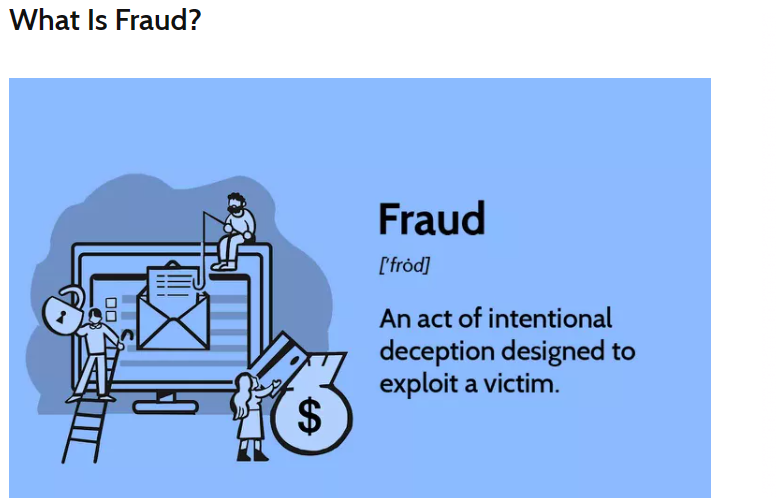

**Types of Fraud in banking sector**

Fraud can manifest in various forms, each targeting different aspects of personal, financial, or organizational well being. Here are some common types of fraud:


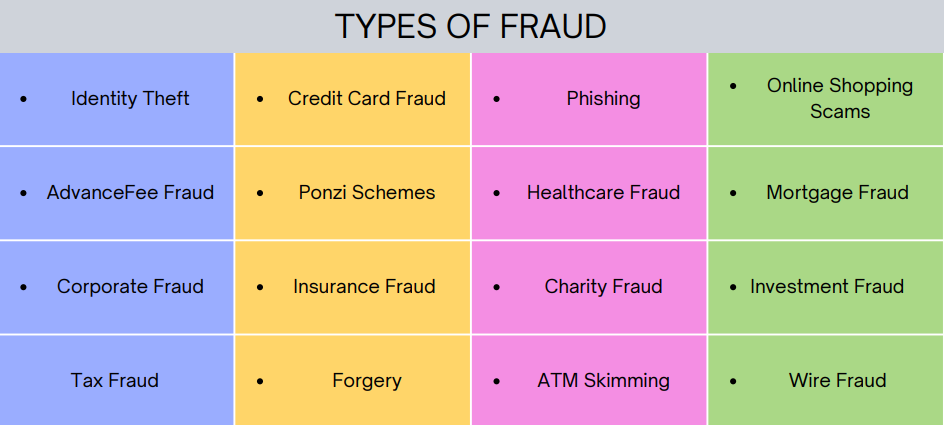

**Industries with the most Fraud**

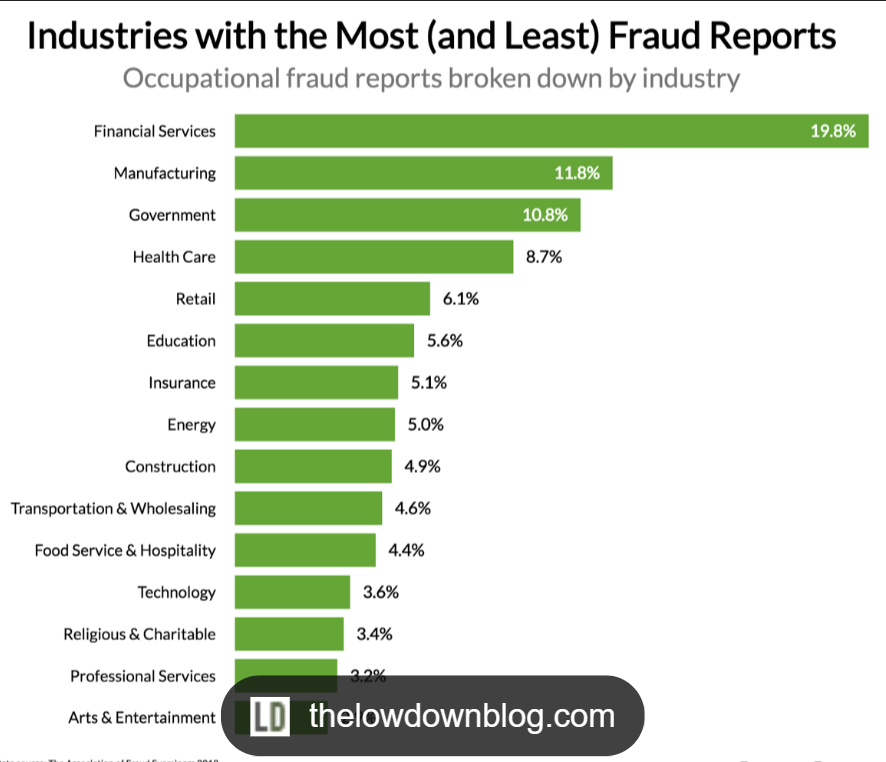

**What is Credit Card Fraud?**


Credit card fraud is an illegal act an individual commits to defrauding someone who is the actual credit card holder.
For example, the purpose might be to buy goods and services or make payments to a third-party account not authorized by the cardholder.


**Attack channel and Mode of fraud** 

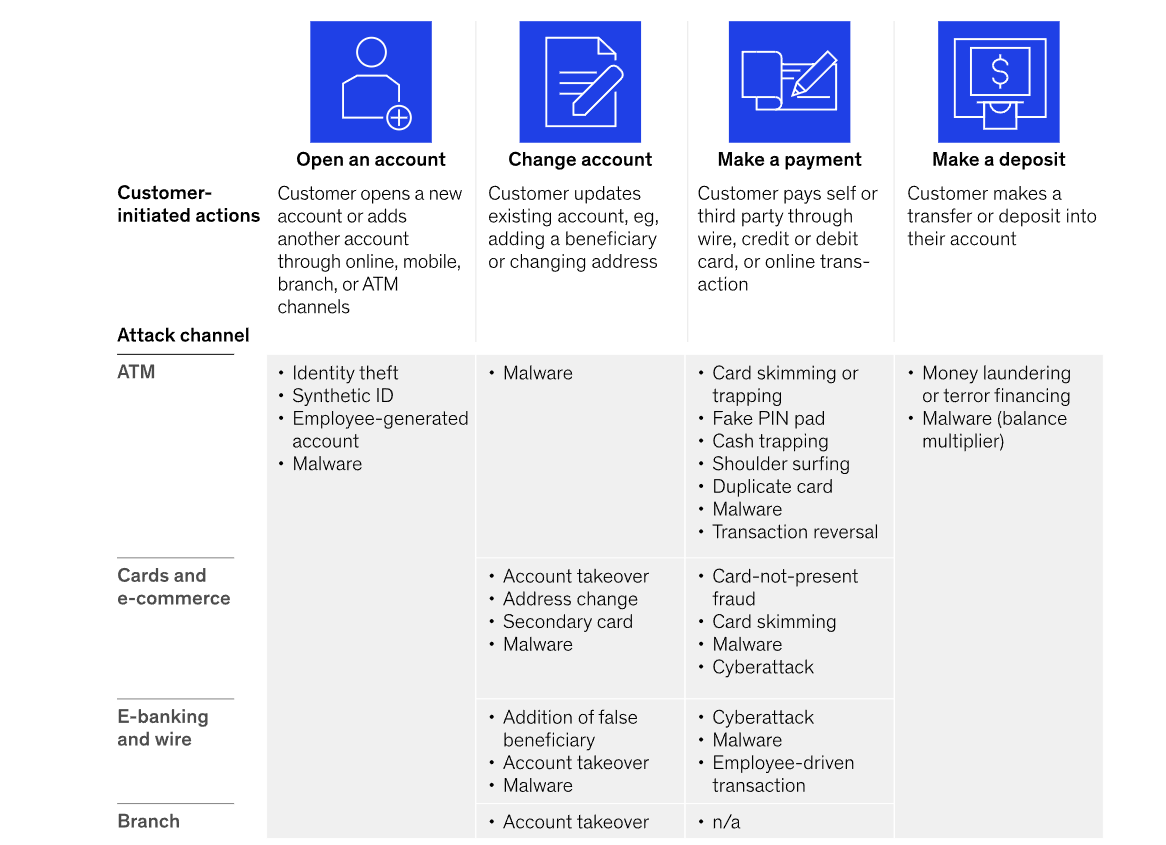

**Number of frauds according to age in 2016 in India**

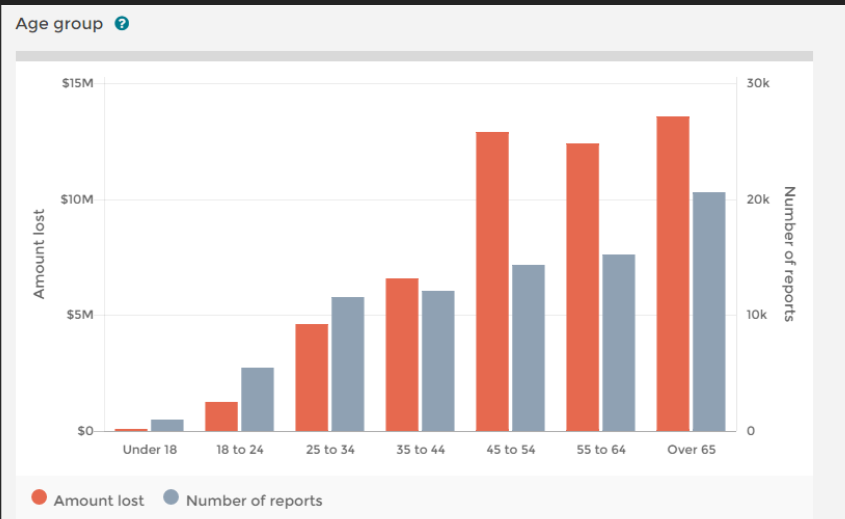

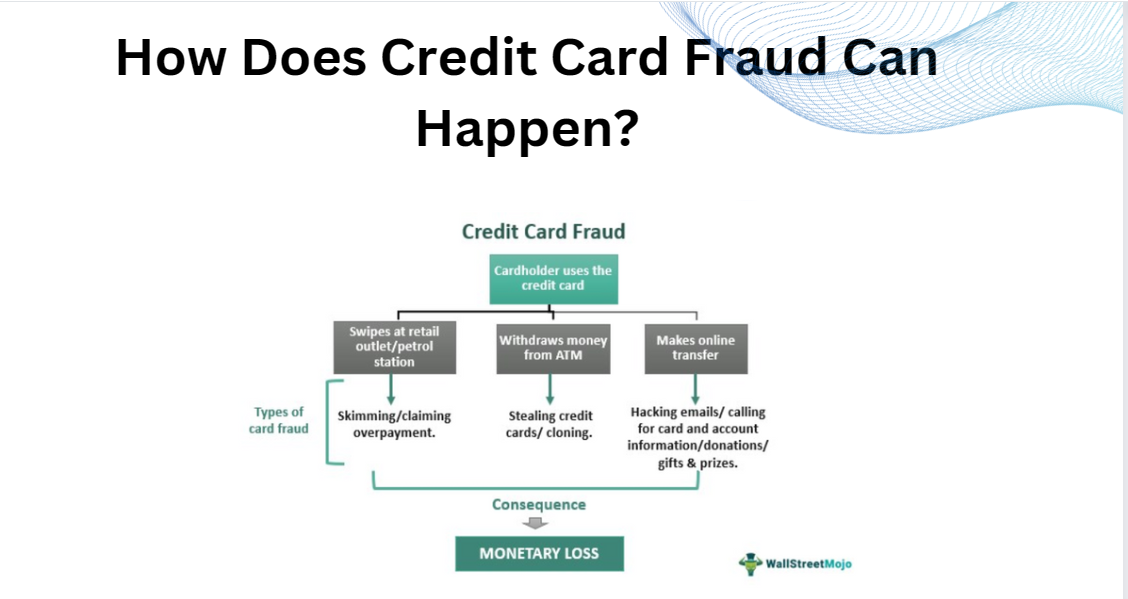

**Work explanation**

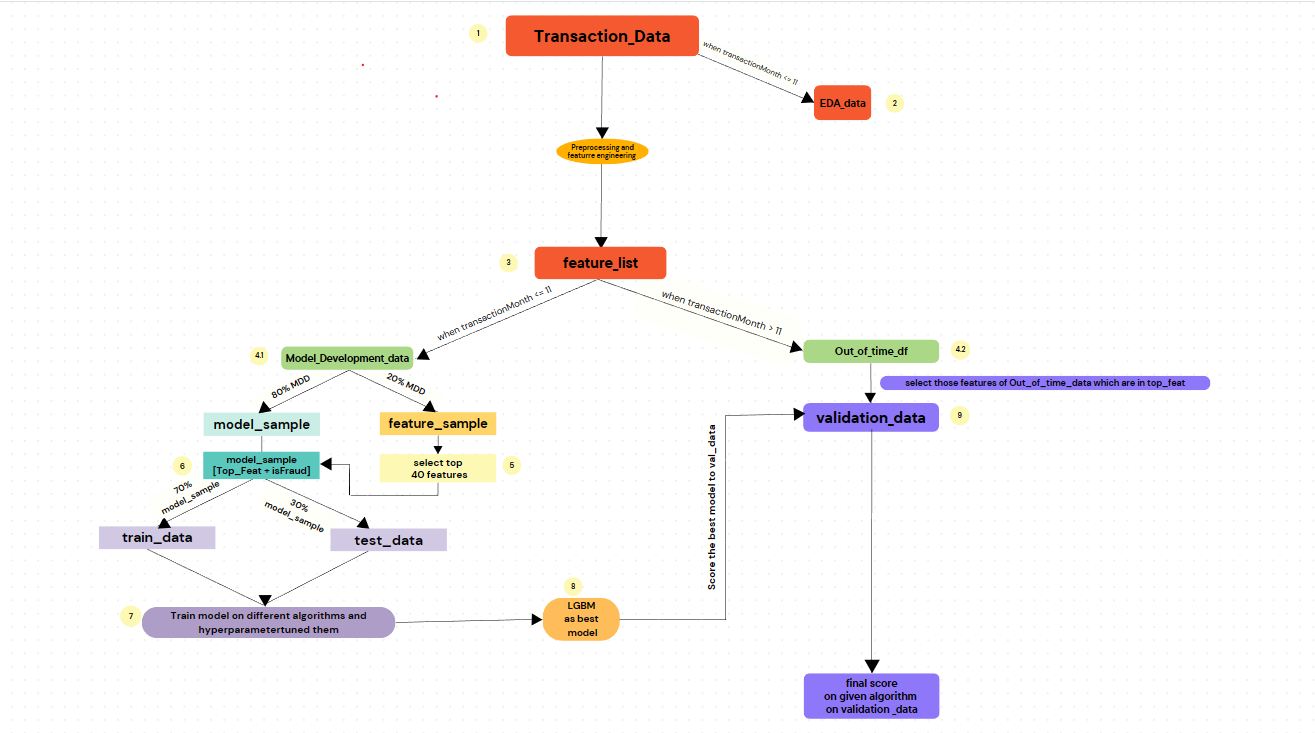

The dataset contain 781207 tranactions with 29 columns

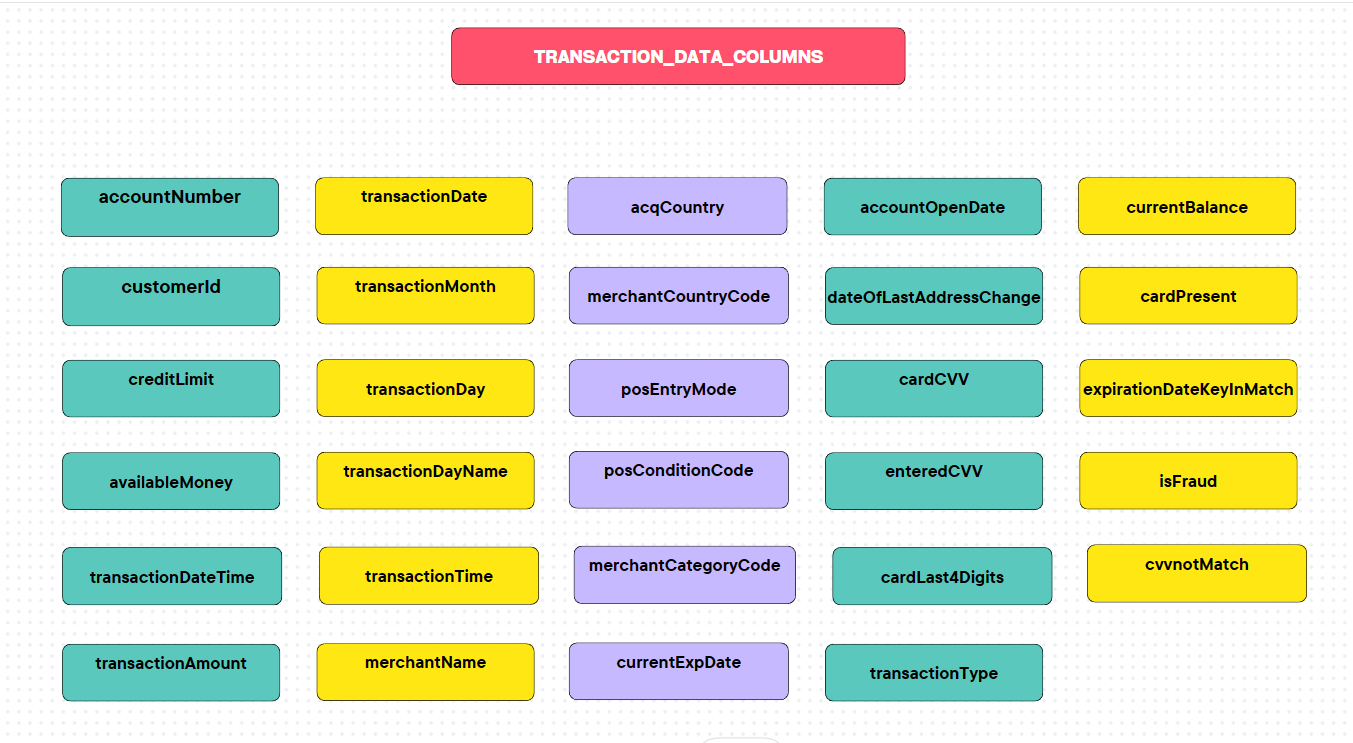

In [1]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
import lightgbm as lgb
import sklearn
import catboost

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report, roc_curve
from sklearn.model_selection import cross_val_score
from lightgbm import LGBMClassifier 
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from datetime import datetime, timedelta
from sklearn.model_selection import GridSearchCV



In [3]:
pd.set_option('display.max_columns',200)
pd.set_option('display.max_rows',7000)

In [137]:
transaction_data = pd.read_csv('transaction_data_updated.csv')

In [138]:
transaction_data.head(10)

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionDate,transactionMonth,transactionDayName,transactionDay,transactionTime,...,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,cvvNotMatch
0,737265056,737265056,5000,5000.00,2016-08-13T14:27:32,13-08-2016,8,Saturday,13,14:27,...,14-03-2015,414,414,1803,PURCHASE,0.00,False,False,False,0
1,737265056,737265056,5000,5000.00,2016-10-11T05:05:54,11-10-2016,10,Tuesday,11,05:05,...,14-03-2015,486,486,767,PURCHASE,0.00,True,False,False,0
2,737265056,737265056,5000,5000.00,2016-11-08T09:18:39,08-11-2016,11,Tuesday,8,09:18,...,14-03-2015,486,486,767,PURCHASE,0.00,False,False,False,0
3,737265056,737265056,5000,5000.00,2016-12-10T02:14:50,10-12-2016,12,Saturday,10,02:14,...,14-03-2015,486,486,767,PURCHASE,0.00,False,False,False,0
4,830329091,830329091,5000,5000.00,2016-03-24T21:04:46,24-03-2016,3,Thursday,24,21:04,...,06-08-2015,885,885,3143,PURCHASE,0.00,True,False,False,0
5,830329091,830329091,5000,5000.00,2016-04-19T16:24:27,19-04-2016,4,Tuesday,19,16:24,...,06-08-2015,885,885,3143,PURCHASE,0.00,True,False,False,0
6,830329091,830329091,5000,5000.00,2016-05-21T14:50:35,21-05-2016,5,Saturday,21,14:50,...,06-08-2015,885,885,3143,PURCHASE,0.00,True,False,False,0
7,830329091,830329091,5000,5000.00,2016-06-03T00:31:21,03-06-2016,6,Friday,3,00:31,...,06-08-2015,885,885,3143,PURCHASE,0.00,True,False,False,0
8,830329091,830329091,5000,4990.63,2016-06-10T01:21:46,10-06-2016,6,Friday,10,01:21,...,06-08-2015,885,885,3143,PURCHASE,9.37,True,False,False,0
9,830329091,830329091,5000,5000.00,2016-07-11T10:47:16,11-07-2016,7,Monday,11,10:47,...,06-08-2015,885,885,3143,PURCHASE,0.00,True,False,False,0


# Step 2 -

**Data Preparation :Exploratory Data Analysis,Preprocessing and Feature Engineering**

**EDA**

In [139]:
# Convert 'transactionDateTime' column to datetime format  #use in last

transaction_data['transactionDateTime'] = pd.to_datetime(transaction_data['transactionDateTime'])

# Determine the splitting point or date
split_date = pd.to_datetime('2016-12-01')

# Use boolean indexing to filter the transaction_data
EDA_data = transaction_data[transaction_data['transactionDateTime'] < split_date]

#saving these transaction_data in csv format
EDA_data.to_csv('EDA_data.csv',index = False)
 
EDA_data = pd.read_csv('EDA_data.csv')


In [140]:
EDA_data = pd.read_csv('EDA_data.csv')

In [141]:
#categorize columns as num_cols,cat_cols,bool_cols,date_cols -

num_cols  = ['creditLimit','availableMoney','transactionAmount','currentBalance','transactioonMonth','transactionDay']
cat_cols  = ['accountNumber','customerId','merchantName','acqCountry','merchantCountryCode','posEntryMode','posConditionCode',
            'merchantCategoryCode','cardCVV','enteredCVV','cardLast4Digits','transactionType','transactionDayName']
bool_cols = ['cardPresent','expirationDateKeyInMatch','isFraud','cvvNotMatch']
date_cols = ['transactionDateTime','currentExpDate','accountOpenDate','dateOfLastAddressChange','transactionTime','transactionDate']

In [142]:
# changing datetime columns in datetime format

EDA_data['transactionDateTime'] = pd.to_datetime(EDA_data['transactionDateTime'])
EDA_data['transactionDate'] = pd.to_datetime(EDA_data['transactionDate'])
EDA_data['currentExpDate'] = pd.to_datetime(EDA_data['currentExpDate'])
EDA_data['accountOpenDate'] = pd.to_datetime(EDA_data['accountOpenDate'])
EDA_data['dateOfLastAddressChange'] = pd.to_datetime(EDA_data['dateOfLastAddressChange'])

C:\Users\VICTUS\AppData\Local\Temp\ipykernel_11068\3124232580.py:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  EDA_data['transactionDate'] = pd.to_datetime(EDA_data['transactionDate'])
C:\Users\VICTUS\AppData\Local\Temp\ipykernel_11068\3124232580.py:6: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  EDA_data['accountOpenDate'] = pd.to_datetime(EDA_data['accountOpenDate'])
C:\Users\VICTUS\AppData\Local\Temp\ipykernel_11068\3124232580.py:7: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  EDA_data['dateOfLastAddressChange'] = pd.to_datetime(EDA_data['dateOfLas

In [143]:
#changing bool_cols as integers-

EDA_data[bool_cols] = EDA_data[bool_cols].astype('int')

In [144]:
EDA_data.head(10)

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionDate,transactionMonth,transactionDayName,transactionDay,transactionTime,...,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,cvvNotMatch
0,737265056,737265056,5000,5000.00,2016-08-13 14:27:32,2016-08-13,8,Saturday,13,14:27,...,2015-03-14,414,414,1803,PURCHASE,0.00,0,0,0,0
1,737265056,737265056,5000,5000.00,2016-10-11 05:05:54,2016-11-10,10,Tuesday,11,05:05,...,2015-03-14,486,486,767,PURCHASE,0.00,1,0,0,0
2,737265056,737265056,5000,5000.00,2016-11-08 09:18:39,2016-08-11,11,Tuesday,8,09:18,...,2015-03-14,486,486,767,PURCHASE,0.00,0,0,0,0
3,830329091,830329091,5000,5000.00,2016-03-24 21:04:46,2016-03-24,3,Thursday,24,21:04,...,2015-06-08,885,885,3143,PURCHASE,0.00,1,0,0,0
4,830329091,830329091,5000,5000.00,2016-04-19 16:24:27,2016-04-19,4,Tuesday,19,16:24,...,2015-06-08,885,885,3143,PURCHASE,0.00,1,0,0,0
5,830329091,830329091,5000,5000.00,2016-05-21 14:50:35,2016-05-21,5,Saturday,21,14:50,...,2015-06-08,885,885,3143,PURCHASE,0.00,1,0,0,0
6,830329091,830329091,5000,5000.00,2016-06-03 00:31:21,2016-03-06,6,Friday,3,00:31,...,2015-06-08,885,885,3143,PURCHASE,0.00,1,0,0,0
7,830329091,830329091,5000,4990.63,2016-06-10 01:21:46,2016-10-06,6,Friday,10,01:21,...,2015-06-08,885,885,3143,PURCHASE,9.37,1,0,0,0
8,830329091,830329091,5000,5000.00,2016-07-11 10:47:16,2016-11-07,7,Monday,11,10:47,...,2015-06-08,885,885,3143,PURCHASE,0.00,1,0,0,0
9,830329091,830329091,5000,5000.00,2016-09-07 20:22:47,2016-07-09,9,Wednesday,7,20:22,...,2015-06-08,885,885,3143,PURCHASE,0.00,1,0,0,0


**1.plot shows merchantName where fraud occurs more than 200 times in a year**

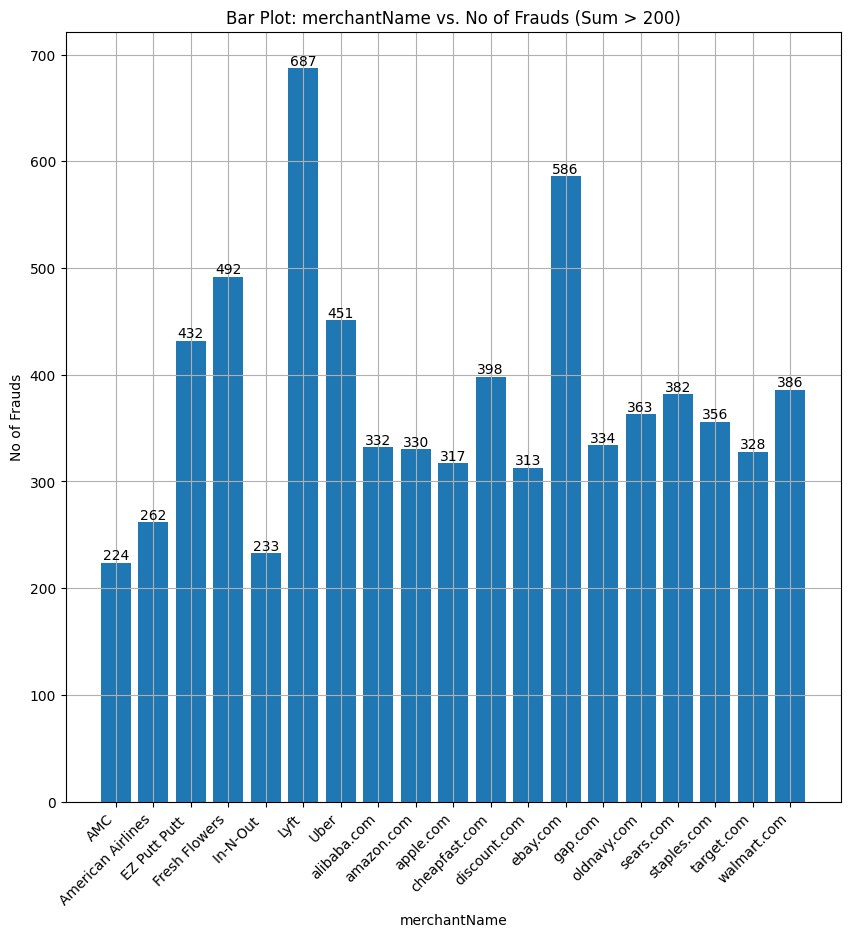

In [145]:
# Calculate the sum of 'isFraud' for each 'merchantName'
sum_of_isFraud = EDA_data.groupby('merchantName')['isFraud'].sum().reset_index()

# Filter merchantName with sum_of_isFraud greater than 200
sum_of_isFraud_filtered = sum_of_isFraud[sum_of_isFraud['isFraud'] > 200]

if not sum_of_isFraud_filtered.empty:
    # Create a larger figure for the plot
    plt.figure(figsize=(10, 10))
    
    # Create a bar plot
    plt.bar(sum_of_isFraud_filtered['merchantName'], sum_of_isFraud_filtered['isFraud'])
    plt.xlabel('merchantName')
    plt.ylabel('No of Frauds')
    plt.title('Bar Plot: merchantName vs. No of Frauds (Sum > 200)')
    plt.xticks(rotation=45, ha='right')
    plt.grid(True)
    
    # Add data labels above the bars
    for x, y in zip(sum_of_isFraud_filtered['merchantName'], sum_of_isFraud_filtered['isFraud']):
        plt.text(x, y, str(y), ha='center', va='bottom')
    
    plt.show()
else:
    print("No merchantName with No of Frauds > 200 found.")


**2.plot shows how many frauds occur according to month**

In [148]:
sum_of_isFraud_tM = EDA_data.groupby('transactionMonth')['isFraud'].sum().reset_index()
df = sum_of_isFraud_tM

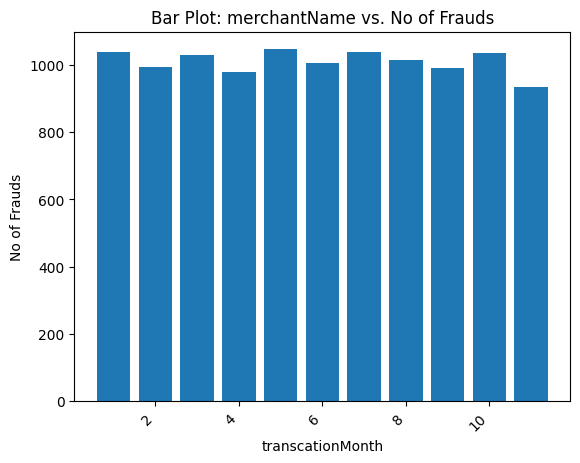

In [149]:
plt.bar(df['transactionMonth'], df['isFraud'])
plt.xlabel('transcationMonth')
plt.ylabel('No of Frauds')
plt.title('Bar Plot: merchantName vs. No of Frauds')
plt.xticks(rotation=45, ha='right')
plt.show()

**3.plot shows customers who faces fraud more than 100 times in a year**

In [180]:
sum_of_isFraud = EDA_data.groupby('customerId')['isFraud'].sum().reset_index()
df = sum_of_isFraud
df = df[df['isFraud'] >= 100]

In [182]:
df['customerId'] = df['customerId'].apply(lambda x: str(x))
df

C:\Users\VICTUS\AppData\Local\Temp\ipykernel_11068\2304781541.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['customerId'] = df['customerId'].apply(lambda x: str(x))


,customerId,isFraud
182,132629755,108
623,208319653,189
829,246251253,253
964,269616174,106
1491,369308035,119
1556,380680241,697
1778,419709514,188
2083,472288969,237
3354,700725639,246
3809,782081187,271


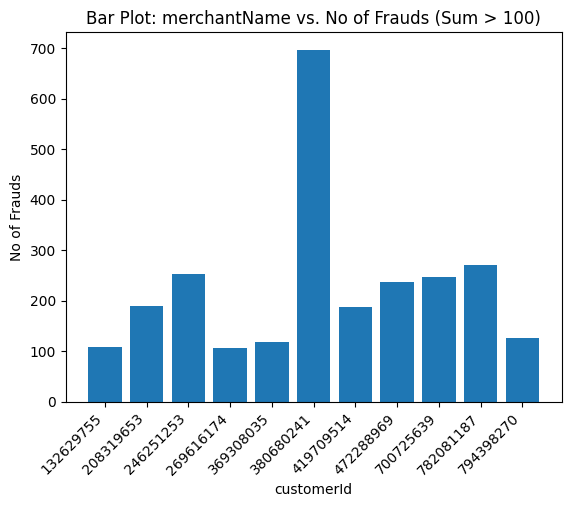

In [183]:
plt.bar(df['customerId'], df['isFraud'])
plt.xlabel('customerId')
plt.ylabel('No of Frauds')
plt.title('Bar Plot: merchantName vs. No of Frauds (Sum > 100)')
plt.xticks(rotation=45, ha='right')
plt.show()

**4.plot of transactionDayName v/s number of Fraud**

<BarContainer object of 7 artists>

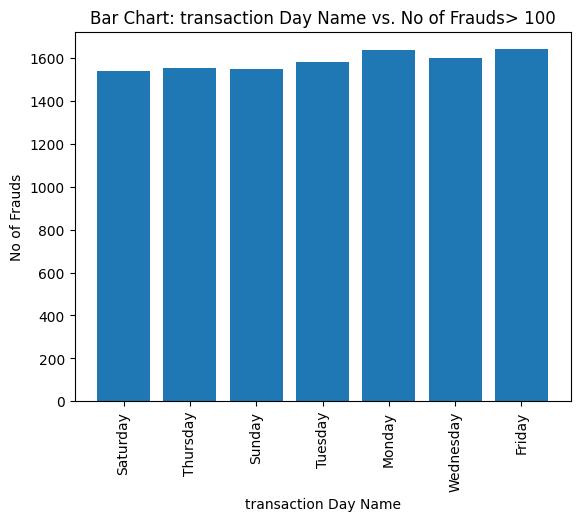

In [158]:
plt.figurefigsize = (5,15)

x_list = list(set(EDA_data['transactionDayName']))
y_list = []
for m in x_list:
    df = EDA_data[EDA_data['transactionDayName'] == m]
    y_list.append(sum(df['isFraud']))
    plt.xlabel('transaction Day Name')
    plt.ylabel('No of Frauds')
    plt.title('Bar Chart: transaction Day Name vs. No of Frauds> 100')
    
plt.xticks(rotation=90, ha='center')    
plt.bar(x_list, y_list)

**5.plot of transactionDay v/s number of Fraud**

<BarContainer object of 31 artists>

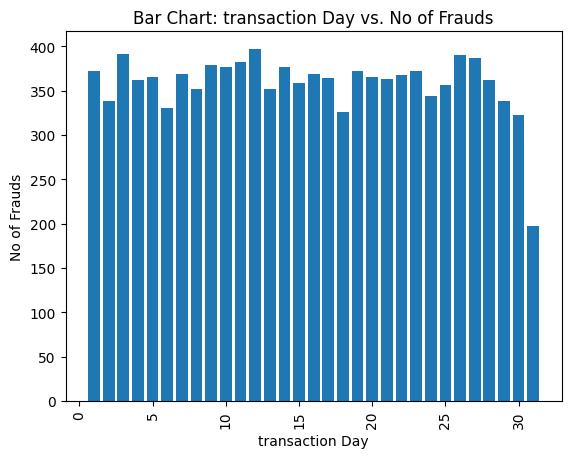

In [159]:
plt.figurefigsize = (5,15)

x_list = list(set(EDA_data['transactionDay']))
y_list = []
for m in x_list:
    df = EDA_data[EDA_data['transactionDay'] == m]
    y_list.append(sum(df['isFraud']))
    plt.xlabel('transaction Day')
    plt.ylabel('No of Frauds')
    plt.title('Bar Chart: transaction Day vs. No of Frauds')
plt.xticks(rotation=90, ha='center')    
plt.bar(x_list, y_list)

**6.plot of merchantCategoryCode v/s number of Fraud**

<BarContainer object of 19 artists>

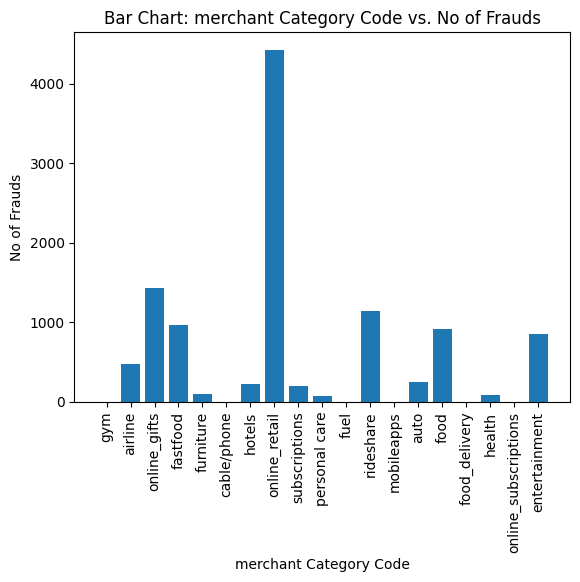

In [160]:

plt.figurefigsize = (5,15)

x_list = list(set(EDA_data['merchantCategoryCode']))
y_list = []
for m in x_list:
    df = EDA_data[EDA_data['merchantCategoryCode'] == m]
    y_list.append(sum(df['isFraud']))
    plt.xlabel('merchant Category Code')
    plt.ylabel('No of Frauds')
    plt.title('Bar Chart: merchant Category Code vs. No of Frauds')
    
plt.xticks(rotation=90, ha='center')    
plt.bar(x_list, y_list)

**7.plot shows no of fraud in merchant under online_retail**

<BarContainer object of 12 artists>

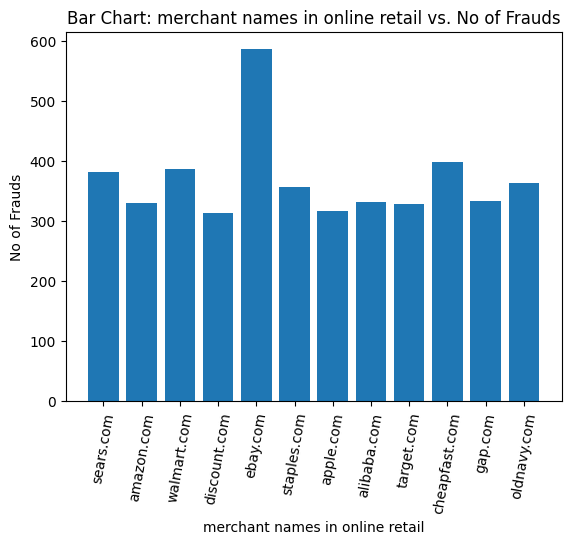

In [161]:
plt.figurefigsize = (5,15)
df1 = EDA_data[EDA_data['merchantCategoryCode'] == 'online_retail']

x_list = list(set(df1['merchantName']))
y_list = []
for m in x_list:
    df = EDA_data[EDA_data['merchantName'] == m]
    y_list.append(sum(df['isFraud']))
    plt.xlabel('merchant names in online retail')
    plt.ylabel('No of Frauds')
    plt.title('Bar Chart: merchant names in online retail vs. No of Frauds')
    
plt.xticks(rotation = 80, ha = 'center')   
plt.bar(x_list, y_list)

**PRE-PROCESSING**

1.Convert transactionDateTime from object to date and time format,<br>
2.Convert categorical variables to numeric using Label encoding,target encoding or creating dummies,<br>
3.Normalize or Scale numeric features,<br>
4.Drop and rename columns

In [162]:
#Transaction_Data = pd.read_csv('transaction_data_updated.csv')
#Transaction_Data = data
data = pd.read_csv('transaction_data_updated.csv')

In [163]:
data.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionDate,transactionMonth,transactionDayName,transactionDay,transactionTime,...,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,cvvNotMatch
0,737265056,737265056,5000,5000.0,2016-08-13T14:27:32,13-08-2016,8,Saturday,13,14:27,...,14-03-2015,414,414,1803,PURCHASE,0.0,False,False,False,0
1,737265056,737265056,5000,5000.0,2016-10-11T05:05:54,11-10-2016,10,Tuesday,11,05:05,...,14-03-2015,486,486,767,PURCHASE,0.0,True,False,False,0
2,737265056,737265056,5000,5000.0,2016-11-08T09:18:39,08-11-2016,11,Tuesday,8,09:18,...,14-03-2015,486,486,767,PURCHASE,0.0,False,False,False,0
3,737265056,737265056,5000,5000.0,2016-12-10T02:14:50,10-12-2016,12,Saturday,10,02:14,...,14-03-2015,486,486,767,PURCHASE,0.0,False,False,False,0
4,830329091,830329091,5000,5000.0,2016-03-24T21:04:46,24-03-2016,3,Thursday,24,21:04,...,06-08-2015,885,885,3143,PURCHASE,0.0,True,False,False,0


In [164]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 781207 entries, 0 to 781206
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountNumber             781207 non-null  int64  
 1   customerId                781207 non-null  int64  
 2   creditLimit               781207 non-null  int64  
 3   availableMoney            781207 non-null  float64
 4   transactionDateTime       781207 non-null  object 
 5   transactionDate           781207 non-null  object 
 6   transactionMonth          781207 non-null  int64  
 7   transactionDayName        781207 non-null  object 
 8   transactionDay            781207 non-null  int64  
 9   transactionTime           781207 non-null  object 
 10  transactionAmount         781207 non-null  float64
 11  merchantName              781207 non-null  object 
 12  acqCountry                781207 non-null  object 
 13  merchantCountryCode       781207 non-null  o

In [165]:
#categorize columns as num_cols,cat_cols,bool_cols,date_cols -

num_cols  = ['creditLimit','availableMoney','transactionAmount','currentBalance','transactioonMonth','transactionDay']
cat_cols  = ['accountNumber','customerId','merchantName','acqCountry','merchantCountryCode','posEntryMode','posConditionCode',
            'merchantCategoryCode','cardCVV','enteredCVV','cardLast4Digits','transactionType','transactionDayName']
bool_cols = ['cardPresent','expirationDateKeyInMatch','isFraud','cvvNotMatch']
date_cols = ['transactionDateTime','currentExpDate','accountOpenDate','dateOfLastAddressChange','transactionTime','transactionDate']

In [166]:
#changing datetime columns in datetime -

data['transactionDateTime'] = pd.to_datetime(data['transactionDateTime'])
data['transactionDate'] = pd.to_datetime(data['transactionDate'])
data['currentExpDate'] = pd.to_datetime(data['currentExpDate'])
data['accountOpenDate'] = pd.to_datetime(data['accountOpenDate'])
data['dateOfLastAddressChange'] = pd.to_datetime(data['dateOfLastAddressChange'])

C:\Users\VICTUS\AppData\Local\Temp\ipykernel_11068\1050004300.py:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['transactionDate'] = pd.to_datetime(data['transactionDate'])
C:\Users\VICTUS\AppData\Local\Temp\ipykernel_11068\1050004300.py:6: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['accountOpenDate'] = pd.to_datetime(data['accountOpenDate'])
C:\Users\VICTUS\AppData\Local\Temp\ipykernel_11068\1050004300.py:7: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['dateOfLastAddressChange'] = pd.to_datetime(data['dateOfLastAddressChange'])


In [167]:
#changing boolean columns in integers-

data[bool_cols] = data[bool_cols].astype('int')

In [168]:
data.isFraud.sum()

12113

In [169]:
cust_summary = data.groupby('customerId').agg(TotalCount = ('transactionDateTime','nunique'),
                                              FraudCount = ('isFraud','sum')).reset_index()
cust_summary = cust_summary.sort_values(by='FraudCount', ascending=False)

cust_summary.head(10)

,customerId,TotalCount,FraudCount
1556,380680241,32629,758
3815,782081187,2423,304
829,246251253,10101,276
3358,700725639,3295,272
2083,472288969,1775,262
623,208319653,5195,209
1778,419709514,5886,202
3886,794398270,1800,133
1491,369308035,7194,132
182,132629755,3444,116


**Feature Engineering**

1.Create features using development sample <br>
2.Craete binary flag variable from the insights derived in EDA<br>
3.Create 142 features from Model_Development_Data and  saved in form of feature_list.csv 


### Code for historical features -

In [184]:
# Assuming 'data_pos' is the data_posFrame containing the data 
data_pos = data[['customerId', 'transactionDateTime','transactionAmount','merchantName','posEntryMode','isFraud']]

data_pos['count_pos_1h'] = 0
data_pos['count_pos_6h'] = 0
data_pos['count_pos_1d'] = 0
data_pos['count_pos_7d'] = 0 

data_pos['sum_amt_pos_1h'] = 0
data_pos['sum_amt_pos_6h'] = 0
data_pos['sum_amt_pos_1d'] = 0
data_pos['sum_amt_pos_7d'] = 0

data_pos['prop_pos_vol_1h'] = 0
data_pos['prop_pos_vol_6h'] = 0
data_pos['prop_pos_vol_1d'] = 0
data_pos['prop_pos_vol_7d'] = 0

data_pos['prop_pos_amt_1h'] = 0
data_pos['prop_pos_amt_6h'] = 0
data_pos['prop_pos_amt_1d'] = 0
data_pos['prop_pos_amt_7d'] = 0

#data_pos has many column but we use only those column which are useful in making features


# Group the data_posFrame by 'customerId' and 'posEntryMode'
grouped = data_pos.groupby(['customerId', 'posEntryMode'])

# Iterate over each group
for group_name, group_data_pos in grouped:
    
    # Sort the data_pos by 'transactionDateTime' within each group
    group_data_pos = group_data_pos.sort_values('transactionDateTime')
    
    
   # Iterate over each row within the group
    for i, row in group_data_pos.iterrows():
        # Filter transactions for the same customer, same posEntryMode, and within the last 1 hr, 6 hr , 1 day , 7day respectively
        filtered_pos_1h = group_data_pos[
            (group_data_pos['customerId'] == row['customerId']) &
            (group_data_pos['posEntryMode'] == row['posEntryMode']) &
            (group_data_pos['transactionDateTime'] >= row['transactionDateTime'] - timedelta(hours = 1)) &
            (group_data_pos['transactionDateTime'] < row['transactionDateTime'])
        ]
        
        filtered_pos_6h = group_data_pos[
            (group_data_pos['customerId'] == row['customerId']) &
            (group_data_pos['posEntryMode'] == row['posEntryMode']) &
            (group_data_pos['transactionDateTime'] >= row['transactionDateTime'] - timedelta(hours = 6)) &
            (group_data_pos['transactionDateTime'] < row['transactionDateTime'])
        ]
        
        filtered_pos_1d = group_data_pos[
            (group_data_pos['customerId'] == row['customerId']) &
            (group_data_pos['posEntryMode'] == row['posEntryMode']) &
            (group_data_pos['transactionDateTime'] >= row['transactionDateTime'] - timedelta(days=1)) &
            (group_data_pos['transactionDateTime'] < row['transactionDateTime'])
        ]
        
        filtered_pos_7d = group_data_pos[
            (group_data_pos['customerId'] == row['customerId']) &
            (group_data_pos['posEntryMode'] == row['posEntryMode']) &
            (group_data_pos['transactionDateTime'] >= row['transactionDateTime'] - timedelta(days=7)) &
            (group_data_pos['transactionDateTime'] < row['transactionDateTime'])
        ]

        

        filtered_2_1h = group_data_pos[
            (group_data_pos['customerId'] == row['customerId']) &
            (group_data_pos['transactionDateTime'] >= row['transactionDateTime'] - timedelta(hours = 1)) &
            (group_data_pos['transactionDateTime'] < row['transactionDateTime'])
        ]
        
        filtered_2_6h = group_data_pos[
            (group_data_pos['customerId'] == row['customerId']) &
            (group_data_pos['transactionDateTime'] >= row['transactionDateTime'] - timedelta(hours = 6)) &
            (group_data_pos['transactionDateTime'] < row['transactionDateTime'])
        ]
        
        filtered_2_1d = group_data_pos[
            (group_data_pos['customerId'] == row['customerId']) &
            (group_data_pos['transactionDateTime'] >= row['transactionDateTime'] - timedelta(days = 1)) &
            (group_data_pos['transactionDateTime'] < row['transactionDateTime'])
        ]
        
        filtered_2_7d = group_data_pos[
            (group_data_pos['customerId'] == row['customerId']) &
            (group_data_pos['transactionDateTime'] >= row['transactionDateTime'] - timedelta(days = 7)) &
            (group_data_pos['transactionDateTime'] < row['transactionDateTime'])
        ]

        # Calculate the count of transactions in the same posEntryMode within the last 1 hr, 6 hr , 1 day , 7day respectively
        count_pos_1h = filtered_pos_1h.shape[0]
        count_pos_6h = filtered_pos_6h.shape[0]
        count_pos_1d = filtered_pos_1d.shape[0]
        count_pos_7d = filtered_pos_7d.shape[0]
        
        count_total_1h = filtered_2_1h.shape[0]
        count_total_6h = filtered_2_6h.shape[0]
        count_total_1d = filtered_2_1d.shape[0]
        count_total_7d = filtered_2_7d.shape[0]
        
        sum_amt_pos_1h = sum(filtered_pos_1h['transactionAmount'])
        sum_amt_pos_6h = sum(filtered_pos_6h['transactionAmount'])
        sum_amt_pos_1d = sum(filtered_pos_1d['transactionAmount'])
        sum_amt_pos_7d = sum(filtered_pos_7d['transactionAmount'])
        
        sum_amt_total_1h = sum(filtered_2_1h['transactionAmount'])
        sum_amt_total_6h = sum(filtered_2_6h['transactionAmount'])
        sum_amt_total_1d = sum(filtered_2_1d['transactionAmount'])
        sum_amt_total_7d = sum(filtered_2_7d['transactionAmount'])

        try:
            prop_amt_pos_1h = round(sum_amt_pos_1h / sum_amt_total_1h * 100, 2)
        except:
            prop_amt_pos_1h = 999
            
        try:
            prop_amt_pos_6h = round(sum_amt_pos_6h/ sum_amt_total_6h * 100, 2)
        except:
            prop_amt_pos_6h = 999
            
        try:
            prop_amt_pos_1d = round(sum_amt_pos_1d / sum_amt_total_1d * 100, 2)
        except:
            prop_amt_pos_1d = 999
            
        try:
            prop_amt_pos_7d = round(sum_amt_pos_7d / sum_amt_total_7d * 100, 2)
        except:
            prop_amt_pos_7d = 999
            
            

        try:
            prop_vol_pos_1h = round(count_pos_1h / count_total_1h * 100, 2)
        except:
            prop_vol_pos_1h = 999
            
        try:
            prop_vol_pos_6h = round(count_pos_6h/ count_total_6h * 100, 2)
        except:
            prop_vol_pos_6h = 999

        try:
            prop_vol_pos_1d = round(count_pos_1d / count_total_1d * 100, 2)
        except:
            prop_vol_pos_1d = 999

        try:
            prop_vol_pos_7d = round(count_pos_7d / count_total_7d * 100, 2)
        except:
            prop_vol_pos_7d = 999


        # Update the corresponding columns for the current transaction
        
        data_pos.at[i, 'count_pos_1h'] = count_pos_1h
        data_pos.at[i, 'count_pos_6h'] = count_pos_6h
        data_pos.at[i, 'count_pos_1d'] = count_pos_1d
        data_pos.at[i, 'count_pos_7d'] = count_pos_7d
        
        data_pos.at[i, 'sum_amt_pos_1h'] = sum_amt_pos_1h
        data_pos.at[i, 'sum_amt_pos_6h'] = sum_amt_pos_6h
        data_pos.at[i, 'sum_amt_pos_1d'] = sum_amt_pos_1d
        data_pos.at[i, 'sum_amt_pos_7d'] = sum_amt_pos_7d
        
        
        data_pos.at[i, 'prop_pos_vol_1h'] = prop_vol_pos_1h
        data_pos.at[i, 'prop_pos_vol_6h'] = prop_vol_pos_6h
        data_pos.at[i, 'prop_pos_vol_1d'] = prop_vol_pos_1d
        data_pos.at[i, 'prop_pos_vol_7d'] = prop_vol_pos_7d
        
        data_pos.at[i, 'prop_pos_amt_1h'] = prop_amt_pos_1h
        data_pos.at[i, 'prop_pos_amt_6h'] = prop_amt_pos_6h
        data_pos.at[i, 'prop_pos_amt_1d'] = prop_amt_pos_1d
        data_pos.at[i, 'prop_pos_amt_7d'] = prop_amt_pos_7d
        
        
# Calculate the time difference columns

data_pos = data_pos.sort_values(['transactionDateTime'])

# Calculate the time difference for each customerId within each posEntryMode
data_pos['Time Difference_pos'] = data_pos.groupby(['customerId', 'posEntryMode'])['transactionDateTime'].diff()

# Find the first transaction of each merchantName within each customerId
first_transaction_mask = data_pos.groupby(['customerId', 'posEntryMode'])['transactionDateTime'].transform('first')
first_transaction_diff = first_transaction_mask - datetime(2015, 12, 31, 23, 59, 59)

# Replace the time difference with the difference from December 31, 2016, 23:59:59 for the first transaction
data_pos.loc[first_transaction_mask == data_pos['transactionDateTime'], 'Time Difference_pos'] = first_transaction_diff

# Convert the day difference to hours and minutes
data_pos['Hours_pos'] = data_pos['Time Difference_pos'].dt.days * 24 + data_pos['Time Difference_pos'].dt.seconds // 3600
data_pos['Minutes_pos'] = data_pos['Time Difference_pos'].dt.days * 24*60 + data_pos['Time Difference_pos'].dt.seconds // 60

# Display the resulting data_posFrame
print(data_pos)


C:\Users\VICTUS\AppData\Local\Temp\ipykernel_11068\2457815353.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pos['count_pos_1h'] = 0
C:\Users\VICTUS\AppData\Local\Temp\ipykernel_11068\2457815353.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pos['count_pos_6h'] = 0
C:\Users\VICTUS\AppData\Local\Temp\ipykernel_11068\2457815353.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

        customerId transactionDateTime  transactionAmount     merchantName  \
636597   419104777 2016-01-01 00:01:02              44.09  Washington Post   
28731    674577133 2016-01-01 00:01:44             329.57      staples.com   
220725   958438658 2016-01-01 00:01:47             164.57    cheapfast.com   
467202   851126461 2016-01-01 00:02:04             122.83     discount.com   
699518   148963316 2016-01-01 00:02:19               0.00      Fast Repair   
...            ...                 ...                ...              ...   
469249   690351684 2016-12-30 23:57:33             128.84    EZ Putt Putt    
764807   365766122 2016-12-30 23:58:25              49.47      alibaba.com   
620146   543902721 2016-12-30 23:59:33              13.02          abc.com   
278621   912493707 2016-12-30 23:59:35               8.85       Play Store   
614343   152973583 2016-12-30 23:59:45             169.07     Burger King    

        posEntryMode  isFraud  count_pos_1h  count_pos_6h  coun

In [185]:
data_pos.head()

,customerId,transactionDateTime,transactionAmount,merchantName,posEntryMode,isFraud,count_pos_1h,count_pos_6h,count_pos_1d,count_pos_7d,...,prop_pos_vol_6h,prop_pos_vol_1d,prop_pos_vol_7d,prop_pos_amt_1h,prop_pos_amt_6h,prop_pos_amt_1d,prop_pos_amt_7d,Time Difference_pos,Hours_pos,Minutes_pos
636597,419104777,2016-01-01 00:01:02,44.09,Washington Post,9,0,0,0,0,0,...,999,999,999,999,999,999,999,0 days 00:01:03,0,1
28731,674577133,2016-01-01 00:01:44,329.57,staples.com,9,0,0,0,0,0,...,999,999,999,999,999,999,999,0 days 00:01:45,0,1
220725,958438658,2016-01-01 00:01:47,164.57,cheapfast.com,5,0,0,0,0,0,...,999,999,999,999,999,999,999,0 days 00:01:48,0,1
467202,851126461,2016-01-01 00:02:04,122.83,discount.com,2,0,0,0,0,0,...,999,999,999,999,999,999,999,0 days 00:02:05,0,2
699518,148963316,2016-01-01 00:02:19,0.00,Fast Repair,5,0,0,0,0,0,...,999,999,999,999,999,999,999,0 days 00:02:20,0,2


In [186]:
# here a mistake has been done in writing column name of Time Difference_pos which should be in only form of days not in 
# time window frame and Time Difference_pos should be as Time_Difference_pos ,both mistakes removed in further steps.

In [187]:
# features for merchantCountryCode  --

data_merCntryC = data[['customerId','transactionDateTime','transactionAmount','merchantCountryCode','isFraud']]

data_merCntryC['count_merCntryC_1h'] = 0
data_merCntryC['count_merCntryC_6h'] = 0
data_merCntryC['count_merCntryC_1d'] = 0
data_merCntryC['count_merCntryC_7d'] = 0


data_merCntryC['sum_amt_merCntryC_1h'] = 0
data_merCntryC['sum_amt_merCntryC_6h'] = 0
data_merCntryC['sum_amt_merCntryC_1d'] = 0
data_merCntryC['sum_amt_merCntryC_7d'] = 0

data_merCntryC['prop_merCntryC_vol_1h'] = 0
data_merCntryC['prop_merCntryC_vol_6h'] = 0
data_merCntryC['prop_merCntryC_vol_1d'] = 0
data_merCntryC['prop_merCntryC_vol_7d'] = 0

data_merCntryC['prop_merCntryC_amt_1h'] = 0
data_merCntryC['prop_merCntryC_amt_6h'] = 0
data_merCntryC['prop_merCntryC_amt_1d'] = 0
data_merCntryC['prop_merCntryC_amt_7d'] = 0


# Group the data_merCntryCFrame by 'customerId' and 'merchantCountryCode'
grouped = data_merCntryC.groupby(['customerId', 'merchantCountryCode'])

# Iterate over each group
for group_name, group_data_merCntryC in grouped:
    
    # Sort the data_merCntryC by 'transactionDateTime' within each group
    group_data_merCntryC = group_data_merCntryC.sort_values('transactionDateTime')
    
    
    
    # Iterate over each row within the group
    for i, row in group_data_merCntryC.iterrows():
        # Filter transactions for the same customer, same merchantCountryCode, and within the last 1 hr, 6 hr , 1 day , 7day respectively
        filtered_merCntryC_1h = group_data_merCntryC[
            (group_data_merCntryC['customerId'] == row['customerId']) &
            (group_data_merCntryC['merchantCountryCode'] == row['merchantCountryCode']) &
            (group_data_merCntryC['transactionDateTime'] >= row['transactionDateTime'] - timedelta(hours = 1)) &
            (group_data_merCntryC['transactionDateTime'] < row['transactionDateTime'])
        ]
        
        filtered_merCntryC_6h = group_data_merCntryC[
            (group_data_merCntryC['customerId'] == row['customerId']) &
            (group_data_merCntryC['merchantCountryCode'] == row['merchantCountryCode']) &
            (group_data_merCntryC['transactionDateTime'] >= row['transactionDateTime'] - timedelta(hours = 6)) &
            (group_data_merCntryC['transactionDateTime'] < row['transactionDateTime'])
        ]
        
        filtered_merCntryC_1d = group_data_merCntryC[
            (group_data_merCntryC['customerId'] == row['customerId']) &
            (group_data_merCntryC['merchantCountryCode'] == row['merchantCountryCode']) &
            (group_data_merCntryC['transactionDateTime'] >= row['transactionDateTime'] - timedelta(days=1)) &
            (group_data_merCntryC['transactionDateTime'] < row['transactionDateTime'])
        ]
        
        filtered_merCntryC_7d = group_data_merCntryC[
            (group_data_merCntryC['customerId'] == row['customerId']) &
            (group_data_merCntryC['merchantCountryCode'] == row['merchantCountryCode']) &
            (group_data_merCntryC['transactionDateTime'] >= row['transactionDateTime'] - timedelta(days=7)) &
            (group_data_merCntryC['transactionDateTime'] < row['transactionDateTime'])
        ]

        

        filtered_2_1h = group_data_merCntryC[
            (group_data_merCntryC['customerId'] == row['customerId']) &
            (group_data_merCntryC['transactionDateTime'] >= row['transactionDateTime'] - timedelta(hours = 1)) &
            (group_data_merCntryC['transactionDateTime'] < row['transactionDateTime'])
        ]
        
        filtered_2_6h = group_data_merCntryC[
            (group_data_merCntryC['customerId'] == row['customerId']) &
            (group_data_merCntryC['transactionDateTime'] >= row['transactionDateTime'] - timedelta(hours = 6)) &
            (group_data_merCntryC['transactionDateTime'] < row['transactionDateTime'])
        ]
        
        filtered_2_1d = group_data_merCntryC[
            (group_data_merCntryC['customerId'] == row['customerId']) &
            (group_data_merCntryC['transactionDateTime'] >= row['transactionDateTime'] - timedelta(days = 1)) &
            (group_data_merCntryC['transactionDateTime'] < row['transactionDateTime'])
        ]
        
        filtered_2_7d = group_data_merCntryC[
            (group_data_merCntryC['customerId'] == row['customerId']) &
            (group_data_merCntryC['transactionDateTime'] >= row['transactionDateTime'] - timedelta(days = 7)) &
            (group_data_merCntryC['transactionDateTime'] < row['transactionDateTime'])
        ]

        # Calculate the count of transactions in the same merchantCountryCode within the last 1 hr, 6 hr , 1 day , 7day respectively
        count_merCntryC_1h = filtered_merCntryC_1h.shape[0]
        count_merCntryC_6h = filtered_merCntryC_6h.shape[0]
        count_merCntryC_1d = filtered_merCntryC_1d.shape[0]
        count_merCntryC_7d = filtered_merCntryC_7d.shape[0]
        
        count_total_1h = filtered_2_1h.shape[0]
        count_total_6h = filtered_2_6h.shape[0]
        count_total_1d = filtered_2_1d.shape[0]
        count_total_7d = filtered_2_7d.shape[0]
        
        sum_amt_merCntryC_1h = sum(filtered_merCntryC_1h['transactionAmount'])
        sum_amt_merCntryC_6h = sum(filtered_merCntryC_6h['transactionAmount'])
        sum_amt_merCntryC_1d = sum(filtered_merCntryC_1d['transactionAmount'])
        sum_amt_merCntryC_7d = sum(filtered_merCntryC_7d['transactionAmount'])
        
        sum_amt_total_1h = sum(filtered_2_1h['transactionAmount'])
        sum_amt_total_6h = sum(filtered_2_6h['transactionAmount'])
        sum_amt_total_1d = sum(filtered_2_1d['transactionAmount'])
        sum_amt_total_7d = sum(filtered_2_7d['transactionAmount'])

        try:
            prop_amt_merCntryC_1h = round(sum_amt_merCntryC_1h / sum_amt_total_1h * 100, 2)
        except:
            prop_amt_merCntryC_1h = 999
            
        try:
            prop_amt_merCntryC_6h = round(sum_amt_merCntryC_6h/ sum_amt_total_6h * 100, 2)
        except:
            prop_amt_merCntryC_6h = 999
            
        try:
            prop_amt_merCntryC_1d = round(sum_amt_merCntryC_1d / sum_amt_total_1d * 100, 2)
        except:
            prop_amt_merCntryC_1d = 999
            
        try:
            prop_amt_merCntryC_7d = round(sum_amt_merCntryC_7d / sum_amt_total_7d * 100, 2)
        except:
            prop_amt_merCntryC_7d = 999
            
            

        try:
            prop_vol_merCntryC_1h = round(count_merCntryC_1h / count_total_1h * 100, 2)
        except:
            prop_vol_merCntryC_1h = 999
            
        try:
            prop_vol_merCntryC_6h = round(count_merCntryC_6h/ count_total_6h * 100, 2)
        except:
            prop_vol_merCntryC_6h = 999

        try:
            prop_vol_merCntryC_1d = round(count_merCntryC_1d / count_total_1d * 100, 2)
        except:
            prop_vol_merCntryC_1d = 999

        try:
            prop_vol_merCntryC_7d = round(count_merCntryC_7d / count_total_7d * 100, 2)
        except:
            prop_vol_merCntryC_7d = 999


        # Update the corresponding columns for the current transaction
        
        data_merCntryC.at[i, 'count_merCntryC_1h'] = count_merCntryC_1h
        data_merCntryC.at[i, 'count_merCntryC_6h'] = count_merCntryC_6h
        data_merCntryC.at[i, 'count_merCntryC_1d'] = count_merCntryC_1d
        data_merCntryC.at[i, 'count_merCntryC_7d'] = count_merCntryC_7d
        
        data_merCntryC.at[i, 'sum_amt_merCntryC_1h'] = sum_amt_merCntryC_1h
        data_merCntryC.at[i, 'sum_amt_merCntryC_6h'] = sum_amt_merCntryC_6h
        data_merCntryC.at[i, 'sum_amt_merCntryC_1d'] = sum_amt_merCntryC_1d
        data_merCntryC.at[i, 'sum_amt_merCntryC_7d'] = sum_amt_merCntryC_7d
        
        
        data_merCntryC.at[i, 'prop_merCntryC_vol_1h'] = prop_vol_merCntryC_1h
        data_merCntryC.at[i, 'prop_merCntryC_vol_6h'] = prop_vol_merCntryC_6h
        data_merCntryC.at[i, 'prop_merCntryC_vol_1d'] = prop_vol_merCntryC_1d
        data_merCntryC.at[i, 'prop_merCntryC_vol_7d'] = prop_vol_merCntryC_7d
        
        data_merCntryC.at[i, 'prop_merCntryC_amt_1h'] = prop_amt_merCntryC_1h
        data_merCntryC.at[i, 'prop_merCntryC_amt_6h'] = prop_amt_merCntryC_6h
        data_merCntryC.at[i, 'prop_merCntryC_amt_1d'] = prop_amt_merCntryC_1d
        data_merCntryC.at[i, 'prop_merCntryC_amt_7d'] = prop_amt_merCntryC_7d
        
        

# Calculate the Time difference merCntryC columns

data_merCntryC = data_merCntryC.sort_values(['transactionDateTime'])

# Calculate the Time difference merCntryC for each customerId within each merCntryCEntryMode
data_merCntryC['Time difference_merCntryC'] = data_merCntryC.groupby(['customerId', 'merchantCountryCode'])['transactionDateTime'].diff()

# Find the first transaction of each merchantName within each customerId
first_transaction_mask = data_merCntryC.groupby(['customerId', 'merchantCountryCode'])['transactionDateTime'].transform('first')
first_transaction_diff = first_transaction_mask - datetime(2015, 12, 31, 23, 59, 59)

# Replace the Time difference merCntryC with the difference from December 31, 2016, 23:59:59 for the first transaction
data_merCntryC.loc[first_transaction_mask == data_merCntryC['transactionDateTime'], 'Time difference_merCntryC'] = first_transaction_diff

# Convert the day difference to hours and minutes
data_merCntryC['Hours_merCntryC'] = data_merCntryC['Time difference_merCntryC'].dt.days * 24 + data_merCntryC['Time difference_merCntryC'].dt.seconds // 3600
data_merCntryC['Minutes_merCntryC'] = data_merCntryC['Time difference_merCntryC'].dt.days * 24*60 + data_merCntryC['Time difference_merCntryC'].dt.seconds // 60

# Display the resulting data_merCntryCFrame
print(data_merCntryC)




C:\Users\VICTUS\AppData\Local\Temp\ipykernel_11068\3134459336.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_merCntryC['count_merCntryC_1h'] = 0
C:\Users\VICTUS\AppData\Local\Temp\ipykernel_11068\3134459336.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_merCntryC['count_merCntryC_6h'] = 0
C:\Users\VICTUS\AppData\Local\Temp\ipykernel_11068\3134459336.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

        customerId transactionDateTime  transactionAmount merchantCountryCode  \
636597   419104777 2016-01-01 00:01:02              44.09                  US   
28731    674577133 2016-01-01 00:01:44             329.57                  US   
220725   958438658 2016-01-01 00:01:47             164.57                  US   
467202   851126461 2016-01-01 00:02:04             122.83                  US   
699518   148963316 2016-01-01 00:02:19               0.00                  US   
...            ...                 ...                ...                 ...   
469249   690351684 2016-12-30 23:57:33             128.84                  US   
764807   365766122 2016-12-30 23:58:25              49.47                  US   
620146   543902721 2016-12-30 23:59:33              13.02                  US   
278621   912493707 2016-12-30 23:59:35               8.85                  US   
614343   152973583 2016-12-30 23:59:45             169.07                  US   

        isFraud  count_merC

In [188]:
#features  for merchantCategoryCode --

data_merCatC = data[['customerId', 'transactionDateTime','transactionAmount','merchantCategoryCode','isFraud']]

data_merCatC['count_merCatC_1h'] = 0
data_merCatC['count_merCatC_6h'] = 0
data_merCatC['count_merCatC_1d'] = 0
data_merCatC['count_merCatC_7d'] = 0


data_merCatC['sum_amt_merCatC_1h'] = 0
data_merCatC['sum_amt_merCatC_6h'] = 0
data_merCatC['sum_amt_merCatC_1d'] = 0
data_merCatC['sum_amt_merCatC_7d'] = 0

data_merCatC['prop_merCatC_vol_1h'] = 0
data_merCatC['prop_merCatC_vol_6h'] = 0
data_merCatC['prop_merCatC_vol_1d'] = 0
data_merCatC['prop_merCatC_vol_7d'] = 0

data_merCatC['prop_merCatC_amt_1h'] = 0
data_merCatC['prop_merCatC_amt_6h'] = 0
data_merCatC['prop_merCatC_amt_1d'] = 0
data_merCatC['prop_merCatC_amt_7d'] = 0

# Group the data_merCatCFrame by 'customerId' and 'merchantCategoryCode'
grouped = data_merCatC.groupby(['customerId', 'merchantCategoryCode'])

# Iterate over each group
for group_name, group_data_merCatC in grouped:
    
    # Sort the data_merCatC by 'transactionDateTime' within each group
    group_data_merCatC = group_data_merCatC.sort_values('transactionDateTime')
    
    
    
    # Iterate over each row within the group
    for i, row in group_data_merCatC.iterrows():
        # Filter transactions for the same customer, same merchantCategoryCode, and within the last 1 hr, 6 hr , 1 day , 7day respectively
        filtered_merCatC_1h = group_data_merCatC[
            (group_data_merCatC['customerId'] == row['customerId']) &
            (group_data_merCatC['merchantCategoryCode'] == row['merchantCategoryCode']) &
            (group_data_merCatC['transactionDateTime'] >= row['transactionDateTime'] - timedelta(hours = 1)) &
            (group_data_merCatC['transactionDateTime'] < row['transactionDateTime'])
        ]
        
        filtered_merCatC_6h = group_data_merCatC[
            (group_data_merCatC['customerId'] == row['customerId']) &
            (group_data_merCatC['merchantCategoryCode'] == row['merchantCategoryCode']) &
            (group_data_merCatC['transactionDateTime'] >= row['transactionDateTime'] - timedelta(hours = 6)) &
            (group_data_merCatC['transactionDateTime'] < row['transactionDateTime'])
        ]
        
        filtered_merCatC_1d = group_data_merCatC[
            (group_data_merCatC['customerId'] == row['customerId']) &
            (group_data_merCatC['merchantCategoryCode'] == row['merchantCategoryCode']) &
            (group_data_merCatC['transactionDateTime'] >= row['transactionDateTime'] - timedelta(days=1)) &
            (group_data_merCatC['transactionDateTime'] < row['transactionDateTime'])
        ]
        
        filtered_merCatC_7d = group_data_merCatC[
            (group_data_merCatC['customerId'] == row['customerId']) &
            (group_data_merCatC['merchantCategoryCode'] == row['merchantCategoryCode']) &
            (group_data_merCatC['transactionDateTime'] >= row['transactionDateTime'] - timedelta(days=7)) &
            (group_data_merCatC['transactionDateTime'] < row['transactionDateTime'])
        ]

        

        filtered_2_1h = group_data_merCatC[
            (group_data_merCatC['customerId'] == row['customerId']) &
            (group_data_merCatC['transactionDateTime'] >= row['transactionDateTime'] - timedelta(hours = 1)) &
            (group_data_merCatC['transactionDateTime'] < row['transactionDateTime'])
        ]
        
        filtered_2_6h = group_data_merCatC[
            (group_data_merCatC['customerId'] == row['customerId']) &
            (group_data_merCatC['transactionDateTime'] >= row['transactionDateTime'] - timedelta(hours = 6)) &
            (group_data_merCatC['transactionDateTime'] < row['transactionDateTime'])
        ]
        
        filtered_2_1d = group_data_merCatC[
            (group_data_merCatC['customerId'] == row['customerId']) &
            (group_data_merCatC['transactionDateTime'] >= row['transactionDateTime'] - timedelta(days = 1)) &
            (group_data_merCatC['transactionDateTime'] < row['transactionDateTime'])
        ]
        
        filtered_2_7d = group_data_merCatC[
            (group_data_merCatC['customerId'] == row['customerId']) &
            (group_data_merCatC['transactionDateTime'] >= row['transactionDateTime'] - timedelta(days = 7)) &
            (group_data_merCatC['transactionDateTime'] < row['transactionDateTime'])
        ]

        # Calculate the count of transactions in the same merchantCategoryCode within the last 1 hr, 6 hr , 1 day , 7day respectively
        count_merCatC_1h = filtered_merCatC_1h.shape[0]
        count_merCatC_6h = filtered_merCatC_6h.shape[0]
        count_merCatC_1d = filtered_merCatC_1d.shape[0]
        count_merCatC_7d = filtered_merCatC_7d.shape[0]
        
        count_total_1h = filtered_2_1h.shape[0]
        count_total_6h = filtered_2_6h.shape[0]
        count_total_1d = filtered_2_1d.shape[0]
        count_total_7d = filtered_2_7d.shape[0]
        
        sum_amt_merCatC_1h = sum(filtered_merCatC_1h['transactionAmount'])
        sum_amt_merCatC_6h = sum(filtered_merCatC_6h['transactionAmount'])
        sum_amt_merCatC_1d = sum(filtered_merCatC_1d['transactionAmount'])
        sum_amt_merCatC_7d = sum(filtered_merCatC_7d['transactionAmount'])
        
        sum_amt_total_1h = sum(filtered_2_1h['transactionAmount'])
        sum_amt_total_6h = sum(filtered_2_6h['transactionAmount'])
        sum_amt_total_1d = sum(filtered_2_1d['transactionAmount'])
        sum_amt_total_7d = sum(filtered_2_7d['transactionAmount'])

        try:
            prop_amt_merCatC_1h = round(sum_amt_merCatC_1h / sum_amt_total_1h * 100, 2)
        except:
            prop_amt_merCatC_1h = 999
            
        try:
            prop_amt_merCatC_6h = round(sum_amt_merCatC_6h/ sum_amt_total_6h * 100, 2)
        except:
            prop_amt_merCatC_6h = 999
            
        try:
            prop_amt_merCatC_1d = round(sum_amt_merCatC_1d / sum_amt_total_1d * 100, 2)
        except:
            prop_amt_merCatC_1d = 999
            
        try:
            prop_amt_merCatC_7d = round(sum_amt_merCatC_7d / sum_amt_total_7d * 100, 2)
        except:
            prop_amt_merCatC_7d = 999
            
            

        try:
            prop_vol_merCatC_1h = round(count_merCatC_1h / count_total_1h * 100, 2)
        except:
            prop_vol_merCatC_1h = 999
            
        try:
            prop_vol_merCatC_6h = round(count_merCatC_6h/ count_total_6h * 100, 2)
        except:
            prop_vol_merCatC_6h = 999

        try:
            prop_vol_merCatC_1d = round(count_merCatC_1d / count_total_1d * 100, 2)
        except:
            prop_vol_merCatC_1d = 999

        try:
            prop_vol_merCatC_7d = round(count_merCatC_7d / count_total_7d * 100, 2)
        except:
            prop_vol_merCatC_7d = 999


        # Update the corresponding columns for the current transaction
        
        data_merCatC.at[i, 'count_merCatC_1h'] = count_merCatC_1h
        data_merCatC.at[i, 'count_merCatC_6h'] = count_merCatC_6h
        data_merCatC.at[i, 'count_merCatC_1d'] = count_merCatC_1d
        data_merCatC.at[i, 'count_merCatC_7d'] = count_merCatC_7d
        
        data_merCatC.at[i, 'sum_amt_merCatC_1h'] = sum_amt_merCatC_1h
        data_merCatC.at[i, 'sum_amt_merCatC_6h'] = sum_amt_merCatC_6h
        data_merCatC.at[i, 'sum_amt_merCatC_1d'] = sum_amt_merCatC_1d
        data_merCatC.at[i, 'sum_amt_merCatC_7d'] = sum_amt_merCatC_7d
        
        
        data_merCatC.at[i, 'prop_merCatC_vol_1h'] = prop_vol_merCatC_1h
        data_merCatC.at[i, 'prop_merCatC_vol_6h'] = prop_vol_merCatC_6h
        data_merCatC.at[i, 'prop_merCatC_vol_1d'] = prop_vol_merCatC_1d
        data_merCatC.at[i, 'prop_merCatC_vol_7d'] = prop_vol_merCatC_7d
        
        data_merCatC.at[i, 'prop_merCatC_amt_1h'] = prop_amt_merCatC_1h
        data_merCatC.at[i, 'prop_merCatC_amt_6h'] = prop_amt_merCatC_6h
        data_merCatC.at[i, 'prop_merCatC_amt_1d'] = prop_amt_merCatC_1d
        data_merCatC.at[i, 'prop_merCatC_amt_7d'] = prop_amt_merCatC_7d
        
        

# Calculate the Time difference merCatC columns

data_merCatC = data_merCatC.sort_values(['transactionDateTime'])

# Calculate the Time difference merCatC for each customerId within each merCatCEntryMode
data_merCatC['Time difference_merCatC'] = data_merCatC.groupby(['customerId', 'merchantCategoryCode'])['transactionDateTime'].diff()

# Find the first transaction of each merchantName within each customerId
first_transaction_mask = data_merCatC.groupby(['customerId', 'merchantCategoryCode'])['transactionDateTime'].transform('first')
first_transaction_diff = first_transaction_mask - datetime(2015, 12, 31, 23, 59, 59)

# Replace the Time difference merCatC with the difference from December 31, 2016, 23:59:59 for the first transaction
data_merCatC.loc[first_transaction_mask == data_merCatC['transactionDateTime'], 'Time difference_merCatC'] = first_transaction_diff

# Convert the day difference to hours and minutes
data_merCatC['Hours_merCatC'] = data_merCatC['Time difference_merCatC'].dt.days * 24 + data_merCatC['Time difference_merCatC'].dt.seconds // 3600
data_merCatC['Minutes_merCatC'] = data_merCatC['Time difference_merCatC'].dt.days * 24*60 + data_merCatC['Time difference_merCatC'].dt.seconds // 60

# Display the resulting data_merCatCFrame
print(data_merCatC)

C:\Users\VICTUS\AppData\Local\Temp\ipykernel_11068\2930702590.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_merCatC['count_merCatC_1h'] = 0
C:\Users\VICTUS\AppData\Local\Temp\ipykernel_11068\2930702590.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_merCatC['count_merCatC_6h'] = 0
C:\Users\VICTUS\AppData\Local\Temp\ipykernel_11068\2930702590.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

        customerId transactionDateTime  transactionAmount  \
636597   419104777 2016-01-01 00:01:02              44.09   
28731    674577133 2016-01-01 00:01:44             329.57   
220725   958438658 2016-01-01 00:01:47             164.57   
467202   851126461 2016-01-01 00:02:04             122.83   
699518   148963316 2016-01-01 00:02:19               0.00   
...            ...                 ...                ...   
469249   690351684 2016-12-30 23:57:33             128.84   
764807   365766122 2016-12-30 23:58:25              49.47   
620146   543902721 2016-12-30 23:59:33              13.02   
278621   912493707 2016-12-30 23:59:35               8.85   
614343   152973583 2016-12-30 23:59:45             169.07   

        merchantCategoryCode  isFraud  count_merCatC_1h  count_merCatC_6h  \
636597         subscriptions        0                 0                 0   
28731          online_retail        0                 0                 0   
220725         online_retail        

***similarly we made each above 19 features for transactionAmount(transactionAmountAverage), merchantName,transactionType,cardPresent using same method***

In [191]:
# Calculate the time difference columns for accountOpenDate from current transactionDateTime-

data['Time Difference_accOpenDate'] = data['transactionDateTime'] - data['accountOpenDate']
data['Days_accOpenDate'] = data['Time Difference_accOpenDate'].dt.days
data['Hours_accOpenDate'] = data['Time Difference_accOpenDate'].dt.total_seconds()//3600
data['Minutes_accOpenDate'] = data['Time Difference_accOpenDate'].dt.total_seconds() // 60
data.drop('Time Difference_accOpenDate',axis = 1,inplace = True)

# Calculate the time difference columns for lastAddressChange from current transactionDateTime-

data['Time Difference_lastAddChange'] = data['transactionDateTime'] - data['dateOfLastAddressChange']
data['Days_lastAddChange'] = data['Time Difference_lastAddChange'].dt.days
data['Hours_lastAddChange'] = data['Time Difference_lastAddChange'].dt.total_seconds()//3600
data['Minutes_lastAddChange'] = data['Time Difference_lastAddChange'].dt.total_seconds() // 60
data.drop('Time Difference_lastAddChange',axis = 1,inplace = True)
data.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionDate,transactionMonth,transactionDayName,transactionDay,transactionTime,...,cardPresent,expirationDateKeyInMatch,isFraud,cvvNotMatch,Days_accOpenDate,Hours_accOpenDate,Minutes_accOpenDate,Days_lastAddChange,Hours_lastAddChange,Minutes_lastAddChange
0,737265056,737265056,5000,5000.0,2016-08-13 14:27:32,2016-08-13,8,Saturday,13,14:27,...,0,0,0,0,518,12446.0,746787.0,518,12446.0,746787.0
1,737265056,737265056,5000,5000.0,2016-10-11 05:05:54,2016-11-10,10,Tuesday,11,05:05,...,1,0,0,0,577,13853.0,831185.0,577,13853.0,831185.0
2,737265056,737265056,5000,5000.0,2016-11-08 09:18:39,2016-08-11,11,Tuesday,8,09:18,...,0,0,0,0,605,14529.0,871758.0,605,14529.0,871758.0
3,737265056,737265056,5000,5000.0,2016-12-10 02:14:50,2016-10-12,12,Saturday,10,02:14,...,0,0,0,0,637,15290.0,917414.0,637,15290.0,917414.0
4,830329091,830329091,5000,5000.0,2016-03-24 21:04:46,2016-03-24,3,Thursday,24,21:04,...,1,0,0,0,290,6981.0,418864.0,290,6981.0,418864.0


# Explanation of historical features -

count_pos_1h = count of posEntryMode  in last one hour<br>
sum_amt_pos_1h = sum of count of posEntryMode in last one hour<br>
prop_pos_vol_1h = count_pos_1h / count_total_1h , where count_total_1h means total no of all pos count in within 1 hr<br>
prop_pos_amt_1h = sum_amt_pos_1h / sum_amt_total_1h , where sum_amt_total_1h means total transaction amount under all pos Entry Mode in within 1 hr 

***these above 4 feature also made for 6h,1 day and 7 day***

Time yDifference_pos = time difference between one kind of pos in days<br>
Hours_pos = time difference between one kind of pos in  hours<br>
Minutes_pos = time difference between one kind of pos in format minutes

***similarly we made each above 19 features on merchantCategoryCode,merchantCountryCode,transactionAmountAverage,
#merchantName ,transactionType ,cardPresent***
    

Days_accOpenDate = It is difference between transaction Date and account Open Date in day format<br>
Days_lastAddChange = It is difference between transaction Date and Date of Last Address Change in day format<br>

***these above two features also made in hours and in minutes format***

# Code for current features - 

In [192]:
#flag for transactionDay
conditions = [
    data['transactionDay'] == 16,
    data['transactionDay'] == 26
]
choices = ['1', '2']

data['transactionDay_flag'] = np.select(conditions, choices, default='0')

#flag for transactionDay
data['transactionDayName_flag'] = np.where(data['transactionDayName'] == 'Friday','1','0')

#flag for posEntryMode
data['posEntryMode_flag'] = np.where(data['posEntryMode'] == 9, '1', '0')

#flag for creditLimit
data['creditLimit_flag'] = np.where(data['creditLimit'] == 5000,'1','0')

#flag for merchantCategoryCode
data['merCatCode_flag'] = np.where(data['merchantCategoryCode'] == 'online_retail','1','0')

#flag for transactionMonth
data['transactionMonth_flag'] = np.where(data['transactionMonth'] == 5,'1','0')


In [193]:
data.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionDate,transactionMonth,transactionDayName,transactionDay,transactionTime,...,Minutes_accOpenDate,Days_lastAddChange,Hours_lastAddChange,Minutes_lastAddChange,transactionDay_flag,transactionDayName_flag,posEntryMode_flag,creditLimit_flag,merCatCode_flag,transactionMonth_flag
0,737265056,737265056,5000,5000.0,2016-08-13 14:27:32,2016-08-13,8,Saturday,13,14:27,...,746787.0,518,12446.0,746787.0,0,0,0,1,0,0
1,737265056,737265056,5000,5000.0,2016-10-11 05:05:54,2016-11-10,10,Tuesday,11,05:05,...,831185.0,577,13853.0,831185.0,0,0,1,1,0,0
2,737265056,737265056,5000,5000.0,2016-11-08 09:18:39,2016-08-11,11,Tuesday,8,09:18,...,871758.0,605,14529.0,871758.0,0,0,1,1,0,0
3,737265056,737265056,5000,5000.0,2016-12-10 02:14:50,2016-10-12,12,Saturday,10,02:14,...,917414.0,637,15290.0,917414.0,0,0,1,1,0,0
4,830329091,830329091,5000,5000.0,2016-03-24 21:04:46,2016-03-24,3,Thursday,24,21:04,...,418864.0,290,6981.0,418864.0,0,0,0,1,0,0


# Explanation of current features -

transactionDay_flag = It give 1 to 12 and 2 tto 26 and rest day of month 0 , on 12 and 26 of every month most fraud occur

posEntryMode_flag = It give 1 to posEntryMode 9 and rest of posEntryMode 0 , most fraud occur on posEntryMode 9

creditLimit_flag = It give 1 to 5000 , rest = 0 , most fraud occur on credit limit == 5000

merchantCategoryCode_flag = It give 1 to online_retail and rest = 0 because most fraud occur in online_retail

transactionMonth_flag = It give 1 to 5 no. month of year and rest months = 0 because max no of fraud occur in 5(May) 


In [194]:
# after joining left all the files get from features based on customerId and transactionDateTime 
# we make a csv file of 140 features named as feature_list.csv

In [195]:
feature_data = pd.read_excel('feature_list.xlsx') 

In [196]:
feature_data.head()

,customerId,transactionDateTime,transactionAmount,isFraud,count_transT_1h,count_transT_6h,count_transT_1d,count_transT_7d,sum_amt_transT_1h,sum_amt_transT_6h,...,Hours_accOpenDate,Minutes_accOpenDate,Days_lastAddChange,Hours_lastAddChange,Minutes_lastAddChange,transactionDay_flag,posEntryMode_flag,creditLimit_flag,merchantCategoryCode_flag,transactionMonth_flag
0,419104777,2016-01-01 00:01:00,44.09,0,0,0,0,0,0.0,0.0,...,5184,311040,216,5184,311040,0,1,0,0,1
1,674577133,2016-01-01 00:01:00,329.57,0,0,0,0,0,0.0,0.0,...,3240,194400,135,3240,194400,0,1,1,1,1
2,958438658,2016-01-01 00:01:00,164.57,0,0,0,0,0,0.0,0.0,...,21480,1288800,895,21480,1288800,0,0,0,1,1
3,851126461,2016-01-01 00:02:00,122.83,0,0,0,0,0,0.0,0.0,...,10560,633600,440,10560,633600,0,0,0,1,1
4,148963316,2016-01-01 00:02:00,0.00,0,0,0,0,0,0.0,0.0,...,18000,1080000,750,18000,1080000,0,0,0,0,1


In [199]:
# removing irrelevant columns - 
feature_data = feature_data.drop(['Time difference_merCatC' ,'Time difference_merCntryC'],axis =1)

In [200]:
feature_data['transactionDateTime'] = pd.to_datetime(feature_data['transactionDateTime'])

In [201]:
#changing columns name- 

feature_data = feature_data.rename(columns={'Time Difference_transT': 'Time_Difference_transT'})
feature_data = feature_data.rename(columns={'Time Difference_cardP': 'Time_Difference_cardP'})
feature_data = feature_data.rename(columns={'Time Difference_pos': 'Time_Difference_pos'})
feature_data = feature_data.rename(columns={'Time Difference_tAA': 'Time_Difference_tAA'})
feature_data = feature_data.rename(columns={'Time Difference_merN': 'Time_Difference_merN'})

In [202]:
#converting time difference window in days form-

feature_data['Time_Difference_transT'] = feature_data['Time_Difference_transT'].str.split().str[0]
feature_data['Time_Difference_cardP'] = feature_data['Time_Difference_cardP'].str.split().str[0]
feature_data['Time_Difference_pos'] = feature_data['Time_Difference_pos'].str.split().str[0]
feature_data['Time_Difference_tAA'] = feature_data['Time_Difference_tAA'].str.split().str[0]
feature_data['Time_Difference_merN'] = feature_data['Time_Difference_merN'].str.split().str[0]

In [203]:
feature_data.info(object)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 781207 entries, 0 to 781206
Data columns (total 146 columns):
 #    Column                     Dtype         
---   ------                     -----         
 0    customerId                 int64         
 1    transactionDateTime        datetime64[ns]
 2    transactionAmount          float64       
 3    isFraud                    int64         
 4    count_transT_1h            int64         
 5    count_transT_6h            int64         
 6    count_transT_1d            int64         
 7    count_transT_7d            int64         
 8    sum_amt_transT_1h          float64       
 9    sum_amt_transT_6h          float64       
 10   sum_amt_transT_1d          float64       
 11   sum_amt_transT_7d          float64       
 12   prop_transT_vol_1h         int64         
 13   prop_transT_vol_6h         int64         
 14   prop_transT_vol_1d         int64         
 15   prop_transT_vol_7d         int64         
 16   prop_transT_amt_1h

***Partition feature_data in Model_development_data and Out_of_time_data***

In [204]:
# Convert 'transactionDateTime' column to datetime format (if needed)
feature_data['transactionDateTime'] = pd.to_datetime(feature_data['transactionDateTime'])

# Determine the splitting point or date
split_date = pd.to_datetime('2016-12-01')

# Use boolean indexing to filter the data
Model_Development_data = feature_data[feature_data['transactionDateTime'] < split_date]
Out_of_time_data = feature_data[feature_data['transactionDateTime'] >= split_date]

#saving in csv format
Model_Development_data.to_csv('Model_Development_data.csv',index = False)
Out_of_time_data.to_csv('Out_of_time_data.csv',index = False )

***For now we will work on Model_Development_data till we get the best model after 
that we will use Out_of_time_data for final results***

In [4]:
Model_Development_data = pd.read_csv('Model_Development_data.csv')

In [207]:
Model_Development_data.info(object)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712671 entries, 0 to 712670
Data columns (total 146 columns):
 #    Column                     Dtype  
---   ------                     -----  
 0    customerId                 int64  
 1    transactionDateTime        object 
 2    transactionAmount          float64
 3    isFraud                    int64  
 4    count_transT_1h            int64  
 5    count_transT_6h            int64  
 6    count_transT_1d            int64  
 7    count_transT_7d            int64  
 8    sum_amt_transT_1h          float64
 9    sum_amt_transT_6h          float64
 10   sum_amt_transT_1d          float64
 11   sum_amt_transT_7d          float64
 12   prop_transT_vol_1h         int64  
 13   prop_transT_vol_6h         int64  
 14   prop_transT_vol_1d         int64  
 15   prop_transT_vol_7d         int64  
 16   prop_transT_amt_1h         int64  
 17   prop_transT_amt_6h         int64  
 18   prop_transT_amt_1d         int64  
 19   prop_transT_amt_7d   

In [5]:
Model_Development_data['transactionDateTime'] = pd.to_datetime(Model_Development_data['transactionDateTime'])

In [6]:
#changing columns name - 
Model_Development_data = Model_Development_data.rename(columns={'Time Difference_transT': 'Time_Difference_transT'})
Model_Development_data = Model_Development_data.rename(columns={'Time Difference_cardP': 'Time_Difference_cardP'})
Model_Development_data = Model_Development_data.rename(columns={'Time Difference_pos': 'Time_Difference_pos'})
Model_Development_data = Model_Development_data.rename(columns={'Time Difference_tAA': 'Time_Difference_tAA'})
Model_Development_data = Model_Development_data.rename(columns={'Time Difference_merN': 'Time_Difference_merN'})

In [8]:
# changing these columns in string -
Model_Development_data['Time_Difference_transT'] = Model_Development_data['Time_Difference_transT'].astype(str)
Model_Development_data['Time_Difference_cardP'] = Model_Development_data['Time_Difference_cardP'].astype(str)
Model_Development_data['Time_Difference_pos'] = Model_Development_data['Time_Difference_pos'].astype(str)
Model_Development_data['Time_Difference_tAA'] = Model_Development_data['Time_Difference_tAA'].astype(str)
Model_Development_data['Time_Difference_merN'] = Model_Development_data['Time_Difference_merN'].astype(str)

In [9]:
#changing time window in days format - 
Model_Development_data['Time_Difference_transT'] = Model_Development_data['Time_Difference_transT'].str.split().str[0]
Model_Development_data['Time_Difference_cardP'] = Model_Development_data['Time_Difference_cardP'].str.split().str[0]
Model_Development_data['Time_Difference_pos'] = Model_Development_data['Time_Difference_pos'].str.split().str[0]
Model_Development_data['Time_Difference_tAA'] = Model_Development_data['Time_Difference_tAA'].str.split().str[0]
Model_Development_data['Time_Difference_merN'] = Model_Development_data['Time_Difference_merN'].str.split().str[0]

In [10]:
ignore_feat = [i for i in Model_Development_data.columns if i in (['customerId', 'transactionDateTime', 'isFraud']) or i.startswith('T')]
ignore_feat

['customerId',
 'transactionDateTime',
 'isFraud',
 'Time_Difference_transT',
 'Time_Difference_cardP',
 'Time_Difference_pos',
 'Time_Difference_tAA',
 'Time_Difference_merN']

In [11]:
model_feat = [i for i in Model_Development_data.columns if i not in ignore_feat]
model_feat

['transactionAmount',
 'count_transT_1h',
 'count_transT_6h',
 'count_transT_1d',
 'count_transT_7d',
 'sum_amt_transT_1h',
 'sum_amt_transT_6h',
 'sum_amt_transT_1d',
 'sum_amt_transT_7d',
 'prop_transT_vol_1h',
 'prop_transT_vol_6h',
 'prop_transT_vol_1d',
 'prop_transT_vol_7d',
 'prop_transT_amt_1h',
 'prop_transT_amt_6h',
 'prop_transT_amt_1d',
 'prop_transT_amt_7d',
 'Hours_transT',
 'Minutes_transT',
 'count_cardP_1h',
 'count_cardP_6h',
 'count_cardP_1d',
 'count_cardP_7d',
 'sum_amt_cardP_1h',
 'sum_amt_cardP_6h',
 'sum_amt_cardP_1d',
 'sum_amt_cardP_7d',
 'prop_cardP_vol_1h',
 'prop_cardP_vol_6h',
 'prop_cardP_vol_1d',
 'prop_cardP_vol_7d',
 'prop_cardP_amt_1h',
 'prop_cardP_amt_6h',
 'prop_cardP_amt_1d',
 'prop_cardP_amt_7d',
 'Hours_cardP',
 'Minutes_cardP',
 'count_merCatC_1h',
 'count_merCatC_6h',
 'count_merCatC_1d',
 'count_merCatC_7d',
 'sum_amt_merCatC_1h',
 'sum_amt_merCatC_6h',
 'sum_amt_merCatC_1d',
 'sum_amt_merCatC_7d',
 'prop_merCatC_vol_1h',
 'prop_merCatC_vol_6

# STEP 3 -
**DIVIDE MODEL_DEVELOPMENT_DATA IN MODEL_SAMPLE AND FEATURE_SAMPLE**

In [92]:
# divide Model_Development_data into model_sample and feature_sample 
#from sklearn.model_selection import train_test_split

model_sample, feature_sample = train_test_split(Model_Development_data, test_size = 0.2, stratify=Model_Development_data['isFraud'])

In [93]:
model_sample.shape

(570136, 146)

In [94]:
feature_sample.shape

(142535, 146)

In [95]:
print("Feature Selection Sample Dimension: {}".format(feature_sample.shape))
print("Feature Selection Target Ratio: \n{}".format(feature_sample.isFraud.value_counts()))
print("Event Rate: %0.2f%%" %((feature_sample.isFraud.value_counts()[1]/(feature_sample.isFraud.value_counts()[0]+
                                                                      feature_sample.isFraud.value_counts()[1]))*100))

Feature Selection Sample Dimension: (142535, 146)
Feature Selection Target Ratio: 
0    140314
1      2221
Name: isFraud, dtype: int64
Event Rate: 1.56%


In [96]:
print("modelelopment Sample Dimension: {}".format(model_sample.shape))
print("modelelopment Target Ratio: \n{}".format(model_sample.isFraud.value_counts()))
print("Event Rate: %0.2f%%" %((model_sample.isFraud.value_counts()[1]/(model_sample.isFraud.value_counts()[0]+
                                                                      model_sample.isFraud.value_counts()[1]))*100))

modelelopment Sample Dimension: (570136, 146)
modelelopment Target Ratio: 
0    561253
1      8883
Name: isFraud, dtype: int64
Event Rate: 1.56%


# STEP 4-
**FEATURE SELECTION AND MODEL TRAINING and HYPERPARAMETER TUNING AND SELECTION OF BEST MODEL**

In this step<br>
a. We select features from feature Sample for each ML algortihm on which we train our data<br>
b. Train different ML Algorithms:<br>
1.Light gbm,<br>2.Xgboost,<br>3.Logistic Regression,<br>4.CatBoost<br>
   with default parameters and compare performance KPIs - AUC, Accuracy, Precision, Recall<br>
c. Bias-Variance Trade-off (Compare Train-Test KPIs)<br>
d. Select best model and perform hyper-parameter tuning on the best model<br>
e. Select optimal set of parameters and finalize model on thw basis of AUC Score from 3 algorithm

**1.LightGBM Model**

***Selecting top 40 features using LGBMClassifier Importance method with the help of feature_sample***

***LightGBM (Light Gradient Boosting Machine)***
is a popular and efficient machine learning algorithm for both regression and
classification tasks. It is based on gradient boosting like XGBoost but is designed to be much faster and more memory-efficient,
making it suitable for large-scale data and real-world applications.

**Here's an overview of LightGBM for classification tasks:**

**Gradient Boosting:** In gradient boosting algorithms,it builds an ensemble of decision trees sequentially. 
                   Each tree is trained to correct the errors made by its predecessors.

**Leaf-Wise Tree Growth:** LightGBM uses a technique called leaf-wise tree growth instead of the traditional level-wise tree growth
                       used by many other algorithms. 
                       In leaf-wise growth, the algorithm selects the leaf node that results in the greatest loss reduction 
                       during the tree construction, which can lead to faster convergence.

**Gradient-Based One-Side Sampling (GOSS):** LightGBM employs a technique called GOSS, which allows it to perform more efficient 
                                         gradient-based sampling of data during the tree construction. This helps in reducing the
                                         number of data instances used in training while still maintaining the overall quality of 
                                         the model.

**Handling Categorical Features:** LightGBM natively supports categorical features without the need for one-hot encoding, which 
                               saves memory and speeds up training.

**Regularization:** LightGBM supports L1 and L2 regularization to prevent overfitting.

In [97]:
#from lightgbm import LGBMClassifier 
lgb_classifier = lgb.LGBMClassifier(class_weight = 'balanced')
lgb_classifier.fit(feature_sample[model_feat].astype(float), feature_sample['isFraud'])

LGBMClassifier(class_weight='balanced')

In [98]:
feat_scored = pd.DataFrame(lgb_classifier.feature_importances_, index = model_feat,
                           columns=['Importance']).sort_values(by=['Importance'],
                                                               ascending=False).reset_index().rename(columns =
                                                                                                     {'index':'Variable'})

In [99]:
feat_scored['Cumulative_Score'] = feat_scored.Importance.cumsum()

In [100]:
feat_scored

,Variable,Importance,Cumulative_Score
0,transactionAmount,249,249
1,Days_accOpenDate,214,463
2,Days_lastAddChange,141,604
3,Hours_tAA,101,705
4,Hours_merN,88,793
...,...,...,...
133,prop_pos_vol_7d,0,3000
134,prop_pos_vol_1d,0,3000
135,prop_pos_vol_6h,0,3000
136,prop_pos_vol_1h,0,3000


In [101]:
feat_scored.to_csv("Feature_Importance_Score_lgb.csv", index=False)

In [106]:
# Change the threshold and test model performance
Top_Feat = list(feat_scored[feat_scored['Cumulative_Score'] <= 2615].Variable)

In [107]:
print(Top_Feat)
print("----------------------------------------------------")
print("Total Number of Selected Features: {}".format(len(Top_Feat)))

['transactionAmount', 'Days_accOpenDate', 'Days_lastAddChange', 'Hours_tAA', 'Hours_merN', 'Hours_pos', 'sum_amt_pos_7d', 'sum_amt_merN_7d', 'Minutes_tAA', 'count_pos_7d', 'Hours_df_merCatC', 'sum_amt_merCntryC_7d', 'sum_amt_merCatC_7d', 'merchantCategoryCode_flag', 'Minutes_merN', 'count_cardP_7d', 'Hours_transT', 'sum_amt_cardP_7d', 'count_merN_7d', 'Hours_cardP', 'sum_amt_transT_7d', 'posEntryMode_flag', 'Minutes_cardP', 'count_merCatC_7d', 'Minutes_pos', 'sum_amt_merCatC_1d', 'Minutes_transT', 'count_merCntryC_7d', 'sum_amt_pos_1d', 'sum_amt_transT_1d', 'sum_amt_tAA_7d', 'count_transT_7d', 'Hours_merCntryC', 'Minutes_merCntryC', 'Minutes_df_merCatC', 'sum_amt_cardP_1d', 'sum_amt_merCntryC_6h', 'sum_amt_merCntryC_1d', 'sum_amt_merCatC_6h', 'count_pos_1d']
----------------------------------------------------
Total Number of Selected Features: 40


**Bringing everything together**

Final feature list will include :<br>
1.'customerId',<br> 2.'transactionDateTime',<br>3.'isFraud' and <br> 4.Top_Feat <br> then start to train model on model_sample

In [108]:
final_input = ['customerId', 'transactionDateTime', 'isFraud'] + Top_Feat

In [109]:
feature_sample = feature_sample[final_input]

In [110]:
feature_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142535 entries, 126200 to 376659
Data columns (total 43 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   customerId                 142535 non-null  int64         
 1   transactionDateTime        142535 non-null  datetime64[ns]
 2   isFraud                    142535 non-null  int64         
 3   transactionAmount          142535 non-null  float64       
 4   Days_accOpenDate           142535 non-null  int64         
 5   Days_lastAddChange         142535 non-null  int64         
 6   Hours_tAA                  142535 non-null  int64         
 7   Hours_merN                 142535 non-null  int64         
 8   Hours_pos                  142535 non-null  int64         
 9   sum_amt_pos_7d             142535 non-null  float64       
 10  sum_amt_merN_7d            142535 non-null  float64       
 11  Minutes_tAA                142535 non-null  int

In [111]:
# Dividing the model_sample input data into train test

X_train, X_test, y_train, y_test = train_test_split(model_sample[Top_Feat].astype(float),model_sample['isFraud'],
                                                    test_size = 0.3, stratify = model_sample['isFraud'])

========================== LightGBM - Model Report =========================
===================== Model Accuracy ==============================
Train Accuracy: 0.727
Test Accuracy: 0.722
===================== Cross Validation Scores ===========================
Fold - 1
CV Score = 0.727
Fold - 2
CV Score = 0.736
Fold - 3
CV Score = 0.736
Fold - 4
CV Score = 0.736
Fold - 5
CV Score = 0.736
Average 5-Fold CV Score: 0.734
===================== Model Performance Metrics ===========================
Test Confusion Matrix: 
[[121789  46587]
 [   997   1668]]
Train Confusion Matrix: 
[[285539 107338]
 [  1451   4767]]
Test Classification Report: 
              precision    recall  f1-score   support

           0       0.99      0.72      0.84    168376
           1       0.03      0.63      0.07      2665

    accuracy                           0.72    171041
   macro avg       0.51      0.67      0.45    171041
weighted avg       0.98      0.72      0.82    171041

Train Classification Repor

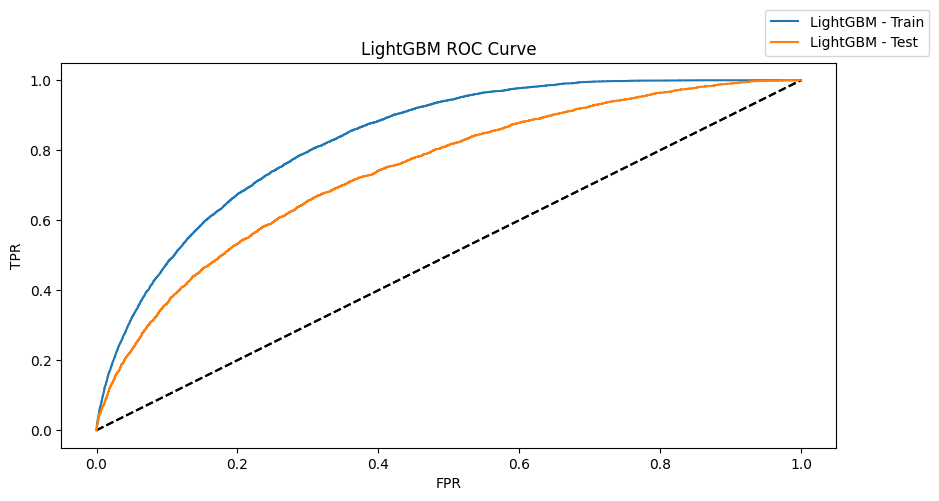

In [112]:
# Assuming you have your dataset loaded and X_train, X_test, y_train, y_test split.

# Create a LightGBM classifier
lgb_model = lgb.LGBMClassifier(class_weight='balanced')

# Fit the model on the training data
lgb_model.fit(X_train, y_train)

# Make predictions on the test and train data
y_test_pred = lgb_model.predict(X_test)
y_train_pred = lgb_model.predict(X_train)

print("========================== LightGBM - Model Report =========================")

print("===================== Model Accuracy ==============================")
print("Train Accuracy: %0.3f" %(lgb_model.score(X_train, y_train)))
print("Test Accuracy: %0.3f" %(lgb_model.score(X_test, y_test)))
print("=====================================================")

# Cross-validation
# from sklearn.model_selection import cross_val_score

print("===================== Cross Validation Scores ===========================")
cv_results_lgb = cross_val_score(lgb_model, X_train, y_train, cv=5, scoring='roc_auc')
for i in range(len(cv_results_lgb)):
    print("Fold - {}".format(i+1))
    print("CV Score = %0.3f" % cv_results_lgb[i])
print("Average 5-Fold CV Score: %0.3f" %(np.mean(cv_results_lgb)))
print("=====================================================")

# Performance Metrics

print("===================== Model Performance Metrics ===========================")
print("Test Confusion Matrix: ")
print(confusion_matrix(y_test, y_test_pred))
print("============================")
print("Train Confusion Matrix: ")
print(confusion_matrix(y_train, y_train_pred))
print("=====================================================")
print("Test Classification Report: ")
print(classification_report(y_test, y_test_pred))
print("=====================================================")
print("Train Classification Report: ")
print(classification_report(y_train, y_train_pred))

y_test_pred_prob = lgb_model.predict_proba(X_test)[:, 1]
y_train_pred_prob = lgb_model.predict_proba(X_train)[:, 1]

print("===================== Model AUC Scores ===========================")
print("Train AUC Score: %0.3f" %(roc_auc_score(y_train, y_train_pred_prob)))
print("Test AUC Score: %0.3f" %(roc_auc_score(y_test, y_test_pred_prob)))
print("=====================================================")

print("===================== Model AUC Curve ===========================")
fpr, tpr, threshold = roc_curve(y_test, y_test_pred_prob)
fpr1, tpr1, threshold1 = roc_curve(y_train, y_train_pred_prob)

plt.figure(figsize=(10, 5))
plt.title('LightGBM ROC Curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr1, tpr1, label='LightGBM - Train')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='LightGBM - Test')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)
plt.show()


In [113]:
#finding the best value of train_score,test_score,vals -
train_score = []
test_score = []
vals = []

# To check the bias-variance, take any parameters and iterate over a few values - Like n_estimators, max_depth
for k in np.arange(50, 200, 50):
    vals.append(k)
    lgb = LGBMClassifier(n_estimators=k, scale_pos_weight=np.sum(y_train == 0) / np.sum(y_train == 1), max_depth=3)  # Assuming dataset is imbalanced
    lgb.fit(X_train, y_train)

    tr_score = roc_auc_score(y_train, lgb.predict_proba(X_train)[:, 1])
    train_score.append(tr_score)

    te_score = roc_auc_score(y_test, lgb.predict_proba(X_test)[:, 1])
    test_score.append(te_score)

# Print the results
print("Train AUC Scores:", train_score)
print("Test AUC Scores:", test_score)
print("n_estimators:", vals)

Train AUC Scores: [0.734450292619269, 0.7483607260053096, 0.7588173468025102]
Test AUC Scores: [0.7243812383274064, 0.7290704887150183, 0.7318412585662162]
n_estimators: [50, 100, 150]


**Bias-Variance Trade-off**

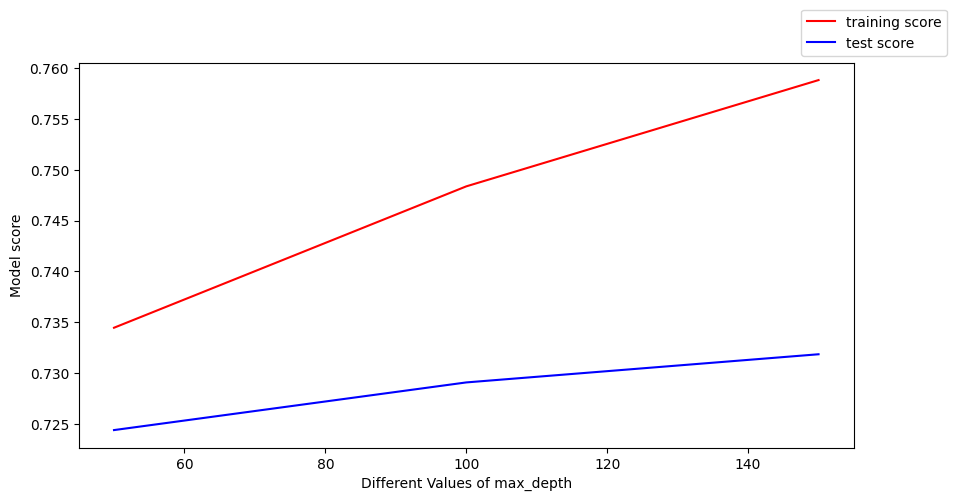

In [114]:
plt.figure(figsize=(10,5))
plt.xlabel('Different Values of max_depth')
plt.ylabel('Model score')
plt.plot(vals, train_score, color = 'r', label = "training score")
plt.plot(vals, test_score, color = 'b', label = 'test score')
plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)
plt.show()

**HYPERPARAMETER TUNING**
Identify the model with more stable performance - in the abobe case it is Light GBM and XGBOOST
Perform GridSearch Cross Validation and identify the best hyperparameter combination

In [115]:
lgb.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': 3,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 150,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': 'warn',
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0,
 'scale_pos_weight': 63.18382116436153}

In [116]:
params_lgb = {'max_depth': [1,2,3],
              'learning_rate':[0.1, 0.5, 1],
              'n_estimators':[50,100, 150,200],
              'min_child_samples':[10,20,30,40],
             }

In [117]:
grid_lgb = GridSearchCV(estimator  = lgb,
                         param_grid = params_lgb,
                         scoring    = 'roc_auc',
                         cv         = 3,
                         n_jobs     = -1,
                         verbose    = True
                        )

In [118]:
grid_lgb.fit(X_train, y_train)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


GridSearchCV(cv=3,
             estimator=LGBMClassifier(max_depth=3, n_estimators=150,
                                      scale_pos_weight=63.18382116436153),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.5, 1], 'max_depth': [1, 2, 3],
                         'min_child_samples': [10, 20, 30, 40],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='roc_auc', verbose=True)

In [119]:
print("Best Hyperparameters: \n", grid_lgb.best_params_)
print("Best AUC Score: \n", grid_lgb.best_score_)

Best Hyperparameters: 
 {'learning_rate': 0.1, 'max_depth': 3, 'min_child_samples': 20, 'n_estimators': 200}
Best AUC Score: 
 0.7276257788754973


In [120]:
# Save the best combination of parameters as best model

best_model_lgb = grid_lgb.best_estimator_

========================== LGBM Tuned - Model Report =========================
===================== Model Accuracy ==============================
Train Accuracy: 0.693
Test Accuracy: 0.690
===================== Model Performance Metrics ===========================
Test Confusion Matrix: 
[[116322  52054]
 [   931   1734]]
Train Confusion Matrix: 
[[272057 120820]
 [  1893   4325]]
Test Classification Report: 
              precision    recall  f1-score   support

           0       0.99      0.69      0.81    168376
           1       0.03      0.65      0.06      2665

    accuracy                           0.69    171041
   macro avg       0.51      0.67      0.44    171041
weighted avg       0.98      0.69      0.80    171041

Train Classification Report: 
              precision    recall  f1-score   support

           0       0.99      0.69      0.82    392877
           1       0.03      0.70      0.07      6218

    accuracy                           0.69    399095
   macro av

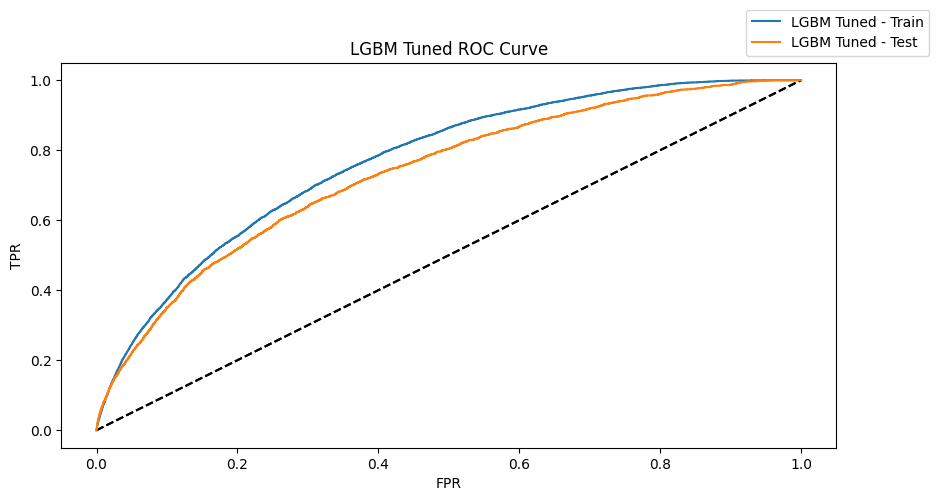

In [121]:
# Assuming you have already trained the LGBM model and obtained 'best_model_lgb'

y_test_pred_lgb = best_model_lgb.predict(X_test)
y_train_pred_lgb = best_model_lgb.predict(X_train)

print("========================== LGBM Tuned - Model Report =========================")

print("===================== Model Accuracy ==============================")
print("Train Accuracy: %0.3f" % (best_model_lgb.score(X_train, y_train)))
print("Test Accuracy: %0.3f" % (best_model_lgb.score(X_test, y_test)))
print("=====================================================")

print("===================== Model Performance Metrics ===========================")
print("Test Confusion Matrix: ")
print(confusion_matrix(y_test, y_test_pred_lgb))
print("============================")
print("Train Confusion Matrix: ")
print(confusion_matrix(y_train, y_train_pred_lgb))

print("=====================================================")
print("Test Classification Report: ")
print(classification_report(y_test, y_test_pred_lgb))
print("=====================================================")
print("Train Classification Report: ")
print(classification_report(y_train, y_train_pred_lgb))

y_test_pred_prob_lgb = best_model_lgb.predict_proba(X_test)[:, 1]
y_train_pred_prob_lgb = best_model_lgb.predict_proba(X_train)[:, 1]

print("===================== Model AUC Scores ===========================")
print("Train AUC Score: %0.3f" % (roc_auc_score(y_train, y_train_pred_prob_lgb)))
print("Test AUC Score: %0.3f" % (roc_auc_score(y_test, y_test_pred_prob_lgb)))
print("=====================================================")

print("===================== Model AUC Curve ===========================")
fpr_lgb, tpr_lgb, threshold_lgb = roc_curve(y_test, y_test_pred_prob_lgb)
fpr1_lgb, tpr1_lgb, threshold1_lgb = roc_curve(y_train, y_train_pred_prob_lgb)

plt.figure(figsize=(10, 5))
plt.title('LGBM Tuned ROC Curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr1_lgb, tpr1_lgb, label='LGBM Tuned - Train')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lgb, tpr_lgb, label='LGBM Tuned - Test')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)
plt.show()


**2.XGBOOST**

***Now we select feature and train model according to XGBOOST***

XGBoost (eXtreme Gradient Boosting) is a popular and powerful machine learning algorithm known for its efficiency and effectiv-<br>
eness in a wide range of tasks, particularly in structured/tabular data problems. It is an ensemble learning method based on <br>
decision trees and gradient boosting. Let's explain each step of XGBoost in detail:<br>

Decision Trees:<br>
At the core of XGBoost are decision trees, which are simple predictive models that partition the input space into smaller<br> 
regions and make predictions for each region. Each decision tree consists of nodes (representing split points) and leaves <br>
(representing the final predictions).<br>

Gradient Boosting:<br>
Gradient boosting is an ensemble technique that builds multiple decision trees sequentially, where each new tree corrects the<br>
errors of the previous ones. It does this by fitting each new tree to the residual errors (the difference between the actual<br>
target values and the predictions of the previously built trees).<br>

In [16]:
# divide Model_Development_data into model_sample and feature_sample 

from sklearn.model_selection import train_test_split

model_sample, feature_sample = train_test_split(Model_Development_data, test_size = 0.2, stratify=Model_Development_data['isFraud'])

In [17]:
#from xgboost import XGBClassifier
xgb_classifier = xgb.XGBClassifier(class_weight = 'balanced')
xgb_classifier.fit(feature_sample[model_feat].astype(float), feature_sample['isFraud'])

[05:13:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "class_weight" } are not used.



XGBClassifier(base_score=None, booster=None, callbacks=None,
              class_weight='balanced', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, ...)

In [18]:
feat_scored = pd.DataFrame(xgb_classifier.feature_importances_, index=model_feat,
                           columns=['Importance']).sort_values(by=['Importance'],
                                                               ascending=False).reset_index().rename(columns =
                                                                                                     {'index':'Variable'})

In [19]:
feat_scored['Cumulative_Score'] = feat_scored.Importance.cumsum()

In [20]:
feat_scored

,Variable,Importance,Cumulative_Score
0,posEntryMode_flag,0.031330,0.031330
1,count_tAA_6h,0.020926,0.052255
2,count_cardP_6h,0.019897,0.072152
3,transactionAmount,0.019643,0.091795
4,sum_amt_transT_7d,0.019556,0.111352
...,...,...,...
133,prop_pos_vol_1h,0.000000,1.000000
134,prop_cardP_vol_6h,0.000000,1.000000
135,prop_cardP_vol_1d,0.000000,1.000000
136,prop_cardP_vol_7d,0.000000,1.000000


In [21]:
feat_scored.to_csv("Feature_Importance_Score_xgb.csv", index=False)

In [28]:
# Change the threshold and test model performance
Top_Feat = list(feat_scored[feat_scored['Cumulative_Score'] <= 0.64].Variable)

In [29]:
print(Top_Feat)
print("----------------------------------------------------")
print("Total Number of Selected Features: {}".format(len(Top_Feat)))

['posEntryMode_flag', 'count_tAA_6h', 'count_cardP_6h', 'transactionAmount', 'sum_amt_transT_7d', 'merchantCategoryCode_flag', 'count_cardP_1h', 'sum_amt_cardP_6h', 'count_pos_7d', 'sum_amt_cardP_7d', 'sum_amt_transT_6h', 'sum_amt_merCntryC_7d', 'sum_amt_merCatC_7d', 'creditLimit_flag', 'count_merCntryC_7d', 'count_tAA_7d', 'sum_amt_cardP_1d', 'count_merCntryC_6h', 'sum_amt_merCatC_6h', 'count_cardP_7d', 'count_transT_1d', 'sum_amt_merCntryC_1d', 'count_merCntryC_1d', 'Minutes_pos', 'sum_amt_merCntryC_6h', 'Minutes_transT', 'count_merCatC_7d', 'count_merCatC_1h', 'sum_amt_pos_1d', 'count_pos_6h', 'Minutes_merCntryC', 'sum_amt_pos_7d', 'sum_amt_transT_1d', 'count_transT_7d', 'count_pos_1d', 'sum_amt_merCatC_1d', 'Minutes_df_merCatC', 'Minutes_merN', 'Minutes_cardP', 'sum_amt_transT_1h']
----------------------------------------------------
Total Number of Selected Features: 40


**Bringing everything together**

In [30]:
final_input = ['customerId', 'transactionDateTime', 'isFraud'] + Top_Feat

In [31]:
feature_sample = feature_sample[final_input]

In [58]:
feature_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142535 entries, 679432 to 284553
Data columns (total 43 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   customerId                 142535 non-null  int64         
 1   transactionDateTime        142535 non-null  datetime64[ns]
 2   isFraud                    142535 non-null  int64         
 3   posEntryMode_flag          142535 non-null  int64         
 4   transactionAmount          142535 non-null  float64       
 5   sum_amt_merCatC_7d         142535 non-null  float64       
 6   merchantCategoryCode_flag  142535 non-null  int64         
 7   count_merCatC_7d           142535 non-null  int64         
 8   count_merCntryC_7d         142535 non-null  int64         
 9   sum_amt_merCntryC_7d       142535 non-null  float64       
 10  count_pos_7d               142535 non-null  int64         
 11  count_merN_1d              142535 non-null  int

In [32]:
# Dividing the model input data into train test

X_train, X_test, y_train, y_test = train_test_split(model_sample[Top_Feat].astype(float), model_sample['isFraud'],
                                                    test_size = 0.3, stratify = model_sample['isFraud'])

**MODEL TRAINING and HYPERPARAMETER TUNING**

[08:57:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "class_weight" } are not used.

========================== XGBoost - Model Report =========================
===================== Model Accuracy ==============================
Train Accuracy: 0.985
Test Accuracy: 0.984
===================== Cross Validation Scores ===========================
[08:57:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "class_weight" } are not used.

[08:58:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "class_weight" } are not used.

[08:58:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-window

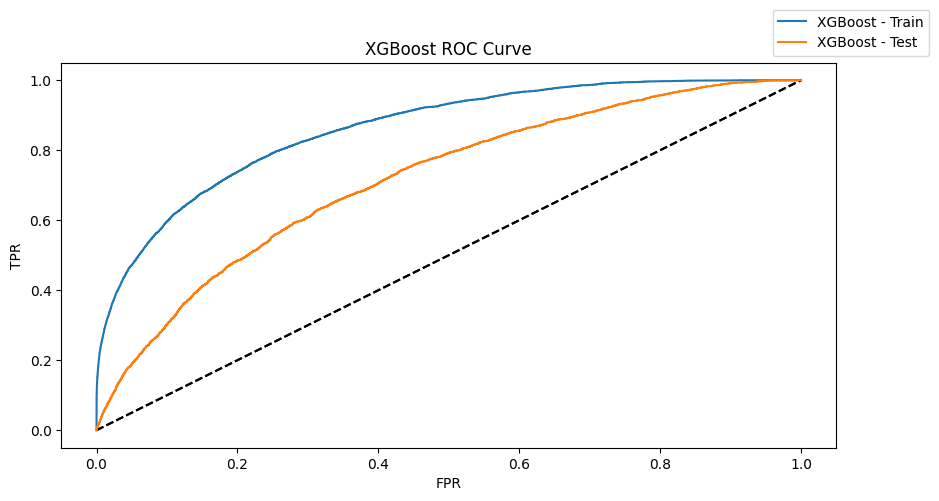

In [33]:
# Assuming you have your dataset loaded and X_train, X_test, y_train, y_test split.

# Create an XGBoost classifier
xgb_model = xgb.XGBClassifier(class_weight='balanced')

# Fit the model on the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the test and train data
y_test_pred = xgb_model.predict(X_test)
y_train_pred = xgb_model.predict(X_train)

print("========================== XGBoost - Model Report =========================")

print("===================== Model Accuracy ==============================")
print("Train Accuracy: %0.3f" %(xgb_model.score(X_train, y_train)))
print("Test Accuracy: %0.3f" %(xgb_model.score(X_test, y_test)))
print("=====================================================")

# Cross-validation
print("===================== Cross Validation Scores ===========================")
cv_results_xgb = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='roc_auc')
for i in range(len(cv_results_xgb)):
    print("Fold - {}".format(i+1))
    print("CV Score = %0.3f" % cv_results_xgb[i])
print("Average 5-Fold CV Score: %0.3f" % (np.mean(cv_results_xgb)))
print("=====================================================")

# Performance Metrics
print("===================== Model Performance Metrics ===========================")
print("Test Confusion Matrix: ")
print(confusion_matrix(y_test, y_test_pred))
print("============================")
print("Train Confusion Matrix: ")
print(confusion_matrix(y_train, y_train_pred))
print("=====================================================")
print("Test Classification Report: ")
print(classification_report(y_test, y_test_pred))
print("=====================================================")
print("Train Classification Report: ")
print(classification_report(y_train, y_train_pred))

y_test_pred_prob = xgb_model.predict_proba(X_test)[:, 1]
y_train_pred_prob = xgb_model.predict_proba(X_train)[:, 1]

print("===================== Model AUC Scores ===========================")
print("Train AUC Score: %0.3f" %(roc_auc_score(y_train, y_train_pred_prob)))
print("Test AUC Score: %0.3f" %(roc_auc_score(y_test, y_test_pred_prob)))
print("=====================================================")

print("===================== Model AUC Curve ===========================")
fpr, tpr, threshold = roc_curve(y_test, y_test_pred_prob)
fpr1, tpr1, threshold1 = roc_curve(y_train, y_train_pred_prob)

plt.figure(figsize=(10, 5))
plt.title('XGBoost ROC Curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr1, tpr1, label='XGBoost - Train')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='XGBoost - Test')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)
plt.show()


In [34]:
#finding the best value of train_score,test_score,vals -
train_score = []
test_score = []
vals = []

# To check the bias-variance, take any parameters and iterate over a few values - Like n_estimators, max_depth
for k in np.arange(50, 200, 50):
    vals.append(k)
    xgb = XGBClassifier(n_estimators=k, scale_pos_weight=np.sum(y_train == 0) / np.sum(y_train == 1), max_depth=3)  # Assuming your dataset is imbalanced
    xgb.fit(X_train, y_train)

    tr_score = roc_auc_score(y_train, xgb.predict_proba(X_train)[:, 1])
    train_score.append(tr_score)

    te_score = roc_auc_score(y_test, xgb.predict_proba(X_test)[:, 1])
    test_score.append(te_score)

# Print the results
print("Train AUC Scores:", train_score)
print("Test AUC Scores:", test_score)
print("n_estimators:", vals)

Train AUC Scores: [0.755242906929738, 0.7752899235280866, 0.7942704272920934]
Test AUC Scores: [0.7254233979681497, 0.7252880302023943, 0.7237801512936606]
n_estimators: [50, 100, 150]


**Bias-Variance Trade-off**

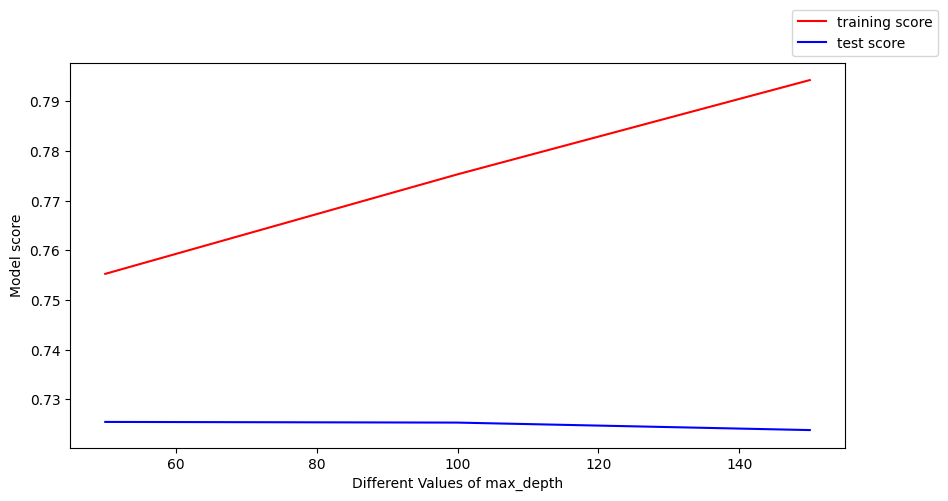

In [35]:
plt.figure(figsize=(10,5))
plt.xlabel('Different Values of max_depth')
plt.ylabel('Model score')
plt.plot(vals, train_score, color = 'r', label = "training score")
plt.plot(vals, test_score, color = 'b', label = 'test score')
plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)
plt.show()

In [63]:
xgb.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': None,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': 3,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 150,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': 63.18382116436153,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [36]:
params_xgb = {'max_depth': [1,5,7,11],
              'learning_rate':[0.1, 0.5, 1],
              'n_estimators':[50, 100, 150,200],
             }

In [37]:
grid_xgb = GridSearchCV(estimator  = xgb,
                         param_grid = params_xgb,
                         scoring    = 'roc_auc',
                         cv         = 3,
                         n_jobs     = -1,
                         verbose    = True
                        )

In [38]:
grid_xgb.fit(X_train, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=3,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=150, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.5, 1],
                         'max_depth': [1, 5, 7, 11],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='roc_auc', verbose=True)

In [39]:
print("Best Hyperparameters: \n", grid_xgb.best_params_)
print("Best AUC Score: \n", grid_xgb.best_score_)

Best Hyperparameters: 
 {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}
Best AUC Score: 
 0.7230364227399982


In [41]:
# Save the best combination of parameters as best model
best_model_xgb = grid_xgb.best_estimator_

========================== XGBoost Tuned - Model Report =========================
===================== Model Accuracy ==============================
Train Accuracy: 0.710
Test Accuracy: 0.708
===================== Model Performance Metrics ===========================
Test Confusion Matrix: 
[[119400  48976]
 [   997   1668]]
Train Confusion Matrix: 
[[278917 113960]
 [  1949   4269]]
Test Classification Report: 
              precision    recall  f1-score   support

           0       0.99      0.71      0.83    168376
           1       0.03      0.63      0.06      2665

    accuracy                           0.71    171041
   macro avg       0.51      0.67      0.44    171041
weighted avg       0.98      0.71      0.82    171041

Train Classification Report: 
              precision    recall  f1-score   support

           0       0.99      0.71      0.83    392877
           1       0.04      0.69      0.07      6218

    accuracy                           0.71    399095
   macro

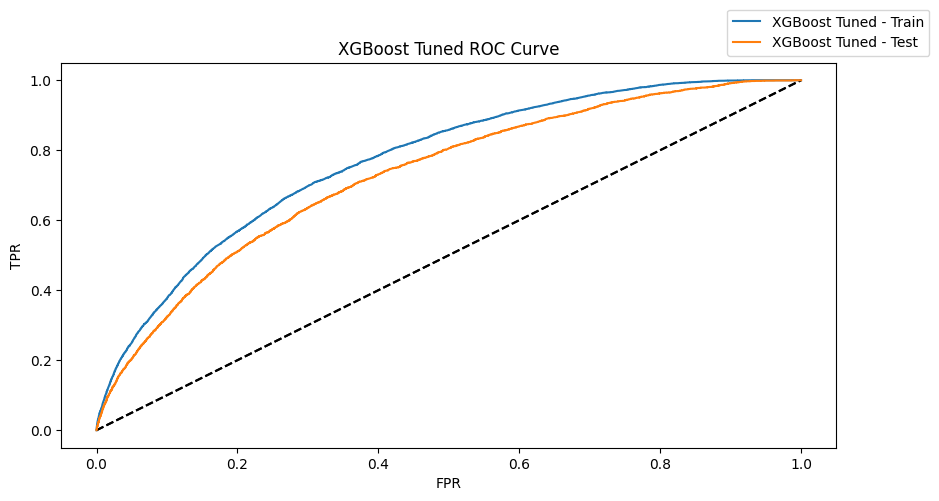

In [42]:
# Assuming you have already trained the XGBoost model and obtained 'best_model_xgb'

y_test_pred_xgb = best_model_xgb.predict(X_test)
y_train_pred_xgb = best_model_xgb.predict(X_train)

print("========================== XGBoost Tuned - Model Report =========================")

print("===================== Model Accuracy ==============================")
print("Train Accuracy: %0.3f" % (best_model_xgb.score(X_train, y_train)))
print("Test Accuracy: %0.3f" % (best_model_xgb.score(X_test, y_test)))
print("=====================================================")

print("===================== Model Performance Metrics ===========================")
print("Test Confusion Matrix: ")
print(confusion_matrix(y_test, y_test_pred_xgb))
print("============================")
print("Train Confusion Matrix: ")
print(confusion_matrix(y_train, y_train_pred_xgb))

print("=====================================================")
print("Test Classification Report: ")
print(classification_report(y_test, y_test_pred_xgb))
print("=====================================================")
print("Train Classification Report: ")
print(classification_report(y_train, y_train_pred_xgb))

y_test_pred_prob_xgb = best_model_xgb.predict_proba(X_test)[:, 1]
y_train_pred_prob_xgb = best_model_xgb.predict_proba(X_train)[:, 1]

print("===================== Model AUC Scores ===========================")
print("Train AUC Score: %0.3f" % (roc_auc_score(y_train, y_train_pred_prob_xgb)))
print("Test AUC Score: %0.3f" % (roc_auc_score(y_test, y_test_pred_prob_xgb)))
print("=====================================================")

print("===================== Model AUC Curve ===========================")
fpr_xgb, tpr_xgb, threshold_xgb = roc_curve(y_test, y_test_pred_prob_xgb)
fpr1_xgb, tpr1_xgb, threshold1_xgb = roc_curve(y_train, y_train_pred_prob_xgb)

plt.figure(figsize=(10, 5))
plt.title('XGBoost Tuned ROC Curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr1_xgb, tpr1_xgb, label='XGBoost Tuned - Train')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost Tuned - Test')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)
plt.show()


***Now we select feature and train model according to Logistic Regression***

**3.Logistic Regression**

In [12]:
# divide Model_Development_data into model_sample and feature_sample 
model_sample, feature_sample = train_test_split(Model_Development_data, test_size = 0.2, stratify=Model_Development_data['isFraud'])

In [14]:
rf = RandomForestClassifier(class_weight = 'balanced')
rf.fit(feature_sample[model_feat].astype(float), feature_sample['isFraud'])

RandomForestClassifier(class_weight='balanced')

In [15]:
feat_scored = pd.DataFrame(rf.feature_importances_, index=model_feat,
                           columns=['Importance']).sort_values(by=['Importance'],
                                                               ascending=False).reset_index().rename(columns =
                                                                                                     {'index':'Variable'})

In [16]:
feat_scored['Cumulative_Score'] = feat_scored.Importance.cumsum()

In [17]:
feat_scored

,Variable,Importance,Cumulative_Score
0,transactionAmount,0.078665,0.078665
1,Minutes_tAA,0.029606,0.108271
2,Hours_tAA,0.028781,0.137052
3,Minutes_merN,0.027073,0.164124
4,Days_accOpenDate,0.025605,0.189729
...,...,...,...
133,prop_merN_vol_1h,0.000152,0.999579
134,count_tAA_1h,0.000152,0.999731
135,prop_tAA_vol_1h,0.000100,0.999831
136,prop_tAA_amt_1h,0.000086,0.999917


In [18]:
feat_scored.to_csv("Feature_Importance_Score_logisticReg.csv", index=False)

In [21]:
# Change the threshold and test model performance
Top_Feat = list(feat_scored[feat_scored['Cumulative_Score'] <= 0.84].Variable)

In [22]:
print(Top_Feat)
print("----------------------------------------------------")
print("Total Number of Selected Features: {}".format(len(Top_Feat)))

['transactionAmount', 'Minutes_tAA', 'Hours_tAA', 'Minutes_merN', 'Days_accOpenDate', 'Minutes_pos', 'Hours_accOpenDate', 'Hours_merN', 'Minutes_accOpenDate', 'Minutes_df_merCatC', 'Days_lastAddChange', 'Hours_lastAddChange', 'Minutes_lastAddChange', 'sum_amt_cardP_7d', 'Minutes_cardP', 'sum_amt_merCatC_7d', 'Minutes_transT', 'sum_amt_merCntryC_7d', 'sum_amt_transT_7d', 'sum_amt_pos_7d', 'Hours_pos', 'Minutes_merCntryC', 'Hours_df_merCatC', 'Hours_cardP', 'count_merCntryC_7d', 'posEntryMode_flag', 'count_transT_7d', 'count_cardP_7d', 'count_merCatC_7d', 'Hours_merCntryC', 'Hours_transT', 'sum_amt_merN_7d', 'sum_amt_merCntryC_1d', 'sum_amt_cardP_1d', 'sum_amt_transT_1d', 'count_pos_7d', 'merchantCategoryCode_flag', 'sum_amt_merCatC_1d', 'sum_amt_tAA_7d', 'sum_amt_pos_1d']
----------------------------------------------------
Total Number of Selected Features: 40


In [23]:
feature_sample = feature_sample[['customerId', 'transactionDateTime','isFraud']+ Top_Feat]

In [24]:
feature_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142535 entries, 619421 to 141379
Data columns (total 43 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   customerId                 142535 non-null  int64         
 1   transactionDateTime        142535 non-null  datetime64[ns]
 2   isFraud                    142535 non-null  int64         
 3   transactionAmount          142535 non-null  float64       
 4   Minutes_tAA                142535 non-null  int64         
 5   Hours_tAA                  142535 non-null  int64         
 6   Minutes_merN               142535 non-null  int64         
 7   Days_accOpenDate           142535 non-null  int64         
 8   Minutes_pos                142535 non-null  int64         
 9   Hours_accOpenDate          142535 non-null  int64         
 10  Hours_merN                 142535 non-null  int64         
 11  Minutes_accOpenDate        142535 non-null  int

In [25]:
# Dividing the model_sample input data into train test
X_train, X_test, y_train, y_test = train_test_split(model_sample[Top_Feat].astype(float),model_sample['isFraud'],
                                                    test_size = 0.3, stratify = model_sample['isFraud'])

C:\Users\VICTUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


========================== Logistic Regression - Model Report =========================
===================== Model Accuracy ==============================
Train Accuracy: 0.571
Test Accuracy: 0.569
===================== Cross Validation Scores ===========================


C:\Users\VICTUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\VICTUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

Fold - 1
CV Score = 0.583
Fold - 2
CV Score = 0.583
Fold - 3
CV Score = 0.592
Fold - 4
CV Score = 0.594
Fold - 5
CV Score = 0.606
Average 5-Fold CV Score: 0.592
===================== Model Performance Metrices ===========================
Test Confusion Matrix: 
[[95811 72565]
 [ 1172  1493]]
Train Confusion Matrix: 
[[224374 168503]
 [  2708   3510]]
Test Classification Report: 
              precision    recall  f1-score   support

           0       0.99      0.57      0.72    168376
           1       0.02      0.56      0.04      2665

    accuracy                           0.57    171041
   macro avg       0.50      0.56      0.38    171041
weighted avg       0.97      0.57      0.71    171041

Train Classification Report: 
              precision    recall  f1-score   support

           0       0.99      0.57      0.72    392877
           1       0.02      0.56      0.04      6218

    accuracy                           0.57    399095
   macro avg       0.50      0.57      0.38

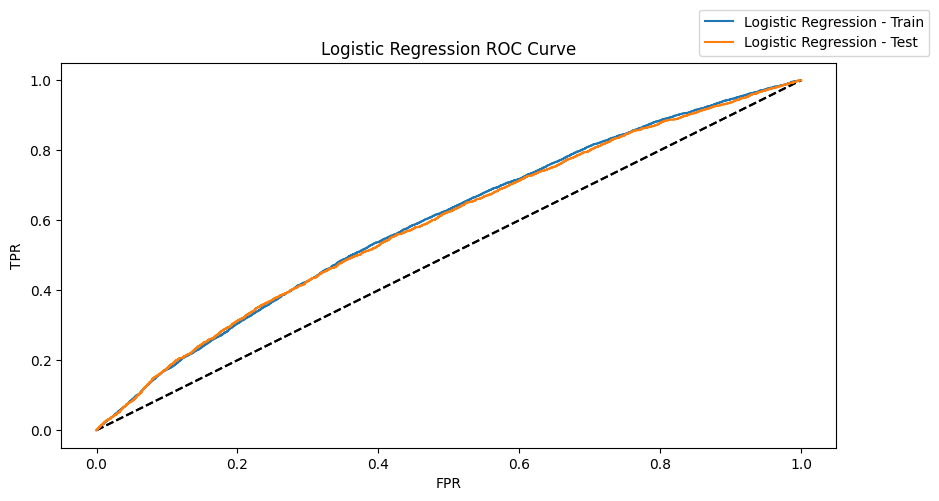

In [26]:
lr = LogisticRegression(class_weight='balanced')

lr.fit(X_train, y_train)

y_test_pred = lr.predict(X_test)
y_train_pred = lr.predict(X_train)

print("========================== Logistic Regression - Model Report =========================")

print("===================== Model Accuracy ==============================")
print("Train Accuracy: %0.3f"%(lr.score(X_train, y_train)))
print("Test Accuracy: %0.3f"%(lr.score(X_test, y_test)))
print("=====================================================")
# Cross validation
from sklearn.model_selection import cross_val_score

print("===================== Cross Validation Scores ===========================")
cv_results_lr = cross_val_score(lr, X_train, y_train, cv=5, scoring='roc_auc')
for i in range(len(cv_results_lr)):
    print("Fold - {}".format(i+1))
    print("CV Score = %0.3f"%cv_results_lr[i])
print("Average 5-Fold CV Score: %0.3f"%(np.mean(cv_results_lr)))
print("=====================================================")

# Performance Metrices
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

print("===================== Model Performance Metrices ===========================")
print("Test Confusion Matrix: ")
print(confusion_matrix(y_test, y_test_pred))
print("============================")
print("Train Confusion Matrix: ")
print(confusion_matrix(y_train, y_train_pred))

print("=====================================================")
print("Test Classification Report: ")
print(classification_report(y_test, y_test_pred))
print("=====================================================")
print("Train Classification Report: ")
print(classification_report(y_train, y_train_pred))

y_test_pred_prob = lr.predict_proba(X_test)[:,1]
y_train_pred_prob = lr.predict_proba(X_train)[:,1]

print("===================== Model AUC Scores ===========================")
print("Train AUC Score: %0.3f"%(roc_auc_score(y_train, y_train_pred_prob)))
print("Test AUC Score: %0.3f"%(roc_auc_score(y_test, y_test_pred_prob)))
print("=====================================================")


print("===================== Model AUC Curve ===========================")
fpr, tpr, threshold = roc_curve(y_test, y_test_pred_prob)
fpr1, tpr1, threshold1 = roc_curve(y_train, y_train_pred_prob)
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.title('Logistic Regression ROC Curve')
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr1, tpr1, label='Logistic Regression - Train')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)

plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression - Test')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)
plt.show()


In [ ]:
# Hyperparameter tuning of the logistic regression 

In [213]:
lr.get_params()

{'C': 1.0,
 'class_weight': 'balanced',
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [27]:
params_logistic = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
    'max_iter': [50, 100, 200],
}


In [28]:
grid_logistic = GridSearchCV(estimator=lr,
                             param_grid=params_logistic,
                             scoring='roc_auc',
                             cv=3,
                             n_jobs=-1,
                             verbose=True
                            )

In [29]:
grid_logistic.fit(X_train, y_train)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


C:\Users\VICTUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


GridSearchCV(cv=3, estimator=LogisticRegression(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'max_iter': [50, 100, 200], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='roc_auc', verbose=True)

In [31]:
print("Best Hyperparameters: \n", grid_logistic.best_params_)
print("Best AUC Score: \n", grid_logistic.best_score_)

Best Hyperparameters: 
 {'C': 10, 'max_iter': 50, 'penalty': 'l1', 'solver': 'liblinear'}
Best AUC Score: 
 0.7002896746746273


In [32]:
# Save the best combination of parameters as best model
best_logistic_model = grid_logistic.best_estimator_

========================== Logistic Regression Tuned - Model Report =========================
===================== Model Accuracy ==============================
Train Accuracy: 0.692
Test Accuracy: 0.691
===================== Model Performance Metrics ===========================
Test Confusion Matrix: 
[[116529  51847]
 [  1089   1576]]
Train Confusion Matrix: 
[[272260 120617]
 [  2387   3831]]
Test Classification Report: 
              precision    recall  f1-score   support

           0       0.99      0.69      0.81    168376
           1       0.03      0.59      0.06      2665

    accuracy                           0.69    171041
   macro avg       0.51      0.64      0.44    171041
weighted avg       0.98      0.69      0.80    171041

Train Classification Report: 
              precision    recall  f1-score   support

           0       0.99      0.69      0.82    392877
           1       0.03      0.62      0.06      6218

    accuracy                           0.69    399

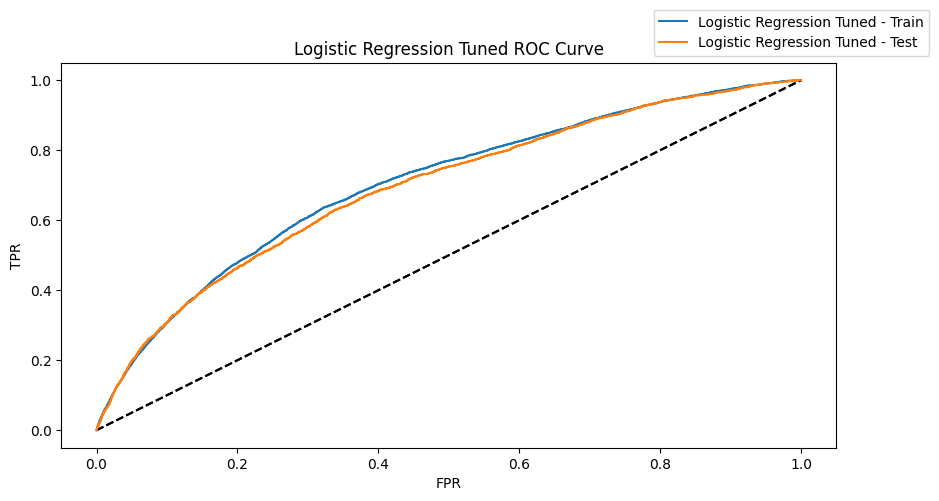

In [34]:
# Assuming you have y_test, X_test, y_train, X_train, and best_logistic_model already defined

y_test_pred = best_logistic_model.predict(X_test)
y_train_pred = best_logistic_model.predict(X_train)

print("========================== Logistic Regression Tuned - Model Report =========================")

print("===================== Model Accuracy ==============================")
print("Train Accuracy: %0.3f" % (best_logistic_model.score(X_train, y_train)))
print("Test Accuracy: %0.3f" % (best_logistic_model.score(X_test, y_test)))
print("=====================================================")

# Performance Metrics
print("===================== Model Performance Metrics ===========================")
print("Test Confusion Matrix: ")
print(confusion_matrix(y_test, y_test_pred))
print("============================")
print("Train Confusion Matrix: ")
print(confusion_matrix(y_train, y_train_pred))

print("=====================================================")
print("Test Classification Report: ")
print(classification_report(y_test, y_test_pred))
print("=====================================================")
print("Train Classification Report: ")
print(classification_report(y_train, y_train_pred))

y_test_pred_prob = best_logistic_model.predict_proba(X_test)[:, 1]
y_train_pred_prob = best_logistic_model.predict_proba(X_train)[:, 1]

print("===================== Model AUC Scores ===========================")
print("Train AUC Score: %0.3f" % (roc_auc_score(y_train, y_train_pred_prob)))
print("Test AUC Score: %0.3f" % (roc_auc_score(y_test, y_test_pred_prob)))
print("=====================================================")

print("===================== Model AUC Curve ===========================")
fpr, tpr, threshold = roc_curve(y_test, y_test_pred_prob)
fpr1, tpr1, threshold1 = roc_curve(y_train, y_train_pred_prob)

plt.figure(figsize=(10, 5))
plt.title('Logistic Regression Tuned ROC Curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr1, tpr1, label='Logistic Regression Tuned - Train')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression Tuned - Test')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)
plt.show()

***Now we select features and train model according to CatBoost***

**CatBoost**

CatBoost is a popular open-source gradient boosting library that is widely used in machine learning tasks, especially those involving structured/tabular data.<br>
It is known for its efficiency, high performance, and ability to handle categorical features without extensive pre-processing.<br> CatBoost is an extension of the gradient boosting algorithm and introduces several novel techniques to improve the overall performance and generalization of the model.

In [65]:
# divide Model_Development_data into model_sample and feature_sample 
model_sample, feature_sample = train_test_split(Model_Development_data, test_size = 0.2, stratify=Model_Development_data['isFraud'])

In [66]:
# Assuming you have already defined the feature_sample and model_feat dataframes

# Instantiate the CatBoostClassifier with balanced class weights
catboost_model = CatBoostClassifier(class_weights=(1 / feature_sample['isFraud'].value_counts(normalize=True)).to_dict(), random_seed=42)

# Fit the CatBoost model to the data
catboost_model.fit(feature_sample[model_feat], feature_sample['isFraud'])

# Get feature importance scores
feat_importance = catboost_model.get_feature_importance()
feat_scored = pd.DataFrame(feat_importance, index=model_feat, columns=['Importance']).sort_values(by=['Importance'], ascending=False).reset_index().rename(columns={'index': 'Variable'})
feat_scored['Cumulative_Score'] = feat_scored['Importance'].cumsum()

# Calculate the cumulative importance percentage
feat_scored['Cumulative_Percentage'] = (feat_scored['Cumulative_Score'] / feat_scored['Importance'].sum()) * 100


Learning rate set to 0.085636
0:	learn: 0.6836445	total: 258ms	remaining: 4m 17s
1:	learn: 0.6771033	total: 338ms	remaining: 2m 48s
2:	learn: 0.6699345	total: 402ms	remaining: 2m 13s
3:	learn: 0.6641126	total: 458ms	remaining: 1m 54s
4:	learn: 0.6581763	total: 515ms	remaining: 1m 42s
5:	learn: 0.6537251	total: 568ms	remaining: 1m 34s
6:	learn: 0.6498304	total: 616ms	remaining: 1m 27s
7:	learn: 0.6453706	total: 664ms	remaining: 1m 22s
8:	learn: 0.6419425	total: 711ms	remaining: 1m 18s
9:	learn: 0.6391576	total: 764ms	remaining: 1m 15s
10:	learn: 0.6366658	total: 818ms	remaining: 1m 13s
11:	learn: 0.6349758	total: 872ms	remaining: 1m 11s
12:	learn: 0.6326043	total: 927ms	remaining: 1m 10s
13:	learn: 0.6311946	total: 991ms	remaining: 1m 9s
14:	learn: 0.6295345	total: 1.05s	remaining: 1m 8s
15:	learn: 0.6280629	total: 1.1s	remaining: 1m 7s
16:	learn: 0.6256295	total: 1.16s	remaining: 1m 6s
17:	learn: 0.6239330	total: 1.21s	remaining: 1m 5s
18:	learn: 0.6222342	total: 1.26s	remaining: 1m 5s

161:	learn: 0.5318134	total: 8.42s	remaining: 43.6s
162:	learn: 0.5311958	total: 8.47s	remaining: 43.5s
163:	learn: 0.5302269	total: 8.53s	remaining: 43.5s
164:	learn: 0.5287537	total: 8.58s	remaining: 43.4s
165:	learn: 0.5279833	total: 8.63s	remaining: 43.4s
166:	learn: 0.5270884	total: 8.68s	remaining: 43.3s
167:	learn: 0.5255922	total: 8.73s	remaining: 43.2s
168:	learn: 0.5244232	total: 8.79s	remaining: 43.2s
169:	learn: 0.5234264	total: 8.84s	remaining: 43.2s
170:	learn: 0.5225515	total: 8.9s	remaining: 43.1s
171:	learn: 0.5217992	total: 8.96s	remaining: 43.1s
172:	learn: 0.5207628	total: 9.01s	remaining: 43.1s
173:	learn: 0.5202423	total: 9.05s	remaining: 43s
174:	learn: 0.5196385	total: 9.09s	remaining: 42.9s
175:	learn: 0.5188675	total: 9.15s	remaining: 42.8s
176:	learn: 0.5177637	total: 9.19s	remaining: 42.7s
177:	learn: 0.5168248	total: 9.25s	remaining: 42.7s
178:	learn: 0.5159424	total: 9.29s	remaining: 42.6s
179:	learn: 0.5148776	total: 9.34s	remaining: 42.6s
180:	learn: 0.5

324:	learn: 0.4135347	total: 16.2s	remaining: 33.7s
325:	learn: 0.4129072	total: 16.3s	remaining: 33.7s
326:	learn: 0.4123769	total: 16.3s	remaining: 33.6s
327:	learn: 0.4118408	total: 16.4s	remaining: 33.6s
328:	learn: 0.4112519	total: 16.4s	remaining: 33.5s
329:	learn: 0.4106397	total: 16.5s	remaining: 33.5s
330:	learn: 0.4098773	total: 16.5s	remaining: 33.4s
331:	learn: 0.4096275	total: 16.6s	remaining: 33.3s
332:	learn: 0.4087871	total: 16.6s	remaining: 33.3s
333:	learn: 0.4084406	total: 16.7s	remaining: 33.2s
334:	learn: 0.4076791	total: 16.7s	remaining: 33.2s
335:	learn: 0.4069372	total: 16.7s	remaining: 33.1s
336:	learn: 0.4066272	total: 16.8s	remaining: 33s
337:	learn: 0.4058079	total: 16.8s	remaining: 33s
338:	learn: 0.4050625	total: 16.9s	remaining: 32.9s
339:	learn: 0.4043207	total: 16.9s	remaining: 32.8s
340:	learn: 0.4036946	total: 17s	remaining: 32.8s
341:	learn: 0.4029313	total: 17s	remaining: 32.7s
342:	learn: 0.4025818	total: 17.1s	remaining: 32.7s
343:	learn: 0.402222

484:	learn: 0.3313838	total: 23.4s	remaining: 24.8s
485:	learn: 0.3308548	total: 23.4s	remaining: 24.8s
486:	learn: 0.3304546	total: 23.5s	remaining: 24.7s
487:	learn: 0.3300900	total: 23.5s	remaining: 24.7s
488:	learn: 0.3297293	total: 23.6s	remaining: 24.6s
489:	learn: 0.3294043	total: 23.6s	remaining: 24.6s
490:	learn: 0.3288637	total: 23.7s	remaining: 24.5s
491:	learn: 0.3283184	total: 23.7s	remaining: 24.5s
492:	learn: 0.3279876	total: 23.7s	remaining: 24.4s
493:	learn: 0.3277044	total: 23.8s	remaining: 24.4s
494:	learn: 0.3272799	total: 23.8s	remaining: 24.3s
495:	learn: 0.3268607	total: 23.9s	remaining: 24.3s
496:	learn: 0.3265373	total: 23.9s	remaining: 24.2s
497:	learn: 0.3260702	total: 24s	remaining: 24.2s
498:	learn: 0.3257314	total: 24s	remaining: 24.1s
499:	learn: 0.3252324	total: 24.1s	remaining: 24.1s
500:	learn: 0.3250060	total: 24.1s	remaining: 24s
501:	learn: 0.3246107	total: 24.1s	remaining: 23.9s
502:	learn: 0.3242509	total: 24.2s	remaining: 23.9s
503:	learn: 0.3239

643:	learn: 0.2731251	total: 31s	remaining: 17.1s
644:	learn: 0.2728743	total: 31s	remaining: 17.1s
645:	learn: 0.2723940	total: 31.1s	remaining: 17s
646:	learn: 0.2720058	total: 31.2s	remaining: 17s
647:	learn: 0.2715842	total: 31.2s	remaining: 17s
648:	learn: 0.2713590	total: 31.3s	remaining: 16.9s
649:	learn: 0.2711164	total: 31.3s	remaining: 16.9s
650:	learn: 0.2706563	total: 31.4s	remaining: 16.8s
651:	learn: 0.2703569	total: 31.4s	remaining: 16.8s
652:	learn: 0.2701009	total: 31.5s	remaining: 16.7s
653:	learn: 0.2698430	total: 31.6s	remaining: 16.7s
654:	learn: 0.2694645	total: 31.6s	remaining: 16.7s
655:	learn: 0.2692321	total: 31.7s	remaining: 16.6s
656:	learn: 0.2688751	total: 31.7s	remaining: 16.6s
657:	learn: 0.2685799	total: 31.8s	remaining: 16.5s
658:	learn: 0.2682616	total: 31.8s	remaining: 16.5s
659:	learn: 0.2679077	total: 31.9s	remaining: 16.4s
660:	learn: 0.2675327	total: 31.9s	remaining: 16.4s
661:	learn: 0.2671465	total: 32s	remaining: 16.3s
662:	learn: 0.2666371	to

804:	learn: 0.2273102	total: 39.2s	remaining: 9.5s
805:	learn: 0.2271093	total: 39.3s	remaining: 9.45s
806:	learn: 0.2269209	total: 39.3s	remaining: 9.41s
807:	learn: 0.2267659	total: 39.4s	remaining: 9.36s
808:	learn: 0.2264685	total: 39.4s	remaining: 9.31s
809:	learn: 0.2262395	total: 39.5s	remaining: 9.26s
810:	learn: 0.2261030	total: 39.5s	remaining: 9.21s
811:	learn: 0.2259671	total: 39.6s	remaining: 9.16s
812:	learn: 0.2257344	total: 39.6s	remaining: 9.12s
813:	learn: 0.2254842	total: 39.7s	remaining: 9.07s
814:	learn: 0.2252500	total: 39.7s	remaining: 9.02s
815:	learn: 0.2250094	total: 39.8s	remaining: 8.97s
816:	learn: 0.2246907	total: 39.9s	remaining: 8.93s
817:	learn: 0.2244467	total: 39.9s	remaining: 8.88s
818:	learn: 0.2241268	total: 40s	remaining: 8.83s
819:	learn: 0.2239275	total: 40s	remaining: 8.78s
820:	learn: 0.2236167	total: 40.1s	remaining: 8.74s
821:	learn: 0.2233060	total: 40.1s	remaining: 8.69s
822:	learn: 0.2230402	total: 40.2s	remaining: 8.64s
823:	learn: 0.222

964:	learn: 0.1912647	total: 46.9s	remaining: 1.7s
965:	learn: 0.1910842	total: 46.9s	remaining: 1.65s
966:	learn: 0.1908202	total: 47s	remaining: 1.6s
967:	learn: 0.1906043	total: 47s	remaining: 1.55s
968:	learn: 0.1903684	total: 47.1s	remaining: 1.51s
969:	learn: 0.1901767	total: 47.1s	remaining: 1.46s
970:	learn: 0.1899343	total: 47.2s	remaining: 1.41s
971:	learn: 0.1897849	total: 47.2s	remaining: 1.36s
972:	learn: 0.1895717	total: 47.2s	remaining: 1.31s
973:	learn: 0.1893123	total: 47.3s	remaining: 1.26s
974:	learn: 0.1890701	total: 47.3s	remaining: 1.21s
975:	learn: 0.1888875	total: 47.4s	remaining: 1.16s
976:	learn: 0.1886534	total: 47.4s	remaining: 1.12s
977:	learn: 0.1884901	total: 47.5s	remaining: 1.07s
978:	learn: 0.1882875	total: 47.5s	remaining: 1.02s
979:	learn: 0.1881268	total: 47.6s	remaining: 971ms
980:	learn: 0.1880083	total: 47.6s	remaining: 922ms
981:	learn: 0.1878829	total: 47.6s	remaining: 873ms
982:	learn: 0.1876055	total: 47.7s	remaining: 825ms
983:	learn: 0.1874

In [72]:
# Define the threshold for feature selection (e.g., 90%)
threshold = 86

# Select top features based on the threshold
Top_Feat = list(feat_scored[feat_scored['Cumulative_Percentage'] <= threshold]['Variable'])
print("Top Features:")
print(Top_Feat)

Top Features:
['transactionAmount', 'Days_accOpenDate', 'Hours_merN', 'Hours_df_merCatC', 'Days_lastAddChange', 'sum_amt_cardP_7d', 'sum_amt_pos_7d', 'Minutes_merN', 'Minutes_tAA', 'sum_amt_merCatC_7d', 'Hours_tAA', 'sum_amt_merCntryC_7d', 'sum_amt_merN_7d', 'Minutes_pos', 'Minutes_df_merCatC', 'Hours_pos', 'Minutes_accOpenDate', 'count_merCatC_7d', 'Hours_transT', 'sum_amt_transT_7d', 'count_cardP_7d', 'Minutes_cardP', 'Minutes_merCntryC', 'count_merCntryC_7d', 'sum_amt_merCatC_1d', 'Hours_cardP', 'Hours_accOpenDate', 'sum_amt_pos_1d', 'count_pos_7d', 'Hours_merCntryC', 'count_merN_7d', 'merchantCategoryCode_flag', 'sum_amt_merCntryC_1d', 'posEntryMode_flag', 'sum_amt_tAA_7d', 'count_transT_7d', 'Minutes_transT', 'Minutes_lastAddChange', 'sum_amt_cardP_1d', 'transactionDay_flag']


In [73]:
len(Top_Feat)

40

In [74]:
final_input = ['customerId', 'transactionDateTime', 'isFraud'] + Top_Feat

In [75]:
feature_sample = feature_sample[final_input]

In [76]:
# Dividing the model_sample input data into train test

X_train, X_test, y_train, y_test = train_test_split(model_sample[Top_Feat].astype(float),model_sample['isFraud'],
                                                    test_size = 0.3, stratify = model_sample['isFraud'])

Learning rate set to 0.132921
0:	learn: 0.4629791	total: 98.8ms	remaining: 1m 38s
1:	learn: 0.3168066	total: 196ms	remaining: 1m 37s
2:	learn: 0.2275603	total: 284ms	remaining: 1m 34s
3:	learn: 0.1747051	total: 368ms	remaining: 1m 31s
4:	learn: 0.1412891	total: 467ms	remaining: 1m 32s
5:	learn: 0.1202408	total: 584ms	remaining: 1m 36s
6:	learn: 0.1065365	total: 687ms	remaining: 1m 37s
7:	learn: 0.0970900	total: 760ms	remaining: 1m 34s
8:	learn: 0.0909238	total: 853ms	remaining: 1m 33s
9:	learn: 0.0867076	total: 953ms	remaining: 1m 34s
10:	learn: 0.0835058	total: 1.04s	remaining: 1m 33s
11:	learn: 0.0816049	total: 1.13s	remaining: 1m 33s
12:	learn: 0.0799995	total: 1.22s	remaining: 1m 32s
13:	learn: 0.0787334	total: 1.31s	remaining: 1m 32s
14:	learn: 0.0779207	total: 1.41s	remaining: 1m 32s
15:	learn: 0.0773768	total: 1.5s	remaining: 1m 32s
16:	learn: 0.0768655	total: 1.59s	remaining: 1m 31s
17:	learn: 0.0764280	total: 1.68s	remaining: 1m 31s
18:	learn: 0.0761633	total: 1.77s	remaining:

159:	learn: 0.0717289	total: 14.1s	remaining: 1m 14s
160:	learn: 0.0717216	total: 14.2s	remaining: 1m 13s
161:	learn: 0.0717132	total: 14.3s	remaining: 1m 13s
162:	learn: 0.0716945	total: 14.4s	remaining: 1m 13s
163:	learn: 0.0716703	total: 14.4s	remaining: 1m 13s
164:	learn: 0.0716551	total: 14.5s	remaining: 1m 13s
165:	learn: 0.0716271	total: 14.6s	remaining: 1m 13s
166:	learn: 0.0716081	total: 14.7s	remaining: 1m 13s
167:	learn: 0.0716005	total: 14.8s	remaining: 1m 13s
168:	learn: 0.0715409	total: 14.9s	remaining: 1m 13s
169:	learn: 0.0715232	total: 15s	remaining: 1m 13s
170:	learn: 0.0715070	total: 15.1s	remaining: 1m 12s
171:	learn: 0.0714906	total: 15.1s	remaining: 1m 12s
172:	learn: 0.0714846	total: 15.2s	remaining: 1m 12s
173:	learn: 0.0714678	total: 15.3s	remaining: 1m 12s
174:	learn: 0.0714585	total: 15.4s	remaining: 1m 12s
175:	learn: 0.0713999	total: 15.5s	remaining: 1m 12s
176:	learn: 0.0713590	total: 15.6s	remaining: 1m 12s
177:	learn: 0.0713387	total: 15.6s	remaining: 1m

319:	learn: 0.0692420	total: 27.8s	remaining: 59.1s
320:	learn: 0.0692248	total: 27.9s	remaining: 59s
321:	learn: 0.0692187	total: 28s	remaining: 58.9s
322:	learn: 0.0691843	total: 28.1s	remaining: 58.8s
323:	learn: 0.0691808	total: 28.1s	remaining: 58.7s
324:	learn: 0.0691608	total: 28.2s	remaining: 58.6s
325:	learn: 0.0691208	total: 28.3s	remaining: 58.5s
326:	learn: 0.0691120	total: 28.4s	remaining: 58.4s
327:	learn: 0.0690941	total: 28.5s	remaining: 58.3s
328:	learn: 0.0690773	total: 28.5s	remaining: 58.2s
329:	learn: 0.0690665	total: 28.6s	remaining: 58.1s
330:	learn: 0.0690578	total: 28.7s	remaining: 58s
331:	learn: 0.0690395	total: 28.8s	remaining: 57.9s
332:	learn: 0.0690111	total: 28.9s	remaining: 57.8s
333:	learn: 0.0689904	total: 28.9s	remaining: 57.7s
334:	learn: 0.0689796	total: 29s	remaining: 57.6s
335:	learn: 0.0689678	total: 29.1s	remaining: 57.5s
336:	learn: 0.0689559	total: 29.2s	remaining: 57.4s
337:	learn: 0.0689397	total: 29.2s	remaining: 57.3s
338:	learn: 0.068913

478:	learn: 0.0670613	total: 40.3s	remaining: 43.8s
479:	learn: 0.0670525	total: 40.4s	remaining: 43.7s
480:	learn: 0.0670455	total: 40.4s	remaining: 43.6s
481:	learn: 0.0670357	total: 40.5s	remaining: 43.6s
482:	learn: 0.0670170	total: 40.6s	remaining: 43.5s
483:	learn: 0.0670069	total: 40.7s	remaining: 43.4s
484:	learn: 0.0669884	total: 40.8s	remaining: 43.3s
485:	learn: 0.0669679	total: 40.8s	remaining: 43.2s
486:	learn: 0.0669452	total: 40.9s	remaining: 43.1s
487:	learn: 0.0669278	total: 41s	remaining: 43s
488:	learn: 0.0669150	total: 41.1s	remaining: 42.9s
489:	learn: 0.0668988	total: 41.1s	remaining: 42.8s
490:	learn: 0.0668839	total: 41.2s	remaining: 42.7s
491:	learn: 0.0668697	total: 41.3s	remaining: 42.6s
492:	learn: 0.0668656	total: 41.4s	remaining: 42.5s
493:	learn: 0.0668555	total: 41.4s	remaining: 42.5s
494:	learn: 0.0668509	total: 41.5s	remaining: 42.4s
495:	learn: 0.0668378	total: 41.6s	remaining: 42.3s
496:	learn: 0.0668241	total: 41.7s	remaining: 42.2s
497:	learn: 0.06

639:	learn: 0.0651368	total: 53.2s	remaining: 29.9s
640:	learn: 0.0651230	total: 53.3s	remaining: 29.8s
641:	learn: 0.0651167	total: 53.3s	remaining: 29.7s
642:	learn: 0.0651049	total: 53.4s	remaining: 29.7s
643:	learn: 0.0650982	total: 53.5s	remaining: 29.6s
644:	learn: 0.0650797	total: 53.6s	remaining: 29.5s
645:	learn: 0.0650604	total: 53.6s	remaining: 29.4s
646:	learn: 0.0650362	total: 53.7s	remaining: 29.3s
647:	learn: 0.0650289	total: 53.8s	remaining: 29.2s
648:	learn: 0.0649939	total: 53.9s	remaining: 29.1s
649:	learn: 0.0649847	total: 54s	remaining: 29.1s
650:	learn: 0.0649811	total: 54s	remaining: 29s
651:	learn: 0.0649635	total: 54.1s	remaining: 28.9s
652:	learn: 0.0649459	total: 54.2s	remaining: 28.8s
653:	learn: 0.0649249	total: 54.3s	remaining: 28.7s
654:	learn: 0.0649160	total: 54.4s	remaining: 28.6s
655:	learn: 0.0649034	total: 54.4s	remaining: 28.6s
656:	learn: 0.0649005	total: 54.5s	remaining: 28.5s
657:	learn: 0.0648931	total: 54.6s	remaining: 28.4s
658:	learn: 0.0648

801:	learn: 0.0633407	total: 1m 6s	remaining: 16.5s
802:	learn: 0.0633296	total: 1m 6s	remaining: 16.4s
803:	learn: 0.0633249	total: 1m 7s	remaining: 16.3s
804:	learn: 0.0633126	total: 1m 7s	remaining: 16.3s
805:	learn: 0.0632976	total: 1m 7s	remaining: 16.2s
806:	learn: 0.0632817	total: 1m 7s	remaining: 16.1s
807:	learn: 0.0632759	total: 1m 7s	remaining: 16s
808:	learn: 0.0632590	total: 1m 7s	remaining: 15.9s
809:	learn: 0.0632387	total: 1m 7s	remaining: 15.9s
810:	learn: 0.0632350	total: 1m 7s	remaining: 15.8s
811:	learn: 0.0632205	total: 1m 7s	remaining: 15.7s
812:	learn: 0.0632063	total: 1m 7s	remaining: 15.6s
813:	learn: 0.0631844	total: 1m 7s	remaining: 15.5s
814:	learn: 0.0631767	total: 1m 8s	remaining: 15.4s
815:	learn: 0.0631658	total: 1m 8s	remaining: 15.4s
816:	learn: 0.0631548	total: 1m 8s	remaining: 15.3s
817:	learn: 0.0631458	total: 1m 8s	remaining: 15.2s
818:	learn: 0.0631379	total: 1m 8s	remaining: 15.1s
819:	learn: 0.0631242	total: 1m 8s	remaining: 15s
820:	learn: 0.06

959:	learn: 0.0616741	total: 1m 21s	remaining: 3.38s
960:	learn: 0.0616677	total: 1m 21s	remaining: 3.3s
961:	learn: 0.0616616	total: 1m 21s	remaining: 3.21s
962:	learn: 0.0616516	total: 1m 21s	remaining: 3.13s
963:	learn: 0.0616364	total: 1m 21s	remaining: 3.04s
964:	learn: 0.0616254	total: 1m 21s	remaining: 2.96s
965:	learn: 0.0616106	total: 1m 21s	remaining: 2.88s
966:	learn: 0.0615983	total: 1m 21s	remaining: 2.79s
967:	learn: 0.0615861	total: 1m 21s	remaining: 2.71s
968:	learn: 0.0615700	total: 1m 21s	remaining: 2.62s
969:	learn: 0.0615539	total: 1m 22s	remaining: 2.54s
970:	learn: 0.0615429	total: 1m 22s	remaining: 2.45s
971:	learn: 0.0615350	total: 1m 22s	remaining: 2.37s
972:	learn: 0.0615204	total: 1m 22s	remaining: 2.28s
973:	learn: 0.0615159	total: 1m 22s	remaining: 2.2s
974:	learn: 0.0615073	total: 1m 22s	remaining: 2.12s
975:	learn: 0.0614924	total: 1m 22s	remaining: 2.03s
976:	learn: 0.0614812	total: 1m 22s	remaining: 1.95s
977:	learn: 0.0614681	total: 1m 22s	remaining: 1

112:	learn: 0.0725466	total: 8.24s	remaining: 1m 4s
113:	learn: 0.0725328	total: 8.31s	remaining: 1m 4s
114:	learn: 0.0725245	total: 8.38s	remaining: 1m 4s
115:	learn: 0.0725051	total: 8.46s	remaining: 1m 4s
116:	learn: 0.0724881	total: 8.54s	remaining: 1m 4s
117:	learn: 0.0724729	total: 8.62s	remaining: 1m 4s
118:	learn: 0.0724669	total: 8.73s	remaining: 1m 4s
119:	learn: 0.0724542	total: 8.8s	remaining: 1m 4s
120:	learn: 0.0724390	total: 8.88s	remaining: 1m 4s
121:	learn: 0.0724045	total: 8.94s	remaining: 1m 4s
122:	learn: 0.0723973	total: 9.01s	remaining: 1m 4s
123:	learn: 0.0723781	total: 9.08s	remaining: 1m 4s
124:	learn: 0.0723690	total: 9.16s	remaining: 1m 4s
125:	learn: 0.0723542	total: 9.25s	remaining: 1m 4s
126:	learn: 0.0723467	total: 9.33s	remaining: 1m 4s
127:	learn: 0.0723355	total: 9.4s	remaining: 1m 4s
128:	learn: 0.0722969	total: 9.48s	remaining: 1m 4s
129:	learn: 0.0722876	total: 9.55s	remaining: 1m 3s
130:	learn: 0.0722696	total: 9.63s	remaining: 1m 3s
131:	learn: 0.

274:	learn: 0.0698400	total: 19.9s	remaining: 52.6s
275:	learn: 0.0698324	total: 20s	remaining: 52.5s
276:	learn: 0.0698278	total: 20.1s	remaining: 52.4s
277:	learn: 0.0697998	total: 20.2s	remaining: 52.4s
278:	learn: 0.0697544	total: 20.2s	remaining: 52.3s
279:	learn: 0.0697478	total: 20.3s	remaining: 52.2s
280:	learn: 0.0697286	total: 20.4s	remaining: 52.1s
281:	learn: 0.0696961	total: 20.4s	remaining: 52.1s
282:	learn: 0.0696695	total: 20.5s	remaining: 52s
283:	learn: 0.0696641	total: 20.6s	remaining: 51.9s
284:	learn: 0.0696509	total: 20.7s	remaining: 51.9s
285:	learn: 0.0696413	total: 20.7s	remaining: 51.8s
286:	learn: 0.0696214	total: 20.8s	remaining: 51.7s
287:	learn: 0.0695991	total: 20.9s	remaining: 51.6s
288:	learn: 0.0695792	total: 21s	remaining: 51.6s
289:	learn: 0.0695623	total: 21s	remaining: 51.5s
290:	learn: 0.0695525	total: 21.1s	remaining: 51.4s
291:	learn: 0.0695421	total: 21.2s	remaining: 51.4s
292:	learn: 0.0695265	total: 21.3s	remaining: 51.3s
293:	learn: 0.069505

435:	learn: 0.0675298	total: 31.4s	remaining: 40.7s
436:	learn: 0.0675212	total: 31.5s	remaining: 40.6s
437:	learn: 0.0675111	total: 31.6s	remaining: 40.5s
438:	learn: 0.0675001	total: 31.6s	remaining: 40.4s
439:	learn: 0.0674800	total: 31.7s	remaining: 40.4s
440:	learn: 0.0674700	total: 31.8s	remaining: 40.3s
441:	learn: 0.0674462	total: 31.9s	remaining: 40.2s
442:	learn: 0.0674229	total: 31.9s	remaining: 40.1s
443:	learn: 0.0674141	total: 32s	remaining: 40.1s
444:	learn: 0.0673856	total: 32.1s	remaining: 40s
445:	learn: 0.0673564	total: 32.1s	remaining: 39.9s
446:	learn: 0.0673488	total: 32.2s	remaining: 39.9s
447:	learn: 0.0673351	total: 32.3s	remaining: 39.8s
448:	learn: 0.0673122	total: 32.4s	remaining: 39.7s
449:	learn: 0.0672841	total: 32.4s	remaining: 39.6s
450:	learn: 0.0672723	total: 32.5s	remaining: 39.6s
451:	learn: 0.0672664	total: 32.6s	remaining: 39.5s
452:	learn: 0.0672576	total: 32.6s	remaining: 39.4s
453:	learn: 0.0672441	total: 32.7s	remaining: 39.3s
454:	learn: 0.06

596:	learn: 0.0652847	total: 43s	remaining: 29s
597:	learn: 0.0652837	total: 43.1s	remaining: 29s
598:	learn: 0.0652714	total: 43.2s	remaining: 28.9s
599:	learn: 0.0652577	total: 43.2s	remaining: 28.8s
600:	learn: 0.0652478	total: 43.3s	remaining: 28.7s
601:	learn: 0.0652355	total: 43.4s	remaining: 28.7s
602:	learn: 0.0652075	total: 43.4s	remaining: 28.6s
603:	learn: 0.0651932	total: 43.5s	remaining: 28.5s
604:	learn: 0.0651821	total: 43.6s	remaining: 28.5s
605:	learn: 0.0651698	total: 43.6s	remaining: 28.4s
606:	learn: 0.0651582	total: 43.7s	remaining: 28.3s
607:	learn: 0.0651403	total: 43.8s	remaining: 28.2s
608:	learn: 0.0651250	total: 43.9s	remaining: 28.2s
609:	learn: 0.0651092	total: 43.9s	remaining: 28.1s
610:	learn: 0.0651047	total: 44s	remaining: 28s
611:	learn: 0.0650912	total: 44.1s	remaining: 27.9s
612:	learn: 0.0650801	total: 44.1s	remaining: 27.9s
613:	learn: 0.0650627	total: 44.2s	remaining: 27.8s
614:	learn: 0.0650517	total: 44.3s	remaining: 27.7s
615:	learn: 0.0650444	

755:	learn: 0.0632403	total: 54.4s	remaining: 17.5s
756:	learn: 0.0632222	total: 54.4s	remaining: 17.5s
757:	learn: 0.0632020	total: 54.5s	remaining: 17.4s
758:	learn: 0.0631880	total: 54.6s	remaining: 17.3s
759:	learn: 0.0631708	total: 54.7s	remaining: 17.3s
760:	learn: 0.0631659	total: 54.7s	remaining: 17.2s
761:	learn: 0.0631575	total: 54.8s	remaining: 17.1s
762:	learn: 0.0631355	total: 54.9s	remaining: 17s
763:	learn: 0.0631206	total: 54.9s	remaining: 17s
764:	learn: 0.0631089	total: 55s	remaining: 16.9s
765:	learn: 0.0630949	total: 55.1s	remaining: 16.8s
766:	learn: 0.0630845	total: 55.1s	remaining: 16.8s
767:	learn: 0.0630605	total: 55.2s	remaining: 16.7s
768:	learn: 0.0630404	total: 55.3s	remaining: 16.6s
769:	learn: 0.0630360	total: 55.4s	remaining: 16.5s
770:	learn: 0.0630243	total: 55.4s	remaining: 16.5s
771:	learn: 0.0630134	total: 55.5s	remaining: 16.4s
772:	learn: 0.0629970	total: 55.6s	remaining: 16.3s
773:	learn: 0.0629904	total: 55.6s	remaining: 16.2s
774:	learn: 0.0629

917:	learn: 0.0612863	total: 1m 6s	remaining: 5.9s
918:	learn: 0.0612707	total: 1m 6s	remaining: 5.83s
919:	learn: 0.0612627	total: 1m 6s	remaining: 5.76s
920:	learn: 0.0612480	total: 1m 6s	remaining: 5.69s
921:	learn: 0.0612359	total: 1m 6s	remaining: 5.61s
922:	learn: 0.0612308	total: 1m 6s	remaining: 5.54s
923:	learn: 0.0612199	total: 1m 6s	remaining: 5.47s
924:	learn: 0.0611995	total: 1m 6s	remaining: 5.4s
925:	learn: 0.0611763	total: 1m 6s	remaining: 5.33s
926:	learn: 0.0611560	total: 1m 6s	remaining: 5.25s
927:	learn: 0.0611487	total: 1m 6s	remaining: 5.18s
928:	learn: 0.0611368	total: 1m 6s	remaining: 5.11s
929:	learn: 0.0611276	total: 1m 6s	remaining: 5.04s
930:	learn: 0.0611103	total: 1m 7s	remaining: 4.97s
931:	learn: 0.0610889	total: 1m 7s	remaining: 4.9s
932:	learn: 0.0610863	total: 1m 7s	remaining: 4.83s
933:	learn: 0.0610802	total: 1m 7s	remaining: 4.75s
934:	learn: 0.0610596	total: 1m 7s	remaining: 4.68s
935:	learn: 0.0610508	total: 1m 7s	remaining: 4.61s
936:	learn: 0.0

77:	learn: 0.0733154	total: 5.59s	remaining: 1m 6s
78:	learn: 0.0732662	total: 5.65s	remaining: 1m 5s
79:	learn: 0.0732189	total: 5.72s	remaining: 1m 5s
80:	learn: 0.0732124	total: 5.79s	remaining: 1m 5s
81:	learn: 0.0731740	total: 5.86s	remaining: 1m 5s
82:	learn: 0.0731067	total: 5.92s	remaining: 1m 5s
83:	learn: 0.0730906	total: 6s	remaining: 1m 5s
84:	learn: 0.0730727	total: 6.07s	remaining: 1m 5s
85:	learn: 0.0730587	total: 6.14s	remaining: 1m 5s
86:	learn: 0.0730204	total: 6.21s	remaining: 1m 5s
87:	learn: 0.0729853	total: 6.29s	remaining: 1m 5s
88:	learn: 0.0729484	total: 6.36s	remaining: 1m 5s
89:	learn: 0.0729334	total: 6.43s	remaining: 1m 5s
90:	learn: 0.0729016	total: 6.5s	remaining: 1m 4s
91:	learn: 0.0728803	total: 6.58s	remaining: 1m 4s
92:	learn: 0.0728639	total: 6.65s	remaining: 1m 4s
93:	learn: 0.0728551	total: 6.71s	remaining: 1m 4s
94:	learn: 0.0728396	total: 6.79s	remaining: 1m 4s
95:	learn: 0.0728233	total: 6.86s	remaining: 1m 4s
96:	learn: 0.0727884	total: 6.94s	r

237:	learn: 0.0702416	total: 17.1s	remaining: 54.9s
238:	learn: 0.0702178	total: 17.2s	remaining: 54.8s
239:	learn: 0.0702047	total: 17.3s	remaining: 54.7s
240:	learn: 0.0701873	total: 17.3s	remaining: 54.6s
241:	learn: 0.0701742	total: 17.4s	remaining: 54.6s
242:	learn: 0.0701393	total: 17.5s	remaining: 54.5s
243:	learn: 0.0701331	total: 17.6s	remaining: 54.4s
244:	learn: 0.0701222	total: 17.6s	remaining: 54.3s
245:	learn: 0.0701211	total: 17.7s	remaining: 54.2s
246:	learn: 0.0701087	total: 17.8s	remaining: 54.2s
247:	learn: 0.0701068	total: 17.8s	remaining: 54.1s
248:	learn: 0.0700906	total: 17.9s	remaining: 54s
249:	learn: 0.0700822	total: 18s	remaining: 53.9s
250:	learn: 0.0700626	total: 18.1s	remaining: 53.9s
251:	learn: 0.0700442	total: 18.1s	remaining: 53.8s
252:	learn: 0.0700296	total: 18.2s	remaining: 53.7s
253:	learn: 0.0699868	total: 18.3s	remaining: 53.6s
254:	learn: 0.0699718	total: 18.3s	remaining: 53.6s
255:	learn: 0.0699679	total: 18.4s	remaining: 53.5s
256:	learn: 0.06

396:	learn: 0.0679775	total: 28.6s	remaining: 43.5s
397:	learn: 0.0679652	total: 28.7s	remaining: 43.4s
398:	learn: 0.0679556	total: 28.8s	remaining: 43.3s
399:	learn: 0.0679450	total: 28.8s	remaining: 43.2s
400:	learn: 0.0679263	total: 28.9s	remaining: 43.2s
401:	learn: 0.0679211	total: 29s	remaining: 43.1s
402:	learn: 0.0679005	total: 29s	remaining: 43s
403:	learn: 0.0678930	total: 29.1s	remaining: 43s
404:	learn: 0.0678759	total: 29.2s	remaining: 42.9s
405:	learn: 0.0678714	total: 29.3s	remaining: 42.8s
406:	learn: 0.0678676	total: 29.3s	remaining: 42.7s
407:	learn: 0.0678443	total: 29.4s	remaining: 42.7s
408:	learn: 0.0678379	total: 29.5s	remaining: 42.6s
409:	learn: 0.0678348	total: 29.6s	remaining: 42.5s
410:	learn: 0.0678165	total: 29.6s	remaining: 42.5s
411:	learn: 0.0678047	total: 29.7s	remaining: 42.4s
412:	learn: 0.0677934	total: 29.8s	remaining: 42.3s
413:	learn: 0.0677740	total: 29.8s	remaining: 42.2s
414:	learn: 0.0677677	total: 29.9s	remaining: 42.2s
415:	learn: 0.067757

557:	learn: 0.0657784	total: 40.3s	remaining: 31.9s
558:	learn: 0.0657600	total: 40.3s	remaining: 31.8s
559:	learn: 0.0657500	total: 40.4s	remaining: 31.7s
560:	learn: 0.0657291	total: 40.5s	remaining: 31.7s
561:	learn: 0.0656879	total: 40.5s	remaining: 31.6s
562:	learn: 0.0656656	total: 40.6s	remaining: 31.5s
563:	learn: 0.0656504	total: 40.7s	remaining: 31.5s
564:	learn: 0.0656442	total: 40.8s	remaining: 31.4s
565:	learn: 0.0656419	total: 40.8s	remaining: 31.3s
566:	learn: 0.0656265	total: 40.9s	remaining: 31.2s
567:	learn: 0.0656148	total: 41s	remaining: 31.2s
568:	learn: 0.0656032	total: 41.1s	remaining: 31.1s
569:	learn: 0.0655971	total: 41.1s	remaining: 31s
570:	learn: 0.0655783	total: 41.2s	remaining: 31s
571:	learn: 0.0655639	total: 41.3s	remaining: 30.9s
572:	learn: 0.0655500	total: 41.4s	remaining: 30.8s
573:	learn: 0.0655404	total: 41.4s	remaining: 30.7s
574:	learn: 0.0655256	total: 41.5s	remaining: 30.7s
575:	learn: 0.0655159	total: 41.6s	remaining: 30.6s
576:	learn: 0.0655

718:	learn: 0.0638171	total: 51.9s	remaining: 20.3s
719:	learn: 0.0638008	total: 51.9s	remaining: 20.2s
720:	learn: 0.0637920	total: 52s	remaining: 20.1s
721:	learn: 0.0637841	total: 52.1s	remaining: 20.1s
722:	learn: 0.0637715	total: 52.1s	remaining: 20s
723:	learn: 0.0637604	total: 52.2s	remaining: 19.9s
724:	learn: 0.0637524	total: 52.3s	remaining: 19.8s
725:	learn: 0.0637289	total: 52.4s	remaining: 19.8s
726:	learn: 0.0637048	total: 52.4s	remaining: 19.7s
727:	learn: 0.0637032	total: 52.5s	remaining: 19.6s
728:	learn: 0.0636928	total: 52.6s	remaining: 19.5s
729:	learn: 0.0636908	total: 52.6s	remaining: 19.5s
730:	learn: 0.0636733	total: 52.7s	remaining: 19.4s
731:	learn: 0.0636589	total: 52.8s	remaining: 19.3s
732:	learn: 0.0636534	total: 52.8s	remaining: 19.2s
733:	learn: 0.0636399	total: 52.9s	remaining: 19.2s
734:	learn: 0.0636200	total: 53s	remaining: 19.1s
735:	learn: 0.0636057	total: 53s	remaining: 19s
736:	learn: 0.0635938	total: 53.1s	remaining: 19s
737:	learn: 0.0635872	to

880:	learn: 0.0618606	total: 1m 3s	remaining: 8.57s
881:	learn: 0.0618532	total: 1m 3s	remaining: 8.5s
882:	learn: 0.0618346	total: 1m 3s	remaining: 8.43s
883:	learn: 0.0618197	total: 1m 3s	remaining: 8.36s
884:	learn: 0.0618042	total: 1m 3s	remaining: 8.28s
885:	learn: 0.0617996	total: 1m 3s	remaining: 8.21s
886:	learn: 0.0617903	total: 1m 3s	remaining: 8.14s
887:	learn: 0.0617800	total: 1m 3s	remaining: 8.07s
888:	learn: 0.0617710	total: 1m 4s	remaining: 7.99s
889:	learn: 0.0617621	total: 1m 4s	remaining: 7.92s
890:	learn: 0.0617562	total: 1m 4s	remaining: 7.85s
891:	learn: 0.0617471	total: 1m 4s	remaining: 7.78s
892:	learn: 0.0617392	total: 1m 4s	remaining: 7.71s
893:	learn: 0.0617231	total: 1m 4s	remaining: 7.63s
894:	learn: 0.0616986	total: 1m 4s	remaining: 7.56s
895:	learn: 0.0616868	total: 1m 4s	remaining: 7.49s
896:	learn: 0.0616821	total: 1m 4s	remaining: 7.42s
897:	learn: 0.0616716	total: 1m 4s	remaining: 7.34s
898:	learn: 0.0616591	total: 1m 4s	remaining: 7.27s
899:	learn: 0

38:	learn: 0.0746768	total: 2.72s	remaining: 1m 7s
39:	learn: 0.0746517	total: 2.8s	remaining: 1m 7s
40:	learn: 0.0746133	total: 2.86s	remaining: 1m 6s
41:	learn: 0.0745524	total: 2.94s	remaining: 1m 7s
42:	learn: 0.0745155	total: 3.01s	remaining: 1m 7s
43:	learn: 0.0744531	total: 3.08s	remaining: 1m 6s
44:	learn: 0.0743531	total: 3.15s	remaining: 1m 6s
45:	learn: 0.0743104	total: 3.22s	remaining: 1m 6s
46:	learn: 0.0742401	total: 3.29s	remaining: 1m 6s
47:	learn: 0.0741840	total: 3.36s	remaining: 1m 6s
48:	learn: 0.0741376	total: 3.43s	remaining: 1m 6s
49:	learn: 0.0741142	total: 3.5s	remaining: 1m 6s
50:	learn: 0.0740864	total: 3.59s	remaining: 1m 6s
51:	learn: 0.0740674	total: 3.68s	remaining: 1m 7s
52:	learn: 0.0740539	total: 3.75s	remaining: 1m 6s
53:	learn: 0.0740405	total: 3.82s	remaining: 1m 6s
54:	learn: 0.0740171	total: 3.9s	remaining: 1m 6s
55:	learn: 0.0739982	total: 3.98s	remaining: 1m 7s
56:	learn: 0.0739643	total: 4.05s	remaining: 1m 7s
57:	learn: 0.0739388	total: 4.12s	

200:	learn: 0.0708540	total: 14.1s	remaining: 55.9s
201:	learn: 0.0708366	total: 14.1s	remaining: 55.9s
202:	learn: 0.0708231	total: 14.2s	remaining: 55.8s
203:	learn: 0.0708028	total: 14.3s	remaining: 55.7s
204:	learn: 0.0707840	total: 14.4s	remaining: 55.7s
205:	learn: 0.0707696	total: 14.4s	remaining: 55.6s
206:	learn: 0.0707640	total: 14.5s	remaining: 55.5s
207:	learn: 0.0707483	total: 14.6s	remaining: 55.4s
208:	learn: 0.0707279	total: 14.6s	remaining: 55.4s
209:	learn: 0.0707159	total: 14.7s	remaining: 55.3s
210:	learn: 0.0706971	total: 14.8s	remaining: 55.2s
211:	learn: 0.0706947	total: 14.8s	remaining: 55.1s
212:	learn: 0.0706883	total: 14.9s	remaining: 55.1s
213:	learn: 0.0706791	total: 15s	remaining: 55s
214:	learn: 0.0706621	total: 15s	remaining: 54.9s
215:	learn: 0.0706555	total: 15.1s	remaining: 54.8s
216:	learn: 0.0706286	total: 15.2s	remaining: 54.8s
217:	learn: 0.0706251	total: 15.3s	remaining: 54.7s
218:	learn: 0.0705907	total: 15.3s	remaining: 54.7s
219:	learn: 0.0705

359:	learn: 0.0685100	total: 25.3s	remaining: 45.1s
360:	learn: 0.0684997	total: 25.4s	remaining: 45s
361:	learn: 0.0684921	total: 25.5s	remaining: 44.9s
362:	learn: 0.0684832	total: 25.6s	remaining: 44.9s
363:	learn: 0.0684639	total: 25.6s	remaining: 44.8s
364:	learn: 0.0684415	total: 25.7s	remaining: 44.7s
365:	learn: 0.0684196	total: 25.8s	remaining: 44.7s
366:	learn: 0.0684027	total: 25.9s	remaining: 44.6s
367:	learn: 0.0683932	total: 25.9s	remaining: 44.5s
368:	learn: 0.0683826	total: 26s	remaining: 44.4s
369:	learn: 0.0683570	total: 26.1s	remaining: 44.4s
370:	learn: 0.0683455	total: 26.1s	remaining: 44.3s
371:	learn: 0.0683169	total: 26.2s	remaining: 44.3s
372:	learn: 0.0682990	total: 26.3s	remaining: 44.2s
373:	learn: 0.0682913	total: 26.4s	remaining: 44.1s
374:	learn: 0.0682841	total: 26.4s	remaining: 44s
375:	learn: 0.0682678	total: 26.5s	remaining: 44s
376:	learn: 0.0682536	total: 26.6s	remaining: 43.9s
377:	learn: 0.0682418	total: 26.6s	remaining: 43.8s
378:	learn: 0.068226

519:	learn: 0.0663347	total: 36.8s	remaining: 33.9s
520:	learn: 0.0663198	total: 36.8s	remaining: 33.9s
521:	learn: 0.0663079	total: 36.9s	remaining: 33.8s
522:	learn: 0.0663056	total: 37s	remaining: 33.7s
523:	learn: 0.0663012	total: 37s	remaining: 33.6s
524:	learn: 0.0662901	total: 37.1s	remaining: 33.6s
525:	learn: 0.0662840	total: 37.2s	remaining: 33.5s
526:	learn: 0.0662685	total: 37.2s	remaining: 33.4s
527:	learn: 0.0662586	total: 37.3s	remaining: 33.4s
528:	learn: 0.0662501	total: 37.4s	remaining: 33.3s
529:	learn: 0.0662370	total: 37.5s	remaining: 33.2s
530:	learn: 0.0662252	total: 37.5s	remaining: 33.2s
531:	learn: 0.0662109	total: 37.6s	remaining: 33.1s
532:	learn: 0.0661894	total: 37.7s	remaining: 33s
533:	learn: 0.0661780	total: 37.8s	remaining: 32.9s
534:	learn: 0.0661595	total: 37.8s	remaining: 32.9s
535:	learn: 0.0661487	total: 37.9s	remaining: 32.8s
536:	learn: 0.0661401	total: 38s	remaining: 32.7s
537:	learn: 0.0661340	total: 38s	remaining: 32.7s
538:	learn: 0.0661205	

678:	learn: 0.0642528	total: 48.2s	remaining: 22.8s
679:	learn: 0.0642414	total: 48.2s	remaining: 22.7s
680:	learn: 0.0642255	total: 48.3s	remaining: 22.6s
681:	learn: 0.0642200	total: 48.4s	remaining: 22.6s
682:	learn: 0.0642167	total: 48.5s	remaining: 22.5s
683:	learn: 0.0642041	total: 48.5s	remaining: 22.4s
684:	learn: 0.0641920	total: 48.6s	remaining: 22.3s
685:	learn: 0.0641759	total: 48.7s	remaining: 22.3s
686:	learn: 0.0641619	total: 48.8s	remaining: 22.2s
687:	learn: 0.0641517	total: 48.8s	remaining: 22.1s
688:	learn: 0.0641410	total: 48.9s	remaining: 22.1s
689:	learn: 0.0641271	total: 49s	remaining: 22s
690:	learn: 0.0641157	total: 49s	remaining: 21.9s
691:	learn: 0.0640805	total: 49.1s	remaining: 21.9s
692:	learn: 0.0640737	total: 49.2s	remaining: 21.8s
693:	learn: 0.0640681	total: 49.3s	remaining: 21.7s
694:	learn: 0.0640529	total: 49.3s	remaining: 21.6s
695:	learn: 0.0640504	total: 49.4s	remaining: 21.6s
696:	learn: 0.0640486	total: 49.5s	remaining: 21.5s
697:	learn: 0.0640

838:	learn: 0.0623255	total: 59.5s	remaining: 11.4s
839:	learn: 0.0623124	total: 59.6s	remaining: 11.4s
840:	learn: 0.0623097	total: 59.7s	remaining: 11.3s
841:	learn: 0.0622999	total: 59.8s	remaining: 11.2s
842:	learn: 0.0622850	total: 59.8s	remaining: 11.1s
843:	learn: 0.0622732	total: 59.9s	remaining: 11.1s
844:	learn: 0.0622679	total: 60s	remaining: 11s
845:	learn: 0.0622630	total: 1m	remaining: 10.9s
846:	learn: 0.0622514	total: 1m	remaining: 10.9s
847:	learn: 0.0622397	total: 1m	remaining: 10.8s
848:	learn: 0.0622304	total: 1m	remaining: 10.7s
849:	learn: 0.0622117	total: 1m	remaining: 10.6s
850:	learn: 0.0622027	total: 1m	remaining: 10.6s
851:	learn: 0.0621993	total: 1m	remaining: 10.5s
852:	learn: 0.0621834	total: 1m	remaining: 10.4s
853:	learn: 0.0621647	total: 1m	remaining: 10.4s
854:	learn: 0.0621600	total: 1m	remaining: 10.3s
855:	learn: 0.0621534	total: 1m	remaining: 10.2s
856:	learn: 0.0621392	total: 1m	remaining: 10.1s
857:	learn: 0.0621239	total: 1m	remaining: 10.1s
858

998:	learn: 0.0604584	total: 1m 10s	remaining: 71ms
999:	learn: 0.0604290	total: 1m 10s	remaining: 0us
Learning rate set to 0.120841
0:	learn: 0.4808241	total: 86.1ms	remaining: 1m 26s
1:	learn: 0.3390546	total: 163ms	remaining: 1m 21s
2:	learn: 0.2482864	total: 236ms	remaining: 1m 18s
3:	learn: 0.1921077	total: 306ms	remaining: 1m 16s
4:	learn: 0.1565948	total: 377ms	remaining: 1m 14s
5:	learn: 0.1328773	total: 456ms	remaining: 1m 15s
6:	learn: 0.1167426	total: 524ms	remaining: 1m 14s
7:	learn: 0.1051751	total: 579ms	remaining: 1m 11s
8:	learn: 0.0972697	total: 655ms	remaining: 1m 12s
9:	learn: 0.0916389	total: 719ms	remaining: 1m 11s
10:	learn: 0.0870472	total: 786ms	remaining: 1m 10s
11:	learn: 0.0845090	total: 854ms	remaining: 1m 10s
12:	learn: 0.0824384	total: 919ms	remaining: 1m 9s
13:	learn: 0.0806083	total: 984ms	remaining: 1m 9s
14:	learn: 0.0794187	total: 1.05s	remaining: 1m 9s
15:	learn: 0.0782988	total: 1.13s	remaining: 1m 9s
16:	learn: 0.0776261	total: 1.19s	remaining: 1m 

160:	learn: 0.0713518	total: 11.3s	remaining: 58.9s
161:	learn: 0.0713465	total: 11.4s	remaining: 58.9s
162:	learn: 0.0713316	total: 11.5s	remaining: 58.8s
163:	learn: 0.0713217	total: 11.5s	remaining: 58.7s
164:	learn: 0.0713151	total: 11.6s	remaining: 58.7s
165:	learn: 0.0713064	total: 11.7s	remaining: 58.6s
166:	learn: 0.0712910	total: 11.7s	remaining: 58.5s
167:	learn: 0.0712763	total: 11.8s	remaining: 58.5s
168:	learn: 0.0712547	total: 11.9s	remaining: 58.4s
169:	learn: 0.0712419	total: 12s	remaining: 58.4s
170:	learn: 0.0712390	total: 12s	remaining: 58.3s
171:	learn: 0.0712190	total: 12.1s	remaining: 58.3s
172:	learn: 0.0711979	total: 12.2s	remaining: 58.2s
173:	learn: 0.0711717	total: 12.2s	remaining: 58.1s
174:	learn: 0.0711426	total: 12.3s	remaining: 58.1s
175:	learn: 0.0711077	total: 12.4s	remaining: 58s
176:	learn: 0.0710817	total: 12.4s	remaining: 57.9s
177:	learn: 0.0710681	total: 12.5s	remaining: 57.8s
178:	learn: 0.0710553	total: 12.6s	remaining: 57.7s
179:	learn: 0.0710

319:	learn: 0.0688132	total: 22.6s	remaining: 47.9s
320:	learn: 0.0688071	total: 22.6s	remaining: 47.9s
321:	learn: 0.0688022	total: 22.7s	remaining: 47.8s
322:	learn: 0.0687837	total: 22.8s	remaining: 47.7s
323:	learn: 0.0687637	total: 22.9s	remaining: 47.7s
324:	learn: 0.0687437	total: 22.9s	remaining: 47.6s
325:	learn: 0.0687306	total: 23s	remaining: 47.5s
326:	learn: 0.0687218	total: 23.1s	remaining: 47.4s
327:	learn: 0.0687094	total: 23.1s	remaining: 47.4s
328:	learn: 0.0686903	total: 23.2s	remaining: 47.3s
329:	learn: 0.0686662	total: 23.3s	remaining: 47.3s
330:	learn: 0.0686562	total: 23.3s	remaining: 47.2s
331:	learn: 0.0686475	total: 23.4s	remaining: 47.1s
332:	learn: 0.0686338	total: 23.5s	remaining: 47s
333:	learn: 0.0686194	total: 23.6s	remaining: 47s
334:	learn: 0.0685987	total: 23.6s	remaining: 46.9s
335:	learn: 0.0685870	total: 23.7s	remaining: 46.8s
336:	learn: 0.0685823	total: 23.8s	remaining: 46.8s
337:	learn: 0.0685605	total: 23.9s	remaining: 46.7s
338:	learn: 0.0685

479:	learn: 0.0665080	total: 33.9s	remaining: 36.7s
480:	learn: 0.0664922	total: 33.9s	remaining: 36.6s
481:	learn: 0.0664720	total: 34s	remaining: 36.5s
482:	learn: 0.0664546	total: 34.1s	remaining: 36.5s
483:	learn: 0.0664412	total: 34.1s	remaining: 36.4s
484:	learn: 0.0664221	total: 34.2s	remaining: 36.3s
485:	learn: 0.0664074	total: 34.3s	remaining: 36.3s
486:	learn: 0.0663906	total: 34.4s	remaining: 36.2s
487:	learn: 0.0663751	total: 34.4s	remaining: 36.1s
488:	learn: 0.0663709	total: 34.5s	remaining: 36.1s
489:	learn: 0.0663569	total: 34.6s	remaining: 36s
490:	learn: 0.0663524	total: 34.6s	remaining: 35.9s
491:	learn: 0.0663473	total: 34.7s	remaining: 35.8s
492:	learn: 0.0663447	total: 34.8s	remaining: 35.8s
493:	learn: 0.0663359	total: 34.8s	remaining: 35.7s
494:	learn: 0.0663137	total: 34.9s	remaining: 35.6s
495:	learn: 0.0662958	total: 35s	remaining: 35.5s
496:	learn: 0.0662911	total: 35.1s	remaining: 35.5s
497:	learn: 0.0662732	total: 35.1s	remaining: 35.4s
498:	learn: 0.0662

639:	learn: 0.0642722	total: 45.2s	remaining: 25.4s
640:	learn: 0.0642639	total: 45.3s	remaining: 25.4s
641:	learn: 0.0642621	total: 45.4s	remaining: 25.3s
642:	learn: 0.0642569	total: 45.5s	remaining: 25.2s
643:	learn: 0.0642364	total: 45.5s	remaining: 25.2s
644:	learn: 0.0642210	total: 45.6s	remaining: 25.1s
645:	learn: 0.0642118	total: 45.7s	remaining: 25s
646:	learn: 0.0642031	total: 45.7s	remaining: 25s
647:	learn: 0.0641813	total: 45.8s	remaining: 24.9s
648:	learn: 0.0641785	total: 45.9s	remaining: 24.8s
649:	learn: 0.0641652	total: 45.9s	remaining: 24.7s
650:	learn: 0.0641588	total: 46s	remaining: 24.7s
651:	learn: 0.0641509	total: 46.1s	remaining: 24.6s
652:	learn: 0.0641330	total: 46.1s	remaining: 24.5s
653:	learn: 0.0641059	total: 46.2s	remaining: 24.5s
654:	learn: 0.0640816	total: 46.3s	remaining: 24.4s
655:	learn: 0.0640670	total: 46.4s	remaining: 24.3s
656:	learn: 0.0640499	total: 46.4s	remaining: 24.2s
657:	learn: 0.0640401	total: 46.5s	remaining: 24.2s
658:	learn: 0.0640

800:	learn: 0.0621279	total: 56.8s	remaining: 14.1s
801:	learn: 0.0621128	total: 56.9s	remaining: 14s
802:	learn: 0.0621006	total: 57s	remaining: 14s
803:	learn: 0.0620894	total: 57s	remaining: 13.9s
804:	learn: 0.0620747	total: 57.1s	remaining: 13.8s
805:	learn: 0.0620516	total: 57.2s	remaining: 13.8s
806:	learn: 0.0620368	total: 57.2s	remaining: 13.7s
807:	learn: 0.0620270	total: 57.3s	remaining: 13.6s
808:	learn: 0.0620196	total: 57.4s	remaining: 13.5s
809:	learn: 0.0620169	total: 57.4s	remaining: 13.5s
810:	learn: 0.0619970	total: 57.5s	remaining: 13.4s
811:	learn: 0.0619769	total: 57.6s	remaining: 13.3s
812:	learn: 0.0619713	total: 57.7s	remaining: 13.3s
813:	learn: 0.0619592	total: 57.8s	remaining: 13.2s
814:	learn: 0.0619498	total: 57.8s	remaining: 13.1s
815:	learn: 0.0619395	total: 57.9s	remaining: 13.1s
816:	learn: 0.0619229	total: 58s	remaining: 13s
817:	learn: 0.0619158	total: 58.1s	remaining: 12.9s
818:	learn: 0.0619061	total: 58.1s	remaining: 12.8s
819:	learn: 0.0618818	to

960:	learn: 0.0602511	total: 1m 8s	remaining: 2.77s
961:	learn: 0.0602480	total: 1m 8s	remaining: 2.7s
962:	learn: 0.0602454	total: 1m 8s	remaining: 2.63s
963:	learn: 0.0602332	total: 1m 8s	remaining: 2.56s
964:	learn: 0.0602186	total: 1m 8s	remaining: 2.49s
965:	learn: 0.0602018	total: 1m 8s	remaining: 2.42s
966:	learn: 0.0601910	total: 1m 8s	remaining: 2.35s
967:	learn: 0.0601851	total: 1m 8s	remaining: 2.28s
968:	learn: 0.0601593	total: 1m 8s	remaining: 2.21s
969:	learn: 0.0601302	total: 1m 9s	remaining: 2.13s
970:	learn: 0.0601037	total: 1m 9s	remaining: 2.06s
971:	learn: 0.0600987	total: 1m 9s	remaining: 1.99s
972:	learn: 0.0600831	total: 1m 9s	remaining: 1.92s
973:	learn: 0.0600695	total: 1m 9s	remaining: 1.85s
974:	learn: 0.0600656	total: 1m 9s	remaining: 1.78s
975:	learn: 0.0600516	total: 1m 9s	remaining: 1.71s
976:	learn: 0.0600411	total: 1m 9s	remaining: 1.64s
977:	learn: 0.0600235	total: 1m 9s	remaining: 1.56s
978:	learn: 0.0600089	total: 1m 9s	remaining: 1.49s
979:	learn: 0

121:	learn: 0.0723811	total: 8.45s	remaining: 1m
122:	learn: 0.0723668	total: 8.52s	remaining: 1m
123:	learn: 0.0723549	total: 8.59s	remaining: 1m
124:	learn: 0.0723184	total: 8.66s	remaining: 1m
125:	learn: 0.0723066	total: 8.73s	remaining: 1m
126:	learn: 0.0722672	total: 8.79s	remaining: 1m
127:	learn: 0.0722411	total: 8.86s	remaining: 1m
128:	learn: 0.0721825	total: 8.93s	remaining: 1m
129:	learn: 0.0721636	total: 9s	remaining: 1m
130:	learn: 0.0721567	total: 9.07s	remaining: 1m
131:	learn: 0.0721401	total: 9.14s	remaining: 1m
132:	learn: 0.0721069	total: 9.21s	remaining: 1m
133:	learn: 0.0720874	total: 9.28s	remaining: 60s
134:	learn: 0.0720693	total: 9.35s	remaining: 59.9s
135:	learn: 0.0720613	total: 9.42s	remaining: 59.8s
136:	learn: 0.0720446	total: 9.49s	remaining: 59.8s
137:	learn: 0.0720348	total: 9.57s	remaining: 59.8s
138:	learn: 0.0720190	total: 9.64s	remaining: 59.7s
139:	learn: 0.0720035	total: 9.71s	remaining: 59.6s
140:	learn: 0.0719948	total: 9.78s	remaining: 59.6s
1

281:	learn: 0.0695635	total: 19.6s	remaining: 50s
282:	learn: 0.0695437	total: 19.7s	remaining: 50s
283:	learn: 0.0695300	total: 19.8s	remaining: 49.9s
284:	learn: 0.0695181	total: 19.9s	remaining: 49.8s
285:	learn: 0.0695018	total: 19.9s	remaining: 49.8s
286:	learn: 0.0694820	total: 20s	remaining: 49.7s
287:	learn: 0.0694684	total: 20.1s	remaining: 49.6s
288:	learn: 0.0694598	total: 20.1s	remaining: 49.6s
289:	learn: 0.0694350	total: 20.2s	remaining: 49.5s
290:	learn: 0.0694175	total: 20.3s	remaining: 49.4s
291:	learn: 0.0694066	total: 20.4s	remaining: 49.4s
292:	learn: 0.0693911	total: 20.4s	remaining: 49.3s
293:	learn: 0.0693732	total: 20.5s	remaining: 49.2s
294:	learn: 0.0693511	total: 20.6s	remaining: 49.2s
295:	learn: 0.0693439	total: 20.6s	remaining: 49.1s
296:	learn: 0.0693407	total: 20.7s	remaining: 49s
297:	learn: 0.0693116	total: 20.8s	remaining: 49s
298:	learn: 0.0692775	total: 20.9s	remaining: 48.9s
299:	learn: 0.0692662	total: 20.9s	remaining: 48.8s
300:	learn: 0.0692317	

440:	learn: 0.0673823	total: 30.9s	remaining: 39.2s
441:	learn: 0.0673797	total: 31s	remaining: 39.1s
442:	learn: 0.0673611	total: 31.1s	remaining: 39.1s
443:	learn: 0.0673492	total: 31.1s	remaining: 39s
444:	learn: 0.0673200	total: 31.2s	remaining: 38.9s
445:	learn: 0.0672962	total: 31.3s	remaining: 38.9s
446:	learn: 0.0672856	total: 31.3s	remaining: 38.8s
447:	learn: 0.0672744	total: 31.4s	remaining: 38.7s
448:	learn: 0.0672436	total: 31.5s	remaining: 38.6s
449:	learn: 0.0672313	total: 31.6s	remaining: 38.6s
450:	learn: 0.0672231	total: 31.6s	remaining: 38.5s
451:	learn: 0.0671946	total: 31.7s	remaining: 38.4s
452:	learn: 0.0671784	total: 31.8s	remaining: 38.4s
453:	learn: 0.0671733	total: 31.8s	remaining: 38.3s
454:	learn: 0.0671610	total: 31.9s	remaining: 38.2s
455:	learn: 0.0671532	total: 32s	remaining: 38.1s
456:	learn: 0.0671294	total: 32s	remaining: 38.1s
457:	learn: 0.0671061	total: 32.1s	remaining: 38s
458:	learn: 0.0670854	total: 32.2s	remaining: 37.9s
459:	learn: 0.0670762	

599:	learn: 0.0651523	total: 42.2s	remaining: 28.1s
600:	learn: 0.0651263	total: 42.2s	remaining: 28s
601:	learn: 0.0651207	total: 42.3s	remaining: 28s
602:	learn: 0.0651056	total: 42.4s	remaining: 27.9s
603:	learn: 0.0650887	total: 42.4s	remaining: 27.8s
604:	learn: 0.0650846	total: 42.5s	remaining: 27.7s
605:	learn: 0.0650712	total: 42.6s	remaining: 27.7s
606:	learn: 0.0650628	total: 42.6s	remaining: 27.6s
607:	learn: 0.0650376	total: 42.7s	remaining: 27.5s
608:	learn: 0.0650265	total: 42.8s	remaining: 27.5s
609:	learn: 0.0650123	total: 42.9s	remaining: 27.4s
610:	learn: 0.0650081	total: 42.9s	remaining: 27.3s
611:	learn: 0.0650043	total: 43s	remaining: 27.3s
612:	learn: 0.0649849	total: 43.1s	remaining: 27.2s
613:	learn: 0.0649679	total: 43.2s	remaining: 27.1s
614:	learn: 0.0649511	total: 43.2s	remaining: 27.1s
615:	learn: 0.0649434	total: 43.3s	remaining: 27s
616:	learn: 0.0649323	total: 43.4s	remaining: 26.9s
617:	learn: 0.0649288	total: 43.4s	remaining: 26.9s
618:	learn: 0.064922

758:	learn: 0.0629560	total: 53.4s	remaining: 17s
759:	learn: 0.0629506	total: 53.5s	remaining: 16.9s
760:	learn: 0.0629234	total: 53.5s	remaining: 16.8s
761:	learn: 0.0629114	total: 53.6s	remaining: 16.7s
762:	learn: 0.0628991	total: 53.7s	remaining: 16.7s
763:	learn: 0.0628878	total: 53.8s	remaining: 16.6s
764:	learn: 0.0628685	total: 53.8s	remaining: 16.5s
765:	learn: 0.0628568	total: 53.9s	remaining: 16.5s
766:	learn: 0.0628511	total: 54s	remaining: 16.4s
767:	learn: 0.0628402	total: 54s	remaining: 16.3s
768:	learn: 0.0628180	total: 54.1s	remaining: 16.3s
769:	learn: 0.0628093	total: 54.2s	remaining: 16.2s
770:	learn: 0.0627983	total: 54.3s	remaining: 16.1s
771:	learn: 0.0627919	total: 54.3s	remaining: 16s
772:	learn: 0.0627810	total: 54.4s	remaining: 16s
773:	learn: 0.0627736	total: 54.5s	remaining: 15.9s
774:	learn: 0.0627587	total: 54.5s	remaining: 15.8s
775:	learn: 0.0627500	total: 54.6s	remaining: 15.8s
776:	learn: 0.0627431	total: 54.7s	remaining: 15.7s
777:	learn: 0.0627209	

919:	learn: 0.0611372	total: 1m 4s	remaining: 5.64s
920:	learn: 0.0611266	total: 1m 4s	remaining: 5.57s
921:	learn: 0.0611161	total: 1m 4s	remaining: 5.49s
922:	learn: 0.0611002	total: 1m 5s	remaining: 5.42s
923:	learn: 0.0610941	total: 1m 5s	remaining: 5.36s
924:	learn: 0.0610825	total: 1m 5s	remaining: 5.28s
925:	learn: 0.0610646	total: 1m 5s	remaining: 5.21s
926:	learn: 0.0610575	total: 1m 5s	remaining: 5.14s
927:	learn: 0.0610455	total: 1m 5s	remaining: 5.07s
928:	learn: 0.0610433	total: 1m 5s	remaining: 5s
929:	learn: 0.0610417	total: 1m 5s	remaining: 4.93s
930:	learn: 0.0610320	total: 1m 5s	remaining: 4.86s
931:	learn: 0.0610304	total: 1m 5s	remaining: 4.79s
932:	learn: 0.0610267	total: 1m 5s	remaining: 4.72s
933:	learn: 0.0610204	total: 1m 5s	remaining: 4.65s
934:	learn: 0.0610087	total: 1m 5s	remaining: 4.58s
935:	learn: 0.0609944	total: 1m 5s	remaining: 4.51s
936:	learn: 0.0609874	total: 1m 6s	remaining: 4.44s
937:	learn: 0.0609784	total: 1m 6s	remaining: 4.37s
938:	learn: 0.0

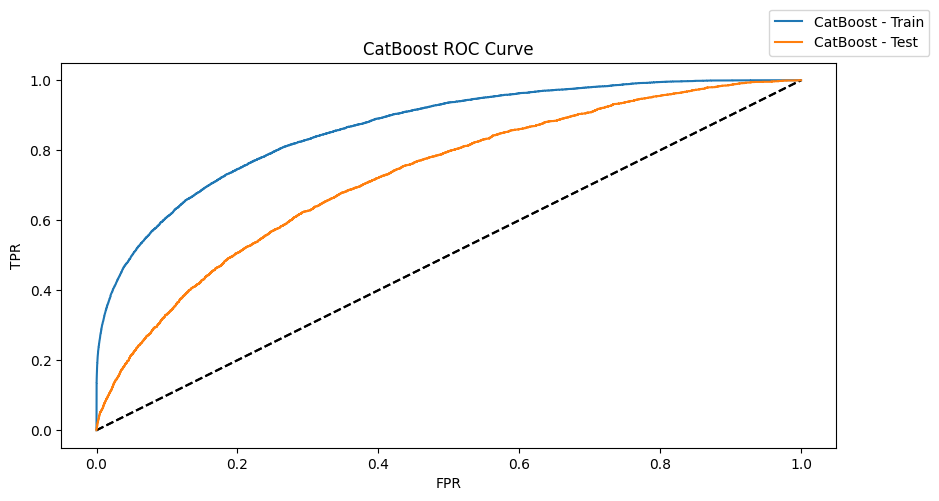

In [77]:
# Create the CatBoostClassifier with balanced class weights
catboost_model = CatBoostClassifier(class_weights=[1, 1], random_seed=42)

# Fit the CatBoost model to the training data
catboost_model.fit(X_train, y_train)

# Make predictions on test and train data
y_test_pred = catboost_model.predict(X_test)
y_train_pred = catboost_model.predict(X_train)

print("========================== CatBoost - Model Report =========================")

# Model Accuracy
print("===================== Model Accuracy ==============================")
print("Train Accuracy: %0.3f" % catboost_model.score(X_train, y_train))
print("Test Accuracy: %0.3f" % catboost_model.score(X_test, y_test))
print("=====================================================")

# Cross validation
print("===================== Cross Validation Scores ===========================")
cv_results_catboost = cross_val_score(catboost_model, X_train, y_train, cv=5, scoring='roc_auc')
for i in range(len(cv_results_catboost)):
    print("Fold - {}".format(i + 1))
    print("CV Score = %0.3f" % cv_results_catboost[i])
print("Average 5-Fold CV Score: %0.3f" % np.mean(cv_results_catboost))
print("=====================================================")

# Performance Metrics
print("===================== Model Performance Metrics ===========================")
print("Test Confusion Matrix: ")
print(confusion_matrix(y_test, y_test_pred))
print("============================")
print("Train Confusion Matrix: ")
print(confusion_matrix(y_train, y_train_pred))
print("=====================================================")
print("Test Classification Report: ")
print(classification_report(y_test, y_test_pred))
print("=====================================================")
print("Train Classification Report: ")
print(classification_report(y_train, y_train_pred))

# AUC Scores
y_test_pred_prob = catboost_model.predict_proba(X_test)[:, 1]
y_train_pred_prob = catboost_model.predict_proba(X_train)[:, 1]

print("===================== Model AUC Scores ===========================")
print("Train AUC Score: %0.3f" % roc_auc_score(y_train, y_train_pred_prob))
print("Test AUC Score: %0.3f" % roc_auc_score(y_test, y_test_pred_prob))
print("=====================================================")

# AUC Curve
print("===================== Model AUC Curve ===========================")
fpr, tpr, threshold = roc_curve(y_test, y_test_pred_prob)
fpr1, tpr1, threshold1 = roc_curve(y_train, y_train_pred_prob)

plt.figure(figsize=(10, 5))
plt.title('CatBoost ROC Curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr1, tpr1, label='CatBoost - Train')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='CatBoost - Test')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)
plt.show()


Learning rate set to 0.5
0:	learn: 0.1501650	total: 101ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.1501650	total: 119ms	remaining: 119ms
1:	learn: 0.0890129	total: 230ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.1501650	total: 120ms	remaining: 241ms
1:	learn: 0.0890129	total: 217ms	remaining: 108ms
2:	learn: 0.0782780	total: 305ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.1501650	total: 91.8ms	remaining: 275ms
1:	learn: 0.0890129	total: 175ms	remaining: 175ms
2:	learn: 0.0782780	total: 261ms	remaining: 87.2ms
3:	learn: 0.0765777	total: 333ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.1501650	total: 107ms	remaining: 427ms
1:	learn: 0.0890129	total: 200ms	remaining: 301ms
2:	learn: 0.0782780	total: 279ms	remaining: 186ms
3:	learn: 0.0765777	total: 348ms	remaining: 87ms
4:	learn: 0.0756987	total: 430ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.1501650	total: 91.4ms	remaining: 457ms
1:	learn: 0.0890129	total: 172ms	remaining: 343ms
2:	learn

4:	learn: 0.0756987	total: 401ms	remaining: 1.04s
5:	learn: 0.0753685	total: 478ms	remaining: 956ms
6:	learn: 0.0752389	total: 547ms	remaining: 859ms
7:	learn: 0.0751162	total: 626ms	remaining: 782ms
8:	learn: 0.0750593	total: 701ms	remaining: 701ms
9:	learn: 0.0747433	total: 772ms	remaining: 617ms
10:	learn: 0.0745430	total: 849ms	remaining: 540ms
11:	learn: 0.0744828	total: 919ms	remaining: 459ms
12:	learn: 0.0741992	total: 989ms	remaining: 380ms
13:	learn: 0.0740801	total: 1.06s	remaining: 303ms
14:	learn: 0.0740269	total: 1.14s	remaining: 229ms
15:	learn: 0.0739121	total: 1.22s	remaining: 152ms
16:	learn: 0.0738015	total: 1.29s	remaining: 76.1ms
17:	learn: 0.0737253	total: 1.37s	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.1501650	total: 95.4ms	remaining: 1.72s
1:	learn: 0.0890129	total: 180ms	remaining: 1.53s
2:	learn: 0.0782780	total: 260ms	remaining: 1.38s
3:	learn: 0.0765777	total: 329ms	remaining: 1.23s
4:	learn: 0.0756987	total: 408ms	remaining: 1.14s
5:	learn: 0.07536

17:	learn: 0.0737253	total: 1.36s	remaining: 528ms
18:	learn: 0.0736589	total: 1.44s	remaining: 456ms
19:	learn: 0.0735867	total: 1.5s	remaining: 376ms
20:	learn: 0.0735409	total: 1.59s	remaining: 303ms
21:	learn: 0.0735278	total: 1.67s	remaining: 228ms
22:	learn: 0.0733757	total: 1.74s	remaining: 152ms
23:	learn: 0.0732690	total: 1.82s	remaining: 75.9ms
24:	learn: 0.0731970	total: 1.9s	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.1501650	total: 90.3ms	remaining: 2.26s
1:	learn: 0.0890129	total: 167ms	remaining: 2s
2:	learn: 0.0782780	total: 250ms	remaining: 1.92s
3:	learn: 0.0765777	total: 327ms	remaining: 1.8s
4:	learn: 0.0756987	total: 408ms	remaining: 1.71s
5:	learn: 0.0753685	total: 491ms	remaining: 1.64s
6:	learn: 0.0752389	total: 563ms	remaining: 1.53s
7:	learn: 0.0751162	total: 639ms	remaining: 1.44s
8:	learn: 0.0750593	total: 713ms	remaining: 1.35s
9:	learn: 0.0747433	total: 787ms	remaining: 1.26s
10:	learn: 0.0745430	total: 861ms	remaining: 1.17s
11:	learn: 0.0744828	t

14:	learn: 0.0740269	total: 1.16s	remaining: 1.23s
15:	learn: 0.0739121	total: 1.23s	remaining: 1.16s
16:	learn: 0.0738015	total: 1.31s	remaining: 1.08s
17:	learn: 0.0737253	total: 1.38s	remaining: 999ms
18:	learn: 0.0736589	total: 1.47s	remaining: 927ms
19:	learn: 0.0735867	total: 1.53s	remaining: 842ms
20:	learn: 0.0735409	total: 1.61s	remaining: 767ms
21:	learn: 0.0735278	total: 1.69s	remaining: 692ms
22:	learn: 0.0733757	total: 1.76s	remaining: 613ms
23:	learn: 0.0732690	total: 1.84s	remaining: 537ms
24:	learn: 0.0731970	total: 1.91s	remaining: 459ms
25:	learn: 0.0730439	total: 1.99s	remaining: 383ms
26:	learn: 0.0729524	total: 2.07s	remaining: 307ms
27:	learn: 0.0728669	total: 2.15s	remaining: 230ms
28:	learn: 0.0728262	total: 2.23s	remaining: 154ms
29:	learn: 0.0727044	total: 2.3s	remaining: 76.7ms
30:	learn: 0.0726637	total: 2.38s	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.1501650	total: 88.9ms	remaining: 2.75s
1:	learn: 0.0890129	total: 168ms	remaining: 2.52s
2:	learn:

10:	learn: 0.0745430	total: 884ms	remaining: 2.01s
11:	learn: 0.0744828	total: 959ms	remaining: 1.92s
12:	learn: 0.0741992	total: 1.03s	remaining: 1.83s
13:	learn: 0.0740801	total: 1.11s	remaining: 1.74s
14:	learn: 0.0740269	total: 1.19s	remaining: 1.66s
15:	learn: 0.0739121	total: 1.26s	remaining: 1.58s
16:	learn: 0.0738015	total: 1.34s	remaining: 1.5s
17:	learn: 0.0737253	total: 1.42s	remaining: 1.42s
18:	learn: 0.0736589	total: 1.5s	remaining: 1.34s
19:	learn: 0.0735867	total: 1.56s	remaining: 1.25s
20:	learn: 0.0735409	total: 1.65s	remaining: 1.18s
21:	learn: 0.0735278	total: 1.73s	remaining: 1.1s
22:	learn: 0.0733757	total: 1.82s	remaining: 1.03s
23:	learn: 0.0732690	total: 1.9s	remaining: 952ms
24:	learn: 0.0731970	total: 1.98s	remaining: 873ms
25:	learn: 0.0730439	total: 2.07s	remaining: 797ms
26:	learn: 0.0729524	total: 2.16s	remaining: 720ms
27:	learn: 0.0728669	total: 2.24s	remaining: 640ms
28:	learn: 0.0728262	total: 2.32s	remaining: 561ms
29:	learn: 0.0727044	total: 2.39s	r

22:	learn: 0.0733757	total: 1.81s	remaining: 1.34s
23:	learn: 0.0732690	total: 1.9s	remaining: 1.26s
24:	learn: 0.0731970	total: 1.98s	remaining: 1.19s
25:	learn: 0.0730439	total: 2.06s	remaining: 1.11s
26:	learn: 0.0729524	total: 2.14s	remaining: 1.03s
27:	learn: 0.0728669	total: 2.22s	remaining: 953ms
28:	learn: 0.0728262	total: 2.31s	remaining: 876ms
29:	learn: 0.0727044	total: 2.38s	remaining: 793ms
30:	learn: 0.0726637	total: 2.46s	remaining: 713ms
31:	learn: 0.0725994	total: 2.53s	remaining: 632ms
32:	learn: 0.0725571	total: 2.61s	remaining: 554ms
33:	learn: 0.0724450	total: 2.69s	remaining: 474ms
34:	learn: 0.0723849	total: 2.77s	remaining: 395ms
35:	learn: 0.0723478	total: 2.85s	remaining: 317ms
36:	learn: 0.0722631	total: 2.94s	remaining: 238ms
37:	learn: 0.0722380	total: 3.02s	remaining: 159ms
38:	learn: 0.0721013	total: 3.1s	remaining: 79.4ms
39:	learn: 0.0720657	total: 3.17s	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.1501650	total: 96.8ms	remaining: 3.87s
1:	learn:

18:	learn: 0.0736589	total: 1.9s	remaining: 2.5s
19:	learn: 0.0735867	total: 1.98s	remaining: 2.38s
20:	learn: 0.0735409	total: 2.09s	remaining: 2.29s
21:	learn: 0.0735278	total: 2.21s	remaining: 2.21s
22:	learn: 0.0733757	total: 2.32s	remaining: 2.12s
23:	learn: 0.0732690	total: 2.44s	remaining: 2.03s
24:	learn: 0.0731970	total: 2.53s	remaining: 1.93s
25:	learn: 0.0730439	total: 2.64s	remaining: 1.83s
26:	learn: 0.0729524	total: 2.74s	remaining: 1.72s
27:	learn: 0.0728669	total: 2.84s	remaining: 1.62s
28:	learn: 0.0728262	total: 2.94s	remaining: 1.52s
29:	learn: 0.0727044	total: 3.03s	remaining: 1.41s
30:	learn: 0.0726637	total: 3.14s	remaining: 1.31s
31:	learn: 0.0725994	total: 3.24s	remaining: 1.22s
32:	learn: 0.0725571	total: 3.34s	remaining: 1.11s
33:	learn: 0.0724450	total: 3.42s	remaining: 1.01s
34:	learn: 0.0723849	total: 3.51s	remaining: 903ms
35:	learn: 0.0723478	total: 3.6s	remaining: 800ms
36:	learn: 0.0722631	total: 3.69s	remaining: 698ms
37:	learn: 0.0722380	total: 3.78s	

46:	learn: 0.0716196	total: 4.06s	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.1501650	total: 108ms	remaining: 5.06s
1:	learn: 0.0890129	total: 203ms	remaining: 4.66s
2:	learn: 0.0782780	total: 293ms	remaining: 4.4s
3:	learn: 0.0765777	total: 376ms	remaining: 4.14s
4:	learn: 0.0756987	total: 469ms	remaining: 4.03s
5:	learn: 0.0753685	total: 573ms	remaining: 4.01s
6:	learn: 0.0752389	total: 656ms	remaining: 3.84s
7:	learn: 0.0751162	total: 747ms	remaining: 3.74s
8:	learn: 0.0750593	total: 830ms	remaining: 3.6s
9:	learn: 0.0747433	total: 912ms	remaining: 3.46s
10:	learn: 0.0745430	total: 1s	remaining: 3.36s
11:	learn: 0.0744828	total: 1.08s	remaining: 3.25s
12:	learn: 0.0741992	total: 1.17s	remaining: 3.14s
13:	learn: 0.0740801	total: 1.25s	remaining: 3.04s
14:	learn: 0.0740269	total: 1.34s	remaining: 2.96s
15:	learn: 0.0739121	total: 1.43s	remaining: 2.87s
16:	learn: 0.0738015	total: 1.53s	remaining: 2.79s
17:	learn: 0.0737253	total: 1.61s	remaining: 2.69s
18:	learn: 0.0736589	to

13:	learn: 0.0740801	total: 1.24s	remaining: 3.27s
14:	learn: 0.0740269	total: 1.32s	remaining: 3.18s
15:	learn: 0.0739121	total: 1.41s	remaining: 3.08s
16:	learn: 0.0738015	total: 1.5s	remaining: 2.99s
17:	learn: 0.0737253	total: 1.58s	remaining: 2.9s
18:	learn: 0.0736589	total: 1.68s	remaining: 2.82s
19:	learn: 0.0735867	total: 1.75s	remaining: 2.72s
20:	learn: 0.0735409	total: 1.85s	remaining: 2.65s
21:	learn: 0.0735278	total: 1.94s	remaining: 2.56s
22:	learn: 0.0733757	total: 2.02s	remaining: 2.46s
23:	learn: 0.0732690	total: 2.12s	remaining: 2.38s
24:	learn: 0.0731970	total: 2.2s	remaining: 2.29s
25:	learn: 0.0730439	total: 2.29s	remaining: 2.21s
26:	learn: 0.0729524	total: 2.38s	remaining: 2.12s
27:	learn: 0.0728669	total: 2.47s	remaining: 2.03s
28:	learn: 0.0728262	total: 2.56s	remaining: 1.94s
29:	learn: 0.0727044	total: 2.64s	remaining: 1.84s
30:	learn: 0.0726637	total: 2.73s	remaining: 1.76s
31:	learn: 0.0725994	total: 2.81s	remaining: 1.67s
32:	learn: 0.0725571	total: 2.89s	

19:	learn: 0.0735867	total: 1.54s	remaining: 2.62s
20:	learn: 0.0735409	total: 1.62s	remaining: 2.55s
21:	learn: 0.0735278	total: 1.7s	remaining: 2.48s
22:	learn: 0.0733757	total: 1.78s	remaining: 2.39s
23:	learn: 0.0732690	total: 1.85s	remaining: 2.31s
24:	learn: 0.0731970	total: 1.92s	remaining: 2.23s
25:	learn: 0.0730439	total: 2s	remaining: 2.15s
26:	learn: 0.0729524	total: 2.08s	remaining: 2.08s
27:	learn: 0.0728669	total: 2.15s	remaining: 2s
28:	learn: 0.0728262	total: 2.23s	remaining: 1.93s
29:	learn: 0.0727044	total: 2.3s	remaining: 1.84s
30:	learn: 0.0726637	total: 2.37s	remaining: 1.76s
31:	learn: 0.0725994	total: 2.44s	remaining: 1.68s
32:	learn: 0.0725571	total: 2.52s	remaining: 1.6s
33:	learn: 0.0724450	total: 2.59s	remaining: 1.52s
34:	learn: 0.0723849	total: 2.67s	remaining: 1.45s
35:	learn: 0.0723478	total: 2.75s	remaining: 1.38s
36:	learn: 0.0722631	total: 2.84s	remaining: 1.3s
37:	learn: 0.0722380	total: 2.92s	remaining: 1.23s
38:	learn: 0.0721013	total: 3.01s	remaini

16:	learn: 0.0738015	total: 1.51s	remaining: 3.56s
17:	learn: 0.0737253	total: 1.6s	remaining: 3.46s
18:	learn: 0.0736589	total: 1.7s	remaining: 3.39s
19:	learn: 0.0735867	total: 1.77s	remaining: 3.28s
20:	learn: 0.0735409	total: 1.86s	remaining: 3.19s
21:	learn: 0.0735278	total: 1.95s	remaining: 3.11s
22:	learn: 0.0733757	total: 2.04s	remaining: 3.01s
23:	learn: 0.0732690	total: 2.12s	remaining: 2.92s
24:	learn: 0.0731970	total: 2.21s	remaining: 2.83s
25:	learn: 0.0730439	total: 2.3s	remaining: 2.75s
26:	learn: 0.0729524	total: 2.4s	remaining: 2.67s
27:	learn: 0.0728669	total: 2.49s	remaining: 2.58s
28:	learn: 0.0728262	total: 2.59s	remaining: 2.5s
29:	learn: 0.0727044	total: 2.67s	remaining: 2.4s
30:	learn: 0.0726637	total: 2.76s	remaining: 2.32s
31:	learn: 0.0725994	total: 2.85s	remaining: 2.23s
32:	learn: 0.0725571	total: 2.94s	remaining: 2.14s
33:	learn: 0.0724450	total: 3.02s	remaining: 2.04s
34:	learn: 0.0723849	total: 3.11s	remaining: 1.95s
35:	learn: 0.0723478	total: 3.19s	rem

4:	learn: 0.0756987	total: 497ms	remaining: 5.46s
5:	learn: 0.0753685	total: 591ms	remaining: 5.32s
6:	learn: 0.0752389	total: 678ms	remaining: 5.13s
7:	learn: 0.0751162	total: 774ms	remaining: 5.03s
8:	learn: 0.0750593	total: 859ms	remaining: 4.87s
9:	learn: 0.0747433	total: 944ms	remaining: 4.72s
10:	learn: 0.0745430	total: 1.04s	remaining: 4.62s
11:	learn: 0.0744828	total: 1.12s	remaining: 4.49s
12:	learn: 0.0741992	total: 1.21s	remaining: 4.36s
13:	learn: 0.0740801	total: 1.29s	remaining: 4.26s
14:	learn: 0.0740269	total: 1.39s	remaining: 4.16s
15:	learn: 0.0739121	total: 1.48s	remaining: 4.06s
16:	learn: 0.0738015	total: 1.56s	remaining: 3.94s
17:	learn: 0.0737253	total: 1.65s	remaining: 3.85s
18:	learn: 0.0736589	total: 1.74s	remaining: 3.75s
19:	learn: 0.0735867	total: 1.81s	remaining: 3.63s
20:	learn: 0.0735409	total: 1.92s	remaining: 3.56s
21:	learn: 0.0735278	total: 2.01s	remaining: 3.47s
22:	learn: 0.0733757	total: 2.1s	remaining: 3.37s
23:	learn: 0.0732690	total: 2.18s	rema

46:	learn: 0.0716196	total: 3.88s	remaining: 1.24s
47:	learn: 0.0715232	total: 3.97s	remaining: 1.16s
48:	learn: 0.0714532	total: 4.05s	remaining: 1.07s
49:	learn: 0.0713831	total: 4.12s	remaining: 989ms
50:	learn: 0.0713240	total: 4.21s	remaining: 907ms
51:	learn: 0.0712849	total: 4.29s	remaining: 826ms
52:	learn: 0.0712253	total: 4.37s	remaining: 743ms
53:	learn: 0.0712046	total: 4.47s	remaining: 662ms
54:	learn: 0.0711461	total: 4.55s	remaining: 579ms
55:	learn: 0.0711176	total: 4.64s	remaining: 497ms
56:	learn: 0.0710200	total: 4.72s	remaining: 414ms
57:	learn: 0.0709528	total: 4.8s	remaining: 331ms
58:	learn: 0.0709128	total: 4.89s	remaining: 249ms
59:	learn: 0.0708268	total: 4.97s	remaining: 166ms
60:	learn: 0.0707825	total: 5.05s	remaining: 82.8ms
61:	learn: 0.0707267	total: 5.13s	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.1501650	total: 90.1ms	remaining: 5.58s
1:	learn: 0.0890129	total: 179ms	remaining: 5.45s
2:	learn: 0.0782780	total: 265ms	remaining: 5.3s
3:	learn: 0

19:	learn: 0.0735867	total: 1.71s	remaining: 3.85s
20:	learn: 0.0735409	total: 1.8s	remaining: 3.78s
21:	learn: 0.0735278	total: 1.89s	remaining: 3.7s
22:	learn: 0.0733757	total: 1.97s	remaining: 3.6s
23:	learn: 0.0732690	total: 2.06s	remaining: 3.51s
24:	learn: 0.0731970	total: 2.13s	remaining: 3.42s
25:	learn: 0.0730439	total: 2.22s	remaining: 3.33s
26:	learn: 0.0729524	total: 2.31s	remaining: 3.24s
27:	learn: 0.0728669	total: 2.39s	remaining: 3.16s
28:	learn: 0.0728262	total: 2.47s	remaining: 3.07s
29:	learn: 0.0727044	total: 2.54s	remaining: 2.96s
30:	learn: 0.0726637	total: 2.61s	remaining: 2.86s
31:	learn: 0.0725994	total: 2.67s	remaining: 2.75s
32:	learn: 0.0725571	total: 2.74s	remaining: 2.66s
33:	learn: 0.0724450	total: 2.81s	remaining: 2.56s
34:	learn: 0.0723849	total: 2.88s	remaining: 2.47s
35:	learn: 0.0723478	total: 2.96s	remaining: 2.38s
36:	learn: 0.0722631	total: 3.03s	remaining: 2.29s
37:	learn: 0.0722380	total: 3.11s	remaining: 2.21s
38:	learn: 0.0721013	total: 3.19s	

50:	learn: 0.0713240	total: 3.96s	remaining: 1.24s
51:	learn: 0.0712849	total: 4.04s	remaining: 1.16s
52:	learn: 0.0712253	total: 4.1s	remaining: 1.08s
53:	learn: 0.0712046	total: 4.19s	remaining: 1.01s
54:	learn: 0.0711461	total: 4.27s	remaining: 931ms
55:	learn: 0.0711176	total: 4.35s	remaining: 854ms
56:	learn: 0.0710200	total: 4.43s	remaining: 777ms
57:	learn: 0.0709528	total: 4.52s	remaining: 701ms
58:	learn: 0.0709128	total: 4.61s	remaining: 625ms
59:	learn: 0.0708268	total: 4.71s	remaining: 549ms
60:	learn: 0.0707825	total: 4.8s	remaining: 472ms
61:	learn: 0.0707267	total: 4.89s	remaining: 395ms
62:	learn: 0.0706839	total: 4.99s	remaining: 317ms
63:	learn: 0.0706668	total: 5.09s	remaining: 239ms
64:	learn: 0.0706450	total: 5.17s	remaining: 159ms
65:	learn: 0.0705948	total: 5.25s	remaining: 79.6ms
66:	learn: 0.0705514	total: 5.33s	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.1501650	total: 97.7ms	remaining: 6.55s
1:	learn: 0.0890129	total: 190ms	remaining: 6.29s
2:	learn: 

7:	learn: 0.0751162	total: 755ms	remaining: 5.85s
8:	learn: 0.0750593	total: 846ms	remaining: 5.73s
9:	learn: 0.0747433	total: 932ms	remaining: 5.59s
10:	learn: 0.0745430	total: 1.02s	remaining: 5.5s
11:	learn: 0.0744828	total: 1.11s	remaining: 5.36s
12:	learn: 0.0741992	total: 1.19s	remaining: 5.22s
13:	learn: 0.0740801	total: 1.28s	remaining: 5.12s
14:	learn: 0.0740269	total: 1.37s	remaining: 5.03s
15:	learn: 0.0739121	total: 1.46s	remaining: 4.94s
16:	learn: 0.0738015	total: 1.55s	remaining: 4.84s
17:	learn: 0.0737253	total: 1.65s	remaining: 4.75s
18:	learn: 0.0736589	total: 1.74s	remaining: 4.68s
19:	learn: 0.0735867	total: 1.82s	remaining: 4.56s
20:	learn: 0.0735409	total: 1.92s	remaining: 4.47s
21:	learn: 0.0735278	total: 2s	remaining: 4.37s
22:	learn: 0.0733757	total: 2.09s	remaining: 4.28s
23:	learn: 0.0732690	total: 2.19s	remaining: 4.19s
24:	learn: 0.0731970	total: 2.28s	remaining: 4.1s
25:	learn: 0.0730439	total: 2.37s	remaining: 4.01s
26:	learn: 0.0729524	total: 2.46s	remai

28:	learn: 0.0728262	total: 2.52s	remaining: 3.73s
29:	learn: 0.0727044	total: 2.58s	remaining: 3.62s
30:	learn: 0.0726637	total: 2.67s	remaining: 3.53s
31:	learn: 0.0725994	total: 2.75s	remaining: 3.44s
32:	learn: 0.0725571	total: 2.83s	remaining: 3.35s
33:	learn: 0.0724450	total: 2.91s	remaining: 3.26s
34:	learn: 0.0723849	total: 3s	remaining: 3.17s
35:	learn: 0.0723478	total: 3.09s	remaining: 3.09s
36:	learn: 0.0722631	total: 3.17s	remaining: 3s
37:	learn: 0.0722380	total: 3.26s	remaining: 2.92s
38:	learn: 0.0721013	total: 3.35s	remaining: 2.83s
39:	learn: 0.0720657	total: 3.43s	remaining: 2.74s
40:	learn: 0.0720096	total: 3.52s	remaining: 2.66s
41:	learn: 0.0719680	total: 3.6s	remaining: 2.57s
42:	learn: 0.0718318	total: 3.69s	remaining: 2.49s
43:	learn: 0.0717641	total: 3.78s	remaining: 2.4s
44:	learn: 0.0717321	total: 3.86s	remaining: 2.32s
45:	learn: 0.0716893	total: 3.95s	remaining: 2.23s
46:	learn: 0.0716196	total: 4.04s	remaining: 2.15s
47:	learn: 0.0715232	total: 4.13s	remai

46:	learn: 0.0716196	total: 3.61s	remaining: 2.07s
47:	learn: 0.0715232	total: 3.69s	remaining: 2s
48:	learn: 0.0714532	total: 3.76s	remaining: 1.92s
49:	learn: 0.0713831	total: 3.83s	remaining: 1.84s
50:	learn: 0.0713240	total: 3.91s	remaining: 1.76s
51:	learn: 0.0712849	total: 3.99s	remaining: 1.69s
52:	learn: 0.0712253	total: 4.06s	remaining: 1.61s
53:	learn: 0.0712046	total: 4.15s	remaining: 1.54s
54:	learn: 0.0711461	total: 4.23s	remaining: 1.46s
55:	learn: 0.0711176	total: 4.32s	remaining: 1.39s
56:	learn: 0.0710200	total: 4.4s	remaining: 1.31s
57:	learn: 0.0709528	total: 4.48s	remaining: 1.24s
58:	learn: 0.0709128	total: 4.56s	remaining: 1.16s
59:	learn: 0.0708268	total: 4.64s	remaining: 1.08s
60:	learn: 0.0707825	total: 4.72s	remaining: 1s
61:	learn: 0.0707267	total: 4.8s	remaining: 929ms
62:	learn: 0.0706839	total: 4.88s	remaining: 851ms
63:	learn: 0.0706668	total: 4.96s	remaining: 775ms
64:	learn: 0.0706450	total: 5.04s	remaining: 698ms
65:	learn: 0.0705948	total: 5.11s	remai

58:	learn: 0.0709128	total: 4.46s	remaining: 1.28s
59:	learn: 0.0708268	total: 4.54s	remaining: 1.21s
60:	learn: 0.0707825	total: 4.62s	remaining: 1.14s
61:	learn: 0.0707267	total: 4.7s	remaining: 1.06s
62:	learn: 0.0706839	total: 4.78s	remaining: 986ms
63:	learn: 0.0706668	total: 4.86s	remaining: 912ms
64:	learn: 0.0706450	total: 4.95s	remaining: 838ms
65:	learn: 0.0705948	total: 5.02s	remaining: 761ms
66:	learn: 0.0705514	total: 5.1s	remaining: 685ms
67:	learn: 0.0704889	total: 5.18s	remaining: 609ms
68:	learn: 0.0704513	total: 5.26s	remaining: 534ms
69:	learn: 0.0703806	total: 5.34s	remaining: 458ms
70:	learn: 0.0702642	total: 5.41s	remaining: 381ms
71:	learn: 0.0702041	total: 5.5s	remaining: 305ms
72:	learn: 0.0701243	total: 5.58s	remaining: 229ms
73:	learn: 0.0700841	total: 5.66s	remaining: 153ms
74:	learn: 0.0700494	total: 5.73s	remaining: 76.4ms
75:	learn: 0.0699945	total: 5.81s	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.1501650	total: 92ms	remaining: 6.99s
1:	learn: 0.

68:	learn: 0.0704513	total: 5.33s	remaining: 696ms
69:	learn: 0.0703806	total: 5.41s	remaining: 619ms
70:	learn: 0.0702642	total: 5.48s	remaining: 540ms
71:	learn: 0.0702041	total: 5.57s	remaining: 464ms
72:	learn: 0.0701243	total: 5.65s	remaining: 387ms
73:	learn: 0.0700841	total: 5.73s	remaining: 310ms
74:	learn: 0.0700494	total: 5.81s	remaining: 232ms
75:	learn: 0.0699945	total: 5.9s	remaining: 155ms
76:	learn: 0.0699277	total: 5.97s	remaining: 77.6ms
77:	learn: 0.0698658	total: 6.04s	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.1501650	total: 97ms	remaining: 7.56s
1:	learn: 0.0890129	total: 181ms	remaining: 6.97s
2:	learn: 0.0782780	total: 262ms	remaining: 6.64s
3:	learn: 0.0765777	total: 341ms	remaining: 6.4s
4:	learn: 0.0756987	total: 423ms	remaining: 6.26s
5:	learn: 0.0753685	total: 504ms	remaining: 6.13s
6:	learn: 0.0752389	total: 576ms	remaining: 5.92s
7:	learn: 0.0751162	total: 654ms	remaining: 5.8s
8:	learn: 0.0750593	total: 727ms	remaining: 5.65s
9:	learn: 0.0747433	

73:	learn: 0.0700841	total: 5.86s	remaining: 475ms
74:	learn: 0.0700494	total: 5.93s	remaining: 396ms
75:	learn: 0.0699945	total: 6.01s	remaining: 316ms
76:	learn: 0.0699277	total: 6.08s	remaining: 237ms
77:	learn: 0.0698658	total: 6.15s	remaining: 158ms
78:	learn: 0.0697949	total: 6.23s	remaining: 78.9ms
79:	learn: 0.0697830	total: 6.32s	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.1501650	total: 90.4ms	remaining: 7.23s
1:	learn: 0.0890129	total: 173ms	remaining: 6.83s
2:	learn: 0.0782780	total: 252ms	remaining: 6.55s
3:	learn: 0.0765777	total: 323ms	remaining: 6.22s
4:	learn: 0.0756987	total: 408ms	remaining: 6.2s
5:	learn: 0.0753685	total: 490ms	remaining: 6.12s
6:	learn: 0.0752389	total: 561ms	remaining: 5.93s
7:	learn: 0.0751162	total: 642ms	remaining: 5.86s
8:	learn: 0.0750593	total: 716ms	remaining: 5.73s
9:	learn: 0.0747433	total: 786ms	remaining: 5.58s
10:	learn: 0.0745430	total: 863ms	remaining: 5.49s
11:	learn: 0.0744828	total: 931ms	remaining: 5.35s
12:	learn: 0.0741

74:	learn: 0.0700494	total: 5.96s	remaining: 556ms
75:	learn: 0.0699945	total: 6.05s	remaining: 478ms
76:	learn: 0.0699277	total: 6.13s	remaining: 398ms
77:	learn: 0.0698658	total: 6.21s	remaining: 318ms
78:	learn: 0.0697949	total: 6.3s	remaining: 239ms
79:	learn: 0.0697830	total: 6.38s	remaining: 160ms
80:	learn: 0.0697473	total: 6.47s	remaining: 79.9ms
81:	learn: 0.0697014	total: 6.55s	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.1501650	total: 97.3ms	remaining: 7.98s
1:	learn: 0.0890129	total: 183ms	remaining: 7.43s
2:	learn: 0.0782780	total: 272ms	remaining: 7.26s
3:	learn: 0.0765777	total: 349ms	remaining: 6.89s
4:	learn: 0.0756987	total: 430ms	remaining: 6.7s
5:	learn: 0.0753685	total: 512ms	remaining: 6.57s
6:	learn: 0.0752389	total: 584ms	remaining: 6.34s
7:	learn: 0.0751162	total: 665ms	remaining: 6.24s
8:	learn: 0.0750593	total: 741ms	remaining: 6.09s
9:	learn: 0.0747433	total: 811ms	remaining: 5.92s
10:	learn: 0.0745430	total: 886ms	remaining: 5.8s
11:	learn: 0.074482

72:	learn: 0.0701243	total: 5.93s	remaining: 894ms
73:	learn: 0.0700841	total: 6.01s	remaining: 812ms
74:	learn: 0.0700494	total: 6.08s	remaining: 730ms
75:	learn: 0.0699945	total: 6.17s	remaining: 650ms
76:	learn: 0.0699277	total: 6.25s	remaining: 568ms
77:	learn: 0.0698658	total: 6.32s	remaining: 486ms
78:	learn: 0.0697949	total: 6.4s	remaining: 405ms
79:	learn: 0.0697830	total: 6.48s	remaining: 324ms
80:	learn: 0.0697473	total: 6.56s	remaining: 243ms
81:	learn: 0.0697014	total: 6.64s	remaining: 162ms
82:	learn: 0.0696877	total: 6.71s	remaining: 80.9ms
83:	learn: 0.0696680	total: 6.79s	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.1501650	total: 92.6ms	remaining: 7.78s
1:	learn: 0.0890129	total: 175ms	remaining: 7.26s
2:	learn: 0.0782780	total: 256ms	remaining: 6.99s
3:	learn: 0.0765777	total: 330ms	remaining: 6.68s
4:	learn: 0.0756987	total: 416ms	remaining: 6.65s
5:	learn: 0.0753685	total: 495ms	remaining: 6.51s
6:	learn: 0.0752389	total: 573ms	remaining: 6.38s
7:	learn: 0.07

65:	learn: 0.0705948	total: 5.3s	remaining: 1.6s
66:	learn: 0.0705514	total: 5.38s	remaining: 1.52s
67:	learn: 0.0704889	total: 5.45s	remaining: 1.44s
68:	learn: 0.0704513	total: 5.53s	remaining: 1.36s
69:	learn: 0.0703806	total: 5.61s	remaining: 1.28s
70:	learn: 0.0702642	total: 5.68s	remaining: 1.2s
71:	learn: 0.0702041	total: 5.79s	remaining: 1.13s
72:	learn: 0.0701243	total: 5.88s	remaining: 1.05s
73:	learn: 0.0700841	total: 5.98s	remaining: 969ms
74:	learn: 0.0700494	total: 6.07s	remaining: 890ms
75:	learn: 0.0699945	total: 6.17s	remaining: 812ms
76:	learn: 0.0699277	total: 6.25s	remaining: 730ms
77:	learn: 0.0698658	total: 6.34s	remaining: 650ms
78:	learn: 0.0697949	total: 6.43s	remaining: 570ms
79:	learn: 0.0697830	total: 6.53s	remaining: 490ms
80:	learn: 0.0697473	total: 6.62s	remaining: 409ms
81:	learn: 0.0697014	total: 6.71s	remaining: 328ms
82:	learn: 0.0696877	total: 6.8s	remaining: 246ms
83:	learn: 0.0696680	total: 6.88s	remaining: 164ms
84:	learn: 0.0696339	total: 6.96s	r

55:	learn: 0.0711176	total: 4.89s	remaining: 2.79s
56:	learn: 0.0710200	total: 4.98s	remaining: 2.71s
57:	learn: 0.0709528	total: 5.06s	remaining: 2.62s
58:	learn: 0.0709128	total: 5.15s	remaining: 2.53s
59:	learn: 0.0708268	total: 5.25s	remaining: 2.45s
60:	learn: 0.0707825	total: 5.34s	remaining: 2.36s
61:	learn: 0.0707267	total: 5.43s	remaining: 2.28s
62:	learn: 0.0706839	total: 5.53s	remaining: 2.19s
63:	learn: 0.0706668	total: 5.63s	remaining: 2.11s
64:	learn: 0.0706450	total: 5.73s	remaining: 2.03s
65:	learn: 0.0705948	total: 5.81s	remaining: 1.94s
66:	learn: 0.0705514	total: 5.89s	remaining: 1.85s
67:	learn: 0.0704889	total: 5.97s	remaining: 1.76s
68:	learn: 0.0704513	total: 6.06s	remaining: 1.67s
69:	learn: 0.0703806	total: 6.14s	remaining: 1.58s
70:	learn: 0.0702642	total: 6.21s	remaining: 1.49s
71:	learn: 0.0702041	total: 6.3s	remaining: 1.4s
72:	learn: 0.0701243	total: 6.39s	remaining: 1.31s
73:	learn: 0.0700841	total: 6.47s	remaining: 1.22s
74:	learn: 0.0700494	total: 6.54s

41:	learn: 0.0719680	total: 3.52s	remaining: 4.02s
42:	learn: 0.0718318	total: 3.61s	remaining: 3.95s
43:	learn: 0.0717641	total: 3.7s	remaining: 3.87s
44:	learn: 0.0717321	total: 3.78s	remaining: 3.78s
45:	learn: 0.0716893	total: 3.86s	remaining: 3.69s
46:	learn: 0.0716196	total: 3.94s	remaining: 3.6s
47:	learn: 0.0715232	total: 4.02s	remaining: 3.52s
48:	learn: 0.0714532	total: 4.09s	remaining: 3.42s
49:	learn: 0.0713831	total: 4.16s	remaining: 3.33s
50:	learn: 0.0713240	total: 4.25s	remaining: 3.25s
51:	learn: 0.0712849	total: 4.33s	remaining: 3.17s
52:	learn: 0.0712253	total: 4.41s	remaining: 3.08s
53:	learn: 0.0712046	total: 4.51s	remaining: 3.01s
54:	learn: 0.0711461	total: 4.59s	remaining: 2.92s
55:	learn: 0.0711176	total: 4.67s	remaining: 2.84s
56:	learn: 0.0710200	total: 4.75s	remaining: 2.75s
57:	learn: 0.0709528	total: 4.83s	remaining: 2.66s
58:	learn: 0.0709128	total: 4.89s	remaining: 2.57s
59:	learn: 0.0708268	total: 4.97s	remaining: 2.49s
60:	learn: 0.0707825	total: 5.05s

22:	learn: 0.0733757	total: 1.77s	remaining: 5.33s
23:	learn: 0.0732690	total: 1.85s	remaining: 5.25s
24:	learn: 0.0731970	total: 1.93s	remaining: 5.17s
25:	learn: 0.0730439	total: 2.02s	remaining: 5.12s
26:	learn: 0.0729524	total: 2.09s	remaining: 5.04s
27:	learn: 0.0728669	total: 2.17s	remaining: 4.97s
28:	learn: 0.0728262	total: 2.25s	remaining: 4.9s
29:	learn: 0.0727044	total: 2.32s	remaining: 4.79s
30:	learn: 0.0726637	total: 2.4s	remaining: 4.71s
31:	learn: 0.0725994	total: 2.46s	remaining: 4.62s
32:	learn: 0.0725571	total: 2.54s	remaining: 4.54s
33:	learn: 0.0724450	total: 2.6s	remaining: 4.44s
34:	learn: 0.0723849	total: 2.68s	remaining: 4.36s
35:	learn: 0.0723478	total: 2.76s	remaining: 4.29s
36:	learn: 0.0722631	total: 2.83s	remaining: 4.21s
37:	learn: 0.0722380	total: 2.91s	remaining: 4.13s
38:	learn: 0.0721013	total: 2.99s	remaining: 4.06s
39:	learn: 0.0720657	total: 3.06s	remaining: 3.98s
40:	learn: 0.0720096	total: 3.13s	remaining: 3.89s
41:	learn: 0.0719680	total: 3.2s	r

92:	learn: 0.0692287	total: 7.6s	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.1501650	total: 95.7ms	remaining: 8.89s
1:	learn: 0.0890129	total: 180ms	remaining: 8.28s
2:	learn: 0.0782780	total: 269ms	remaining: 8.17s
3:	learn: 0.0765777	total: 352ms	remaining: 7.92s
4:	learn: 0.0756987	total: 439ms	remaining: 7.81s
5:	learn: 0.0753685	total: 522ms	remaining: 7.66s
6:	learn: 0.0752389	total: 598ms	remaining: 7.44s
7:	learn: 0.0751162	total: 681ms	remaining: 7.33s
8:	learn: 0.0750593	total: 752ms	remaining: 7.1s
9:	learn: 0.0747433	total: 824ms	remaining: 6.92s
10:	learn: 0.0745430	total: 897ms	remaining: 6.76s
11:	learn: 0.0744828	total: 970ms	remaining: 6.63s
12:	learn: 0.0741992	total: 1.05s	remaining: 6.52s
13:	learn: 0.0740801	total: 1.13s	remaining: 6.48s
14:	learn: 0.0740269	total: 1.23s	remaining: 6.49s
15:	learn: 0.0739121	total: 1.32s	remaining: 6.45s
16:	learn: 0.0738015	total: 1.41s	remaining: 6.39s
17:	learn: 0.0737253	total: 1.5s	remaining: 6.33s
18:	learn: 0.0736589

67:	learn: 0.0704889	total: 5.55s	remaining: 2.2s
68:	learn: 0.0704513	total: 5.63s	remaining: 2.12s
69:	learn: 0.0703806	total: 5.71s	remaining: 2.04s
70:	learn: 0.0702642	total: 5.78s	remaining: 1.95s
71:	learn: 0.0702041	total: 5.86s	remaining: 1.87s
72:	learn: 0.0701243	total: 5.94s	remaining: 1.79s
73:	learn: 0.0700841	total: 6.02s	remaining: 1.71s
74:	learn: 0.0700494	total: 6.09s	remaining: 1.63s
75:	learn: 0.0699945	total: 6.18s	remaining: 1.54s
76:	learn: 0.0699277	total: 6.25s	remaining: 1.46s
77:	learn: 0.0698658	total: 6.32s	remaining: 1.38s
78:	learn: 0.0697949	total: 6.4s	remaining: 1.29s
79:	learn: 0.0697830	total: 6.48s	remaining: 1.21s
80:	learn: 0.0697473	total: 6.55s	remaining: 1.13s
81:	learn: 0.0697014	total: 6.64s	remaining: 1.05s
82:	learn: 0.0696877	total: 6.72s	remaining: 971ms
83:	learn: 0.0696680	total: 6.79s	remaining: 889ms
84:	learn: 0.0696339	total: 6.86s	remaining: 807ms
85:	learn: 0.0696260	total: 6.94s	remaining: 726ms
86:	learn: 0.0695666	total: 7.02s

37:	learn: 0.0722380	total: 3.24s	remaining: 5.03s
38:	learn: 0.0721013	total: 3.33s	remaining: 4.95s
39:	learn: 0.0720657	total: 3.4s	remaining: 4.85s
40:	learn: 0.0720096	total: 3.49s	remaining: 4.77s
41:	learn: 0.0719680	total: 3.57s	remaining: 4.68s
42:	learn: 0.0718318	total: 3.66s	remaining: 4.6s
43:	learn: 0.0717641	total: 3.76s	remaining: 4.53s
44:	learn: 0.0717321	total: 3.84s	remaining: 4.44s
45:	learn: 0.0716893	total: 3.93s	remaining: 4.36s
46:	learn: 0.0716196	total: 4.02s	remaining: 4.28s
47:	learn: 0.0715232	total: 4.11s	remaining: 4.2s
48:	learn: 0.0714532	total: 4.2s	remaining: 4.11s
49:	learn: 0.0713831	total: 4.28s	remaining: 4.02s
50:	learn: 0.0713240	total: 4.37s	remaining: 3.94s
51:	learn: 0.0712849	total: 4.46s	remaining: 3.86s
52:	learn: 0.0712253	total: 4.54s	remaining: 3.77s
53:	learn: 0.0712046	total: 4.64s	remaining: 3.69s
54:	learn: 0.0711461	total: 4.72s	remaining: 3.61s
55:	learn: 0.0711176	total: 4.81s	remaining: 3.52s
56:	learn: 0.0710200	total: 4.89s	r

4:	learn: 0.0756987	total: 472ms	remaining: 8.87s
5:	learn: 0.0753685	total: 555ms	remaining: 8.6s
6:	learn: 0.0752389	total: 625ms	remaining: 8.22s
7:	learn: 0.0751162	total: 708ms	remaining: 8.05s
8:	learn: 0.0750593	total: 780ms	remaining: 7.8s
9:	learn: 0.0747433	total: 860ms	remaining: 7.65s
10:	learn: 0.0745430	total: 940ms	remaining: 7.52s
11:	learn: 0.0744828	total: 1.01s	remaining: 7.34s
12:	learn: 0.0741992	total: 1.08s	remaining: 7.17s
13:	learn: 0.0740801	total: 1.15s	remaining: 7.01s
14:	learn: 0.0740269	total: 1.23s	remaining: 6.9s
15:	learn: 0.0739121	total: 1.31s	remaining: 6.79s
16:	learn: 0.0738015	total: 1.39s	remaining: 6.69s
17:	learn: 0.0737253	total: 1.46s	remaining: 6.58s
18:	learn: 0.0736589	total: 1.54s	remaining: 6.51s
19:	learn: 0.0735867	total: 1.61s	remaining: 6.38s
20:	learn: 0.0735409	total: 1.69s	remaining: 6.29s
21:	learn: 0.0735278	total: 1.77s	remaining: 6.18s
22:	learn: 0.0733757	total: 1.84s	remaining: 6.07s
23:	learn: 0.0732690	total: 1.91s	remain

67:	learn: 0.0704889	total: 5.31s	remaining: 2.5s
68:	learn: 0.0704513	total: 5.39s	remaining: 2.42s
69:	learn: 0.0703806	total: 5.47s	remaining: 2.35s
70:	learn: 0.0702642	total: 5.54s	remaining: 2.26s
71:	learn: 0.0702041	total: 5.63s	remaining: 2.19s
72:	learn: 0.0701243	total: 5.71s	remaining: 2.11s
73:	learn: 0.0700841	total: 5.79s	remaining: 2.03s
74:	learn: 0.0700494	total: 5.86s	remaining: 1.95s
75:	learn: 0.0699945	total: 5.95s	remaining: 1.88s
76:	learn: 0.0699277	total: 6.02s	remaining: 1.8s
77:	learn: 0.0698658	total: 6.09s	remaining: 1.72s
78:	learn: 0.0697949	total: 6.17s	remaining: 1.64s
79:	learn: 0.0697830	total: 6.25s	remaining: 1.56s
80:	learn: 0.0697473	total: 6.33s	remaining: 1.48s
81:	learn: 0.0697014	total: 6.41s	remaining: 1.41s
82:	learn: 0.0696877	total: 6.49s	remaining: 1.33s
83:	learn: 0.0696680	total: 6.55s	remaining: 1.25s
84:	learn: 0.0696339	total: 6.63s	remaining: 1.17s
85:	learn: 0.0696260	total: 6.71s	remaining: 1.09s
86:	learn: 0.0695666	total: 6.79s

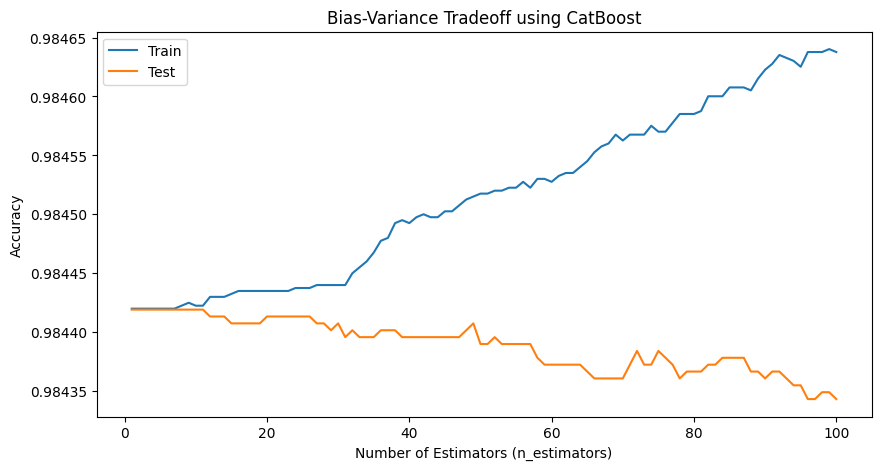

In [78]:
# Assuming you have already defined the X_train, X_test, y_train, and y_test data

train_score = []
test_score = []
iterations = []

for n_estimators in range(1, 101):
    iterations.append(n_estimators)
    catboost_model = CatBoostClassifier(n_estimators=n_estimators, random_seed=42)
    catboost_model.fit(X_train, y_train)

    train_score.append(catboost_model.score(X_train, y_train))
    test_score.append(catboost_model.score(X_test, y_test))

# Plot the Bias-Variance tradeoff
plt.figure(figsize=(10, 5))
plt.plot(iterations, train_score, label='Train')
plt.plot(iterations, test_score, label='Test')
plt.xlabel('Number of Estimators (n_estimators)')
plt.ylabel('Accuracy')
plt.title('Bias-Variance Tradeoff using CatBoost')
plt.legend()
plt.show()


In [79]:
#finding best value of train_score,test_score,vals-
train_score = []
test_score = []
vals = []

# To check the bias-variance, take any parameters and iterate over a few values - Like n_estimator, max_depth
for k in np.arange(50, 200, 50):
    vals.append(k)
    catboost_model = CatBoostClassifier(n_estimators=k, class_weights=[1, 1], depth=4, random_seed=42)
    catboost_model.fit(X_train, y_train)
    
    tr_score = roc_auc_score(y_train, catboost_model.predict_proba(X_train)[:, 1])
    train_score.append(tr_score)
    
    te_score = roc_auc_score(y_test, catboost_model.predict_proba(X_test)[:, 1])
    test_score.append(te_score)

# Print the results
print("Train AUC Scores:", train_score)
print("Test AUC Scores:", test_score)
print("n_estimators:", vals)


Learning rate set to 0.5
0:	learn: 0.1501948	total: 77.5ms	remaining: 3.8s
1:	learn: 0.0917419	total: 146ms	remaining: 3.5s
2:	learn: 0.0795036	total: 207ms	remaining: 3.24s
3:	learn: 0.0766540	total: 271ms	remaining: 3.11s
4:	learn: 0.0761036	total: 329ms	remaining: 2.96s
5:	learn: 0.0756705	total: 385ms	remaining: 2.82s
6:	learn: 0.0755883	total: 452ms	remaining: 2.78s
7:	learn: 0.0754335	total: 519ms	remaining: 2.72s
8:	learn: 0.0752823	total: 585ms	remaining: 2.66s
9:	learn: 0.0751819	total: 646ms	remaining: 2.58s
10:	learn: 0.0751129	total: 725ms	remaining: 2.57s
11:	learn: 0.0750411	total: 797ms	remaining: 2.52s
12:	learn: 0.0748807	total: 874ms	remaining: 2.49s
13:	learn: 0.0748382	total: 955ms	remaining: 2.46s
14:	learn: 0.0747907	total: 1.02s	remaining: 2.39s
15:	learn: 0.0747627	total: 1.1s	remaining: 2.33s
16:	learn: 0.0747032	total: 1.17s	remaining: 2.27s
17:	learn: 0.0745727	total: 1.23s	remaining: 2.18s
18:	learn: 0.0745036	total: 1.29s	remaining: 2.11s
19:	learn: 0.07447

13:	learn: 0.0748382	total: 881ms	remaining: 8.55s
14:	learn: 0.0747907	total: 944ms	remaining: 8.49s
15:	learn: 0.0747627	total: 1.01s	remaining: 8.46s
16:	learn: 0.0747032	total: 1.08s	remaining: 8.48s
17:	learn: 0.0745727	total: 1.14s	remaining: 8.39s
18:	learn: 0.0745036	total: 1.21s	remaining: 8.33s
19:	learn: 0.0744789	total: 1.28s	remaining: 8.32s
20:	learn: 0.0744343	total: 1.33s	remaining: 8.19s
21:	learn: 0.0742885	total: 1.39s	remaining: 8.06s
22:	learn: 0.0742778	total: 1.44s	remaining: 7.96s
23:	learn: 0.0741961	total: 1.5s	remaining: 7.85s
24:	learn: 0.0741552	total: 1.55s	remaining: 7.76s
25:	learn: 0.0740852	total: 1.61s	remaining: 7.66s
26:	learn: 0.0740322	total: 1.66s	remaining: 7.58s
27:	learn: 0.0740151	total: 1.72s	remaining: 7.5s
28:	learn: 0.0739769	total: 1.78s	remaining: 7.45s
29:	learn: 0.0739652	total: 1.84s	remaining: 7.38s
30:	learn: 0.0739401	total: 1.9s	remaining: 7.31s
31:	learn: 0.0739124	total: 1.96s	remaining: 7.24s
32:	learn: 0.0738886	total: 2.03s	

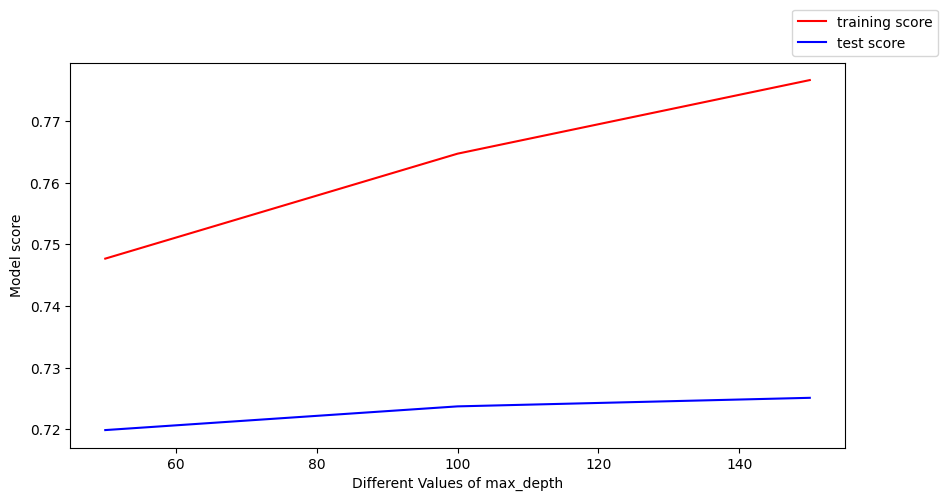

In [80]:
plt.figure(figsize=(10,5))
plt.xlabel('Different Values of max_depth')
plt.ylabel('Model score')
plt.plot(vals, train_score, color = 'r', label = "training score")
plt.plot(vals, test_score, color = 'b', label = 'test score')
plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)
plt.show()

In [81]:
# Define the hyperparameter grid for tuning
params_catboost = {
    'depth': [3, 5, 7, 9],               # Equivalent to max_depth in LightGBM
    'learning_rate': [0.1, 0.5, 1],
    'min_data_in_leaf': [10, 20, 30, 40], # Equivalent to min_child_samples in LightGBM
    'n_estimators': [50, 100, 200]
}

In [82]:
# Create the GridSearchCV object
grid_catboost = GridSearchCV(estimator=catboost_model,
                             param_grid=params_catboost,
                             scoring='roc_auc',
                             cv=3,
                             n_jobs=-1,
                             verbose=True)

In [83]:
# Fit the GridSearchCV to the training data
grid_catboost.fit(X_train, y_train)

Fitting 3 folds for each of 144 candidates, totalling 432 fits
0:	learn: 0.5130156	total: 122ms	remaining: 24.3s
1:	learn: 0.3820454	total: 229ms	remaining: 22.7s
2:	learn: 0.2950472	total: 358ms	remaining: 23.5s
3:	learn: 0.2339103	total: 457ms	remaining: 22.4s
4:	learn: 0.1913907	total: 547ms	remaining: 21.3s
5:	learn: 0.1615034	total: 651ms	remaining: 21.1s
6:	learn: 0.1402295	total: 755ms	remaining: 20.8s
7:	learn: 0.1247508	total: 850ms	remaining: 20.4s
8:	learn: 0.1128367	total: 946ms	remaining: 20.1s
9:	learn: 0.1046691	total: 1.04s	remaining: 19.8s
10:	learn: 0.0974476	total: 1.14s	remaining: 19.6s
11:	learn: 0.0929897	total: 1.25s	remaining: 19.6s
12:	learn: 0.0893178	total: 1.33s	remaining: 19.2s
13:	learn: 0.0863566	total: 1.43s	remaining: 18.9s
14:	learn: 0.0838694	total: 1.53s	remaining: 18.9s
15:	learn: 0.0820010	total: 1.63s	remaining: 18.8s
16:	learn: 0.0807176	total: 1.72s	remaining: 18.5s
17:	learn: 0.0797158	total: 1.83s	remaining: 18.5s
18:	learn: 0.0789898	total: 1

160:	learn: 0.0712087	total: 16s	remaining: 3.87s
161:	learn: 0.0711606	total: 16.1s	remaining: 3.77s
162:	learn: 0.0711464	total: 16.2s	remaining: 3.67s
163:	learn: 0.0711344	total: 16.3s	remaining: 3.57s
164:	learn: 0.0711148	total: 16.4s	remaining: 3.47s
165:	learn: 0.0711053	total: 16.5s	remaining: 3.37s
166:	learn: 0.0710724	total: 16.5s	remaining: 3.27s
167:	learn: 0.0710634	total: 16.6s	remaining: 3.17s
168:	learn: 0.0710560	total: 16.7s	remaining: 3.07s
169:	learn: 0.0710433	total: 16.8s	remaining: 2.97s
170:	learn: 0.0710382	total: 16.9s	remaining: 2.87s
171:	learn: 0.0710200	total: 17s	remaining: 2.77s
172:	learn: 0.0710123	total: 17.1s	remaining: 2.67s
173:	learn: 0.0709992	total: 17.2s	remaining: 2.56s
174:	learn: 0.0709830	total: 17.2s	remaining: 2.46s
175:	learn: 0.0709738	total: 17.3s	remaining: 2.36s
176:	learn: 0.0709398	total: 17.4s	remaining: 2.26s
177:	learn: 0.0709259	total: 17.5s	remaining: 2.16s
178:	learn: 0.0709113	total: 17.6s	remaining: 2.06s
179:	learn: 0.07

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostClassifier object at 0x000001F6CE3BA170>,
             n_jobs=-1,
             param_grid={'depth': [3, 5, 7, 9], 'learning_rate': [0.1, 0.5, 1],
                         'min_data_in_leaf': [10, 20, 30, 40],
                         'n_estimators': [50, 100, 200]},
             scoring='roc_auc', verbose=True)

In [84]:
best_params_catboost = grid_catboost.best_params_
best_auc_score_catboost = grid_catboost.best_score_

In [85]:
print("Best Hyperparameters: \n", best_params_catboost)
print("Best AUC Score: \n", best_auc_score_catboost)

Best Hyperparameters: 
 {'depth': 7, 'learning_rate': 0.1, 'min_data_in_leaf': 10, 'n_estimators': 200}
Best AUC Score: 
 0.7356829240208187


In [86]:
best_model = grid_catboost.best_estimator_

========================== CatBoost Tuned - Model Report =========================
===================== Model Accuracy ==============================
Train Accuracy: 0.984
Test Accuracy: 0.984
===================== Model Performance Metrics ===========================
Test Confusion Matrix: 
[[168376      0]
 [  2664      1]]
Train Confusion Matrix: 
[[392877      0]
 [  6196     22]]
Test Classification Report: 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    168376
           1       1.00      0.00      0.00      2665

    accuracy                           0.98    171041
   macro avg       0.99      0.50      0.50    171041
weighted avg       0.98      0.98      0.98    171041

Train Classification Report: 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    392877
           1       1.00      0.00      0.01      6218

    accuracy                           0.98    399095
   macr

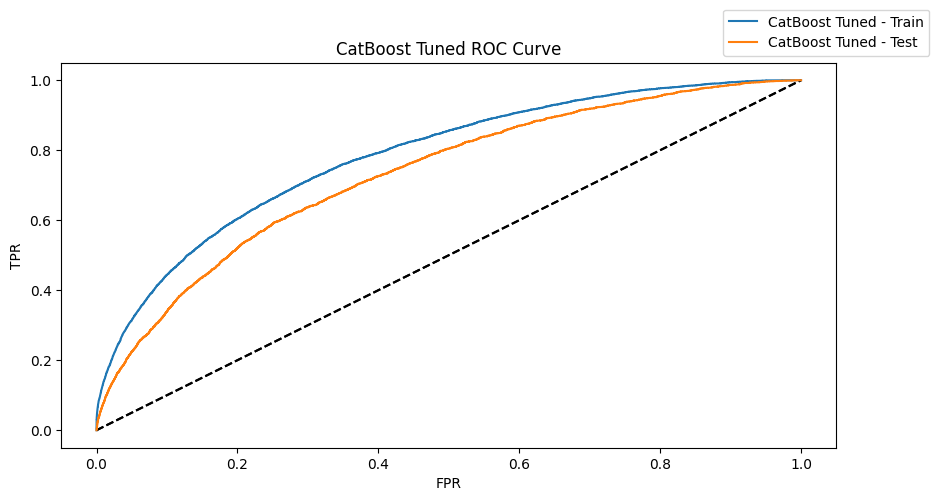

In [87]:
# Assuming you have already trained the LGBM model and obtained 'best_model_lgb'

y_test_pred = best_model.predict(X_test)
y_train_pred = best_model.predict(X_train)

print("========================== CatBoost Tuned - Model Report =========================")

print("===================== Model Accuracy ==============================")
print("Train Accuracy: %0.3f" % best_model.score(X_train, y_train))
print("Test Accuracy: %0.3f" % best_model.score(X_test, y_test))
print("=====================================================")

# Performance Metrics
print("===================== Model Performance Metrics ===========================")
print("Test Confusion Matrix: ")
print(confusion_matrix(y_test, y_test_pred))
print("============================")
print("Train Confusion Matrix: ")
print(confusion_matrix(y_train, y_train_pred))
print("=====================================================")

print("Test Classification Report: ")
print(classification_report(y_test, y_test_pred))
print("=====================================================")
print("Train Classification Report: ")
print(classification_report(y_train, y_train_pred))

y_test_pred_prob = best_model.predict_proba(X_test)[:, 1]
y_train_pred_prob = best_model.predict_proba(X_train)[:, 1]

print("===================== Model AUC Scores ===========================")
print("Train AUC Score: %0.3f" % roc_auc_score(y_train, y_train_pred_prob))
print("Test AUC Score: %0.3f" % roc_auc_score(y_test, y_test_pred_prob))
print("=====================================================")

print("===================== Model AUC Curve ===========================")
fpr, tpr, threshold = roc_curve(y_test, y_test_pred_prob)
fpr1, tpr1, threshold1 = roc_curve(y_train, y_train_pred_prob)

plt.figure(figsize=(10, 5))
plt.title('CatBoost Tuned ROC Curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr1, tpr1, label='CatBoost Tuned - Train')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='CatBoost Tuned - Test')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)
plt.show()

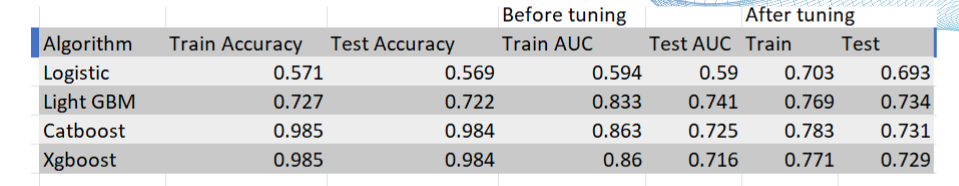

## We got the LightGBM as the best model on     the basis of  AUC Score

**Saving the best model**

In [122]:
import pickle

In [123]:
with open('lgb_pkl_1', 'wb') as files:
    pickle.dump(best_model_lgb, files)

In [124]:
# load saved model
with open('lgb_pkl_1' , 'rb') as f:
    lgb = pickle.load(f)

**Step 5: Model Scoring & Business KPIs**
    
1.We will score the model with Out_of_time_data,<br>
2.Perform all the pre-processing steps like imputation, scaling etc. using numbers from development sample<br>
3.Get the Validation data and take only those features that were used in the model (Top_Feat)<br>
4.Score the model and report the Performance KPIs

**PRE-PROCESSING**
1.Convert transactionDateTime from object to date and time format,<br>
2.Convert categorical variables to numeric using Label encoding, target encoding or creating dummies,<br>
3.Normalize or Scale numeric features,<br>
4.Drop and rename columns

In [125]:
val_data = pd.read_csv('Out_of_time_Data.csv')

In [130]:
val_data['transactionDateTime'] = pd.to_datetime(val_data['transactionDateTime'])

val_data = val_data.drop(['Time_Difference_transT','Time_Difference_cardP','Time_Difference_pos','Time_Difference_tAA','Time_Difference_merN'],axis =1)
val_data['transactionDateTime'] = pd.to_datetime(val_data['transactionDateTime'])

In [132]:
len(Top_Feat)     # top feature socred on feature_sample

40

In [133]:
final_input = ['customerId', 'transactionDateTime', 'isFraud'] + Top_Feat

In [134]:
score_data = val_data[['customerId', 'transactionDateTime', 'isFraud'] + Top_Feat].copy(deep=True)

In [135]:
score_data.head()

,customerId,transactionDateTime,isFraud,transactionAmount,Days_accOpenDate,Days_lastAddChange,Hours_tAA,Hours_merN,Hours_pos,sum_amt_pos_7d,...,sum_amt_tAA_7d,count_transT_7d,Hours_merCntryC,Minutes_merCntryC,Minutes_df_merCatC,sum_amt_cardP_1d,sum_amt_merCntryC_6h,sum_amt_merCntryC_1d,sum_amt_merCatC_6h,count_pos_1d
0,316447056,2016-12-01 00:00:00,0,2.38,1458,-214,316,63,88,37.39,...,0,7,3,209,3830,0.00,0.00,0.00,0.0,0
1,792098791,2016-12-01 00:00:00,0,40.76,276,276,355,355,355,0.00,...,0,1,66,3993,21357,0.00,0.00,0.00,0.0,0
2,232240541,2016-12-01 00:00:00,0,9.46,865,-191,479,7094,153,105.03,...,0,1,153,9229,14962,0.00,0.00,0.00,0.0,0
3,767620004,2016-12-01 00:01:00,0,245.58,381,-52,17,575,5,6504.73,...,488,74,5,359,492,0.00,67.04,714.62,0.0,5
4,525304407,2016-12-01 00:01:00,0,49.63,1931,-212,980,584,216,0.00,...,0,0,203,12211,12211,200.29,0.00,0.00,0.0,0


**Model Scoing**

========================== Model Validation Report =========================
================================= Accuracy =================================
Validation Accuracy: 0.730
===================== Model Validation Performance Metrics ==================
Validation Confusion Matrix: 
[[49418 18109]
 [  406   603]]
Validation Classification Report: 
              precision    recall  f1-score   support

           0       0.99      0.73      0.84     67527
           1       0.03      0.60      0.06      1009

    accuracy                           0.73     68536
   macro avg       0.51      0.66      0.45     68536
weighted avg       0.98      0.73      0.83     68536

===================== Model Validation AUC Scores ==========================
Validation AUC Score: 0.738
===================== Model Validation AUC Curve ===========================


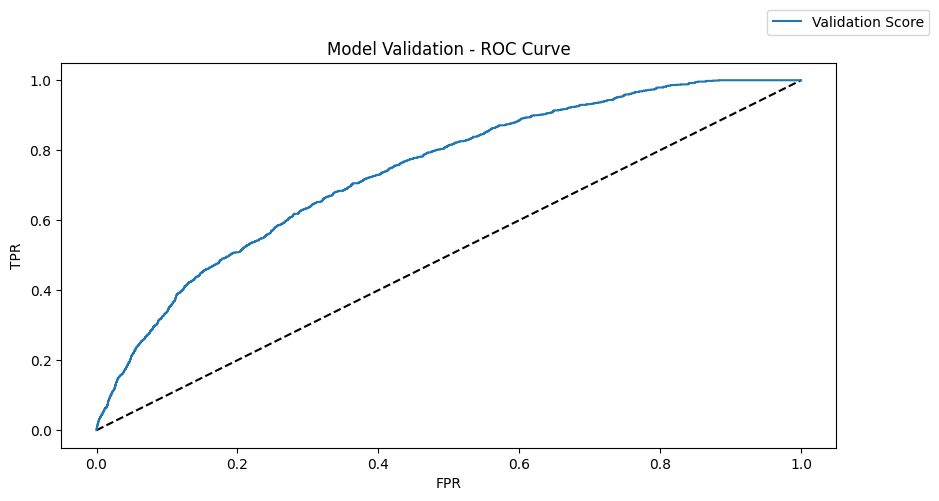

In [136]:
# Make predictions on the validation set

y_val_pred = lgb.predict(score_data[Top_Feat].astype(float))
y_val_pred_prob = lgb.predict_proba(score_data[Top_Feat].astype(float))[:, 1]

val_accuracy = lgb.score(score_data[Top_Feat].astype(float),score_data['isFraud'])
auc_score = roc_auc_score(score_data['isFraud'], y_val_pred_prob)

print("========================== Model Validation Report =========================")
print("================================= Accuracy =================================")
print("Validation Accuracy: %0.3f" % val_accuracy)
print("============================================================================")

# Performance Metrics
print("===================== Model Validation Performance Metrics ==================")
print("Validation Confusion Matrix: ")
print(confusion_matrix(score_data['isFraud'], y_val_pred))
print("============================================================================")

print("Validation Classification Report: ")
print(classification_report(score_data['isFraud'], y_val_pred))
print("============================================================================")

print("===================== Model Validation AUC Scores ==========================")
print("Validation AUC Score: %0.3f" % auc_score)
print("============================================================================")

print("===================== Model Validation AUC Curve ===========================")
fpr, tpr, threshold = roc_curve(score_data['isFraud'], y_val_pred_prob)

plt.figure(figsize=(10, 5))
plt.title('Model Validation - ROC Curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Validation Score')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)

plt.show()


# Conclusion

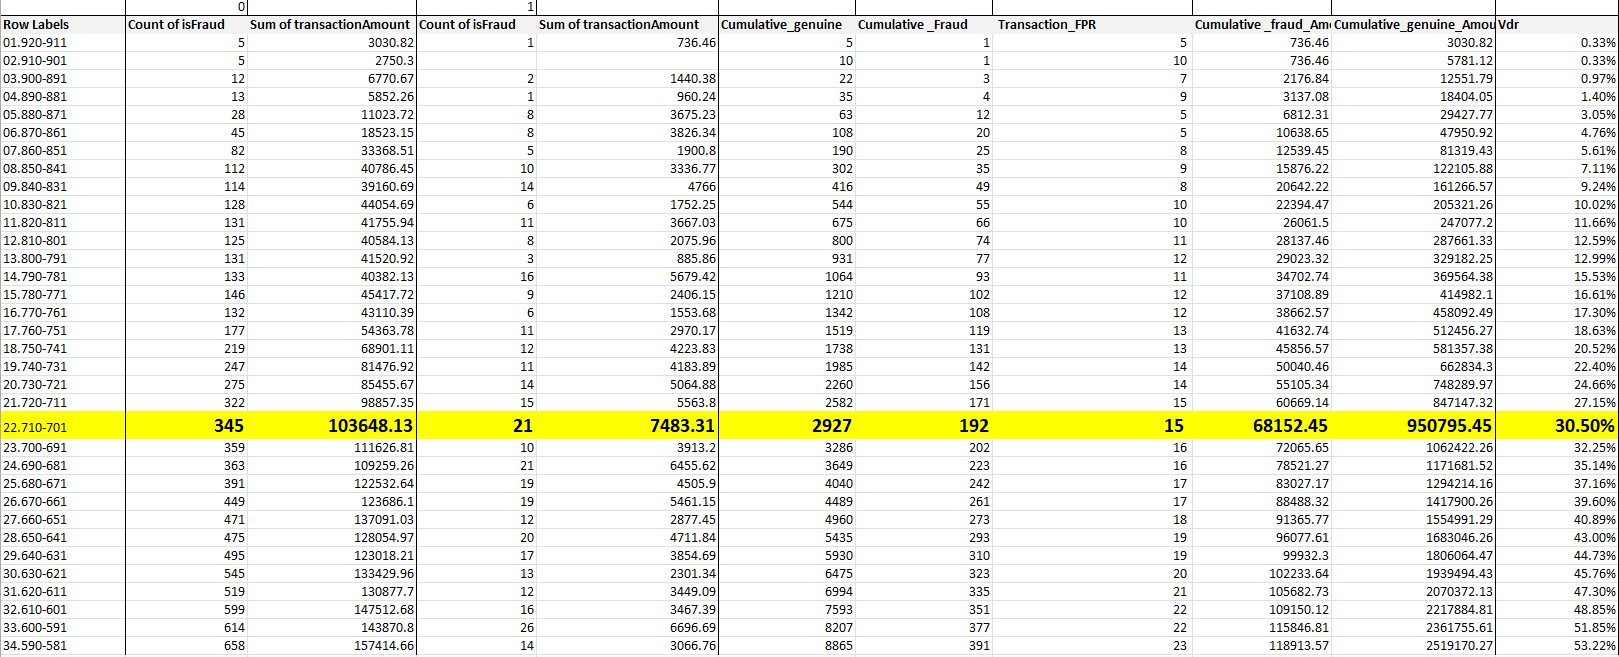

***By implementing our fraud detection model and declining transactions with a score greater than 701,
we successfully reduced credit card fraud by 30.5%. We prioritize preventing fraud while considering
that we may decline a small percentage of genuine transactions (15 genuine transactions to prevent 1 fraud).***
